In [1]:
# Importing Important Libraries

# Data Analysis ans Visualization tools
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set()
from tqdm import tqdm
import missingno as msno
from collections import Counter
import random as rn
from functools import reduce 

# Statistical Libraries
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import chi2


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Scikit Learn Framework
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, make_scorer,precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from prettytable import PrettyTable



# Import and suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
# Using Pandas

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

###### Print top 5 rows in the dataframe.

In [3]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

###### Print bottom 5 rows in the dataframe.

In [4]:
data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

# Dataset Description

### Dataset Attributes

* customerID : Customer ID

* gender : Whether the customer is a male or a female
 * 
SeniorCitizen : Whether the customer is a senior citizen or nt (1,  )
* 
Partner : Whether the customer has a partner or not (Yes,* o
* )
Dependents : Whether the customer has dependents or not (Ye
* N
* o)
tenure : Number of months the customer has stayed with them
* p
* any
PhoneService : Whether the customer has a phone service or notes
* ,
*  No)
MultipleLines : Whether the customer has multiple lines or not (Yes, No, No ph se
* r
* vice)
InternetService : Customer’s internet service provider (DSL, Fi opt
* i
* c, No)
OnlineSecurity : Whether the customer has online security or not (Yes, No, No ernet 
* s
* ervice)
OnlineBackup : Whether the customer has online backup or not (Yes, No, No ernet
*  
* service)
DeviceProtection : Whether the customer has device protection or not (Yes, No, interne
* t
*  service)
TechSupport : Whether the customer has tech support or not (Yes, Noo intern
* e
* t service)
StreamingTV : Whether the customer has streaming TV or not (Yes,  No inter
* n
* et service)
StreamingMovies : Whether the customer has streaming movies or not (Yeso, No inte
* r
* net service)
Contract : The contract term of the customer (Month-tonth, One y
* e
* ar, Two year)
PaperlessBilling : Whether the customer has papess billing o
* r
*  not (Yes, No)
PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (autoic), Credit c
* a
* rd (automatic))
MonthlyCharges : The amou harged to the
*  
* customer monthly
TotalCharges : The al amount charg
* e
* d to the customer
Churn : Whether the customer churned or not (Yes or No)


#  Data Wrangling

a) Computing the size of DataFrame

b) Enlist the Column Labels

c) Generating Basic Information of Attributes

d) Enlisting Numerical Features

e )Enlisting Categorical Features

f) Checking for Missing Values

g) Descriptive Analysis on Numerical Attributes

h) Drop Unnecessary Columns

i) Descriptive Analysis on Categorical Attributes

j) Checking Unique Values on Categorical Attributes

k) Checking Duplicate values

### a) Computing the size of DataFrame


In [7]:
print(f"The shape of the Dataset : {data.shape}")
print(f"Attrition Dataset: Rows= {data.shape[0]}, Columns= {data.shape[1]}")

The shape of the Dataset : (7043, 21)
Attrition Dataset: Rows= 7043, Columns= 21


### b) Enlist the Column Labels


In [8]:
print("Column labels in the dataset in column order:")
print("*"*50)
for column in data.columns:
    print(column)

Column labels in the dataset in column order:
**************************************************
customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


### c) Generating Basic Information of Attributes



In [9]:
# Print the Long summary of the dataframe by setting verbose = True
# Check for Non-Null or Nan Nalues in the dataset.
print(data.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### d) Enlisting Numerical Features

In [10]:
data.select_dtypes(np.number).sample(5)

SeniorCitizen  tenure  MonthlyCharges
5342              0      37           64.75
6946              0      48           45.55
5165              1       1           69.65
1695              0      54           70.70
6264              0      44          100.10

### e )Enlisting Categorical Features

In [11]:
data.select_dtypes(include="O").sample(5)

customerID  gender Partner Dependents PhoneService MultipleLines  \
4376  0853-NWIFK  Female      No         No          Yes            No   
5371  0877-SDMBN  Female      No         No          Yes           Yes   
2581  0380-ZCSBI    Male      No         No          Yes            No   
2649  3027-YNWZU  Female     Yes         No          Yes           Yes   
4790  5216-WASFJ  Female     Yes         No          Yes           Yes   

     InternetService       OnlineSecurity         OnlineBackup  \
4376     Fiber optic                  Yes                  Yes   
5371     Fiber optic                  Yes                   No   
2581              No  No internet service  No internet service   
2649              No  No internet service  No internet service   
4790     Fiber optic                   No                   No   

         DeviceProtection          TechSupport          StreamingTV  \
4376                   No                   No                  Yes   
5371                  Yes                   No                  Yes   
2581  No internet service  No internet service  No internet service   
2649  No internet service  No internet service  No internet service   
4790                   No                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
4376                  Yes        One year              Yes   
5371                  Yes        One year              Yes   
2581  No internet service  Month-to-month               No   
2649  No internet service        Two year               No   
4790                  Yes  Month-to-month              Yes   

                  PaymentMethod TotalCharges Churn  
4376           Electronic check      4483.95    No  
5371  Bank transfer (automatic)      5639.05   Yes  
2581    Credit card (automatic)        198.7    No  
2649    Credit card (automatic)       1584.8    No  
4790           Electronic check       2633.4    No

### f) Checking for Missing Values

In [12]:
print("Is there any missing value present or not ?", data.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

Is there any missing value present or not ? False
**************************************************


Total No. of Missing Values  % of Missing Values
customerID                                  0                  0.0
gender                                      0                  0.0
SeniorCitizen                               0                  0.0
Partner                                     0                  0.0
Dependents                                  0                  0.0
tenure                                      0                  0.0
PhoneService                                0                  0.0
MultipleLines                               0                  0.0
InternetService                             0                  0.0
OnlineSecurity                              0                  0.0
OnlineBackup                                0                  0.0
DeviceProtection                            0                  0.0
TechSupport                                 0                  0.0
StreamingTV                                 0                  0.0
StreamingMovies                             0                  0.0
Contract                                    0                  0.0
PaperlessBilling                            0                  0.0
PaymentMethod                               0                  0.0
MonthlyCharges                              0                  0.0
TotalCharges                                0                  0.0
Churn                                       0                  0.0

In [13]:
# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = data.isnull().sum()/len(data)
print(f"{null_count_by_variable.sort_values(ascending=False)*100}%")
print("-"*50)

Percentage of null values in each variable: 
--------------------------------------------------
customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64%
--------------------------------------------------


<Axes: >

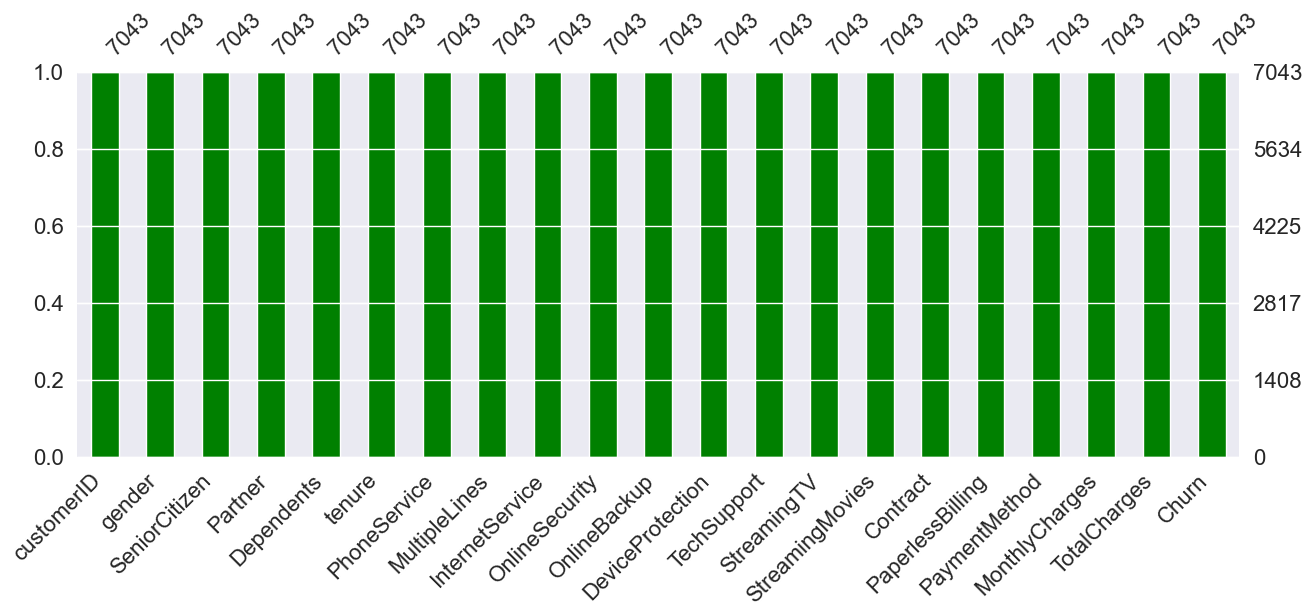

In [14]:
# Visualizing the missing values
msno.bar(data,figsize=(15,5), color="green")

### g) Descriptive Analysis on Numerical Attributes


In [15]:
data.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

### h) Descriptive Analysis on Categorical Attributes

In [16]:
data.describe(include="O").T

count unique               top  freq
customerID        7043   7043        7590-VHVEG     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
TotalCharges      7043   6531                      11
Churn             7043      2                No  5174

### i) Checking Unique Values on Categorical Attributes


In [17]:
# Calculate the number of unique values in each column
for column in data.columns:
    print(f"{column} - Number of unique values : {data[column].nunique()}")
    print("=============================================================")

customerID - Number of unique values : 7043
gender - Number of unique values : 2
SeniorCitizen - Number of unique values : 2
Partner - Number of unique values : 2
Dependents - Number of unique values : 2
tenure - Number of unique values : 73
PhoneService - Number of unique values : 2
MultipleLines - Number of unique values : 3
InternetService - Number of unique values : 3
OnlineSecurity - Number of unique values : 3
OnlineBackup - Number of unique values : 3
DeviceProtection - Number of unique values : 3
TechSupport - Number of unique values : 3
StreamingTV - Number of unique values : 3
StreamingMovies - Number of unique values : 3
Contract - Number of unique values : 3
PaperlessBilling - Number of unique values : 2
PaymentMethod - Number of unique values : 4
MonthlyCharges - Number of unique values : 1585
TotalCharges - Number of unique values : 6531
Churn - Number of unique values : 2


In [18]:
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
for i in categorical_features:
    print(f"{i} : {data[i].unique()}")
    print(data[i].value_counts())
    print("===================================================================================")

gender : ['Female' 'Male']
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen : [0 1]
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner : ['Yes' 'No']
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents : ['No' 'Yes']
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService : ['No' 'Yes']
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines : ['No phone service' 'No' 'Yes']
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService : ['DSL' 'Fiber optic' 'No']
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup : ['Yes' 'No' 'No internet service']
OnlineBackup
No                 

### k) Checking Duplicate values

In [19]:
dups = data.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data[dups]

No of duplicate rows = 0


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

### l) Checking Outliers

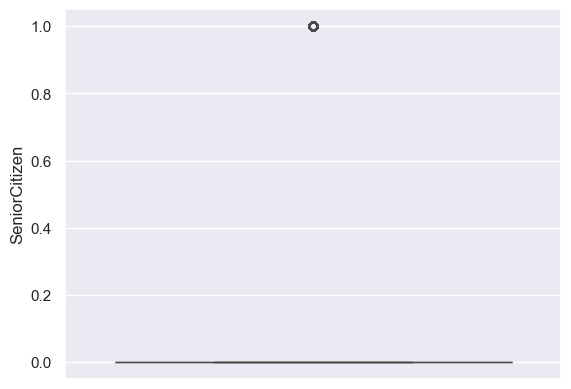

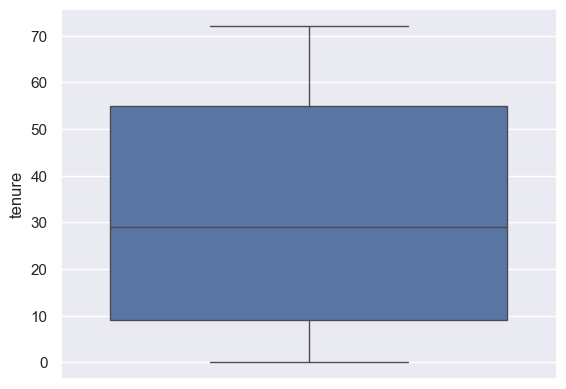

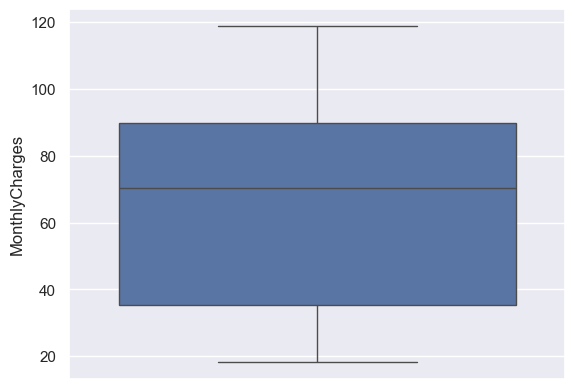

In [20]:
def boxplots(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object']).columns):
    boxplots(i)

### m) Checking the correlation between each feature.

<Axes: >

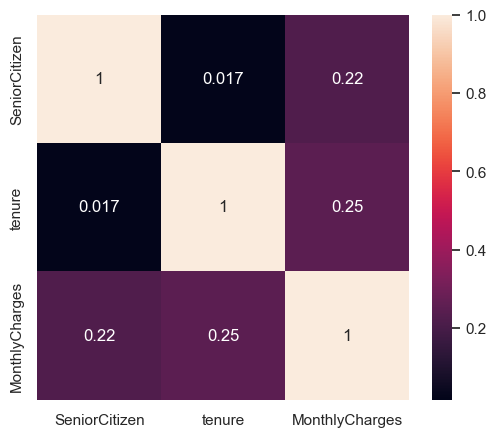

In [21]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(6,5))
correlation = data.corr(numeric_only=True)
sns.heatmap(abs(correlation), annot=True)

# Explaratory Data Analysis

In [22]:
data1 = data.copy()
data2 = data.copy()
data1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [23]:
# Labelling Categories in Numerical Features
data1["SeniorCitizen"] = data1["SeniorCitizen"].replace({1:"Yes", 0:"No"})


In [24]:
data1.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [25]:
print("Is there any missing value present or not ?", data1.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data1.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

Is there any missing value present or not ? False
**************************************************


Total No. of Missing Values  % of Missing Values
customerID                                  0                  0.0
gender                                      0                  0.0
SeniorCitizen                               0                  0.0
Partner                                     0                  0.0
Dependents                                  0                  0.0
tenure                                      0                  0.0
PhoneService                                0                  0.0
MultipleLines                               0                  0.0
InternetService                             0                  0.0
OnlineSecurity                              0                  0.0
OnlineBackup                                0                  0.0
DeviceProtection                            0                  0.0
TechSupport                                 0                  0.0
StreamingTV                                 0                  0.0
StreamingMovies                             0                  0.0
Contract                                    0                  0.0
PaperlessBilling                            0                  0.0
PaymentMethod                               0                  0.0
MonthlyCharges                              0                  0.0
TotalCharges                                0                  0.0
Churn                                       0                  0.0

In [26]:
data1.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

##### Function for Univariate Analysis

In [27]:
# Function for Univariate Analysis
def Univariate_Analysis(column_name):
    df_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data.groupby(column_name)["Churn"].count())
    df_EDA["% of Total"] = list(data[column_name].value_counts()/data.shape[0]*100)
    df_EDA['Yes_Churn'] = list(data[data["Churn"]=="Yes"].groupby(column_name)
                              ["Churn"].count())
    df_EDA['No_Churn'] = list(data[data["Churn"]=="No"].groupby(column_name)
                              ["Churn"].count())
    df_EDA['%Yes_Churn'] = round(df_EDA['Yes_Churn']/df_EDA['Total_Count']*100,3)
    df_EDA['%No_Churn'] = round(df_EDA['No_Churn']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Yes_Churn'])
    plt.legend(labels=['Total','Yes_Churn'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise Yes_Churn')
    plt.show()
    
    

    return df_EDA

In [28]:
# Function for Univariate Analysis
def Univariate_Analysis1(column_name):
    df_EDA = pd.DataFrame(sorted(list(data1[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data1.groupby(column_name)["Churn"].count())
    df_EDA["% of Total"] = list(data1[column_name].value_counts()/data1.shape[0]*100)
    df_EDA['Yes_Churn'] = list(data1[data1["Churn"]=="Yes"].groupby(column_name)
                              ["Churn"].count())
    df_EDA['No_Churn'] = list(data1[data1["Churn"]=="No"].groupby(column_name)
                              ["Churn"].count())
    df_EDA['%Yes_Churn'] = round(df_EDA['Yes_Churn']/df_EDA['Total_Count']*100,3)
    df_EDA['%No_Churn'] = round(df_EDA['No_Churn']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 6))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Yes_Churn'])
    plt.legend(labels=['Total','Yes_Churn'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise Yes_Churn')
    plt.show()
    
    

    return df_EDA

In [29]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Churn"):
    """A function for plotting the distribution of numerical variables and its effect on Churn"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [30]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "Churn"):
    
    """A function for Plotting the effect of variables(categorical data) on Churn """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Churn",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Churn",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Churn")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Churn rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Churn)")
    plt.tight_layout()

    plt.show()

##### Function for chu-square test on categorical variables

In [31]:
# function for chi suqared test for 2 categorical  variables

def chi_sqred_ind_test(df, col1, col2, alpha=0.05, debug=True, print_result=True):
    contigency_table =  pd.crosstab(df[col1],df[col2],margins = False)
    
    if debug:
        print("Contigency table: \n" , contigency_table)
    stat, p_val, dof, expected_val = chi2_contingency(contigency_table)
    if debug:
        print("Statistic:", stat)
        print("P-value:", p_val)
        print("DOF:", dof)
    critical = chi2.ppf(1-alpha, dof)
    
    if print_result:
        if debug:
            print('probability=%.3f, critical=%.3f, stat=%.3f' % (1-alpha, critical, stat))
        if abs(stat) >= critical:
            print("Dependent (reject Null Hypothesis(H0))")
        else:
            print('Independent (fail to reject Null Hypothesis(H0))')
        if p_val <= alpha:
            print("Dependent (reject Null Hypothesis(H0))")
        else:
            print('Independent (fail to reject Null Hypothesis(H0))')
    return stat, p_val, dof

##### Function for  Hypothesis test on numerical variables

In [32]:
# Hypothesis z-test
from statsmodels.stats.weightstats import ztest as ztest

#perform two sample z-test
def Hypothesisztest(x1, x2):
    stats, p_val = ztest(x1, x2, value=0)
    print(f"Yes_mean : {x1.mean()}")
    print("*"*50)
    print(f"No_mean : {x2.mean()}")
    print("*"*50)
    print(f"Yes_std : {x1.std()}")
    print("*"*50)
    print(f"No_std : {x2.std()}")
    print("*"*50)
    print(f"stats : {stats}")
    print("*"*50)
    print(f"p_val : {p_val}")

    if p_val < 0.05:
        print("We Reject Null Hypothesis i.e means of two groups not equal")
    else:
        print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

In [33]:
# Hypothesis t-test
import scipy.stats as stats
import scipy.stats as stats


#perform two sample t-test
def Hypothesisttest(x1, x2):
    statics, p_val = stats.ttest_ind(x1, x2, equal_var=True)
    print(f"Yes_mean : {x1.mean()}")
    print("*"*50)
    print(f"No_mean : {x2.mean()}")
    print("*"*50)
    print(f"Yes_std : {x1.std()}")
    print("*"*50)
    print(f"No_std : {x2.std()}")
    print("*"*50)
    print(f"statics : {statics}")
    print("*"*50)
    print(f"p_val : {p_val}")

    if p_val < 0.05:
        print("We Reject Null Hypothesis i.e means of two groups not equal")
    else:
        print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

## Univariate Analysis

## Visualizing coupon TenYearCHD

In [34]:
class_count = data1["Churn"].value_counts()
print(class_count)
print(f"No : {class_count[0]}, {round(class_count[0]/data1.shape[0]*100,3)}%")
print(f"Yes : {class_count[1]}, {round(class_count[1]/data1.shape[0]*100,3)}%")

Churn
No     5174
Yes    1869
Name: count, dtype: int64
No : 5174, 73.463%
Yes : 1869, 26.537%


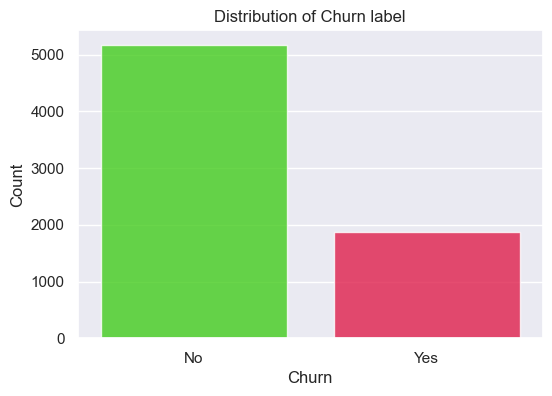

In [35]:
count = data1["Churn"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel("Count", fontsize=12)
plt.xlabel("Churn", fontsize=12)
plt.title("Distribution of Churn label")
plt.show()

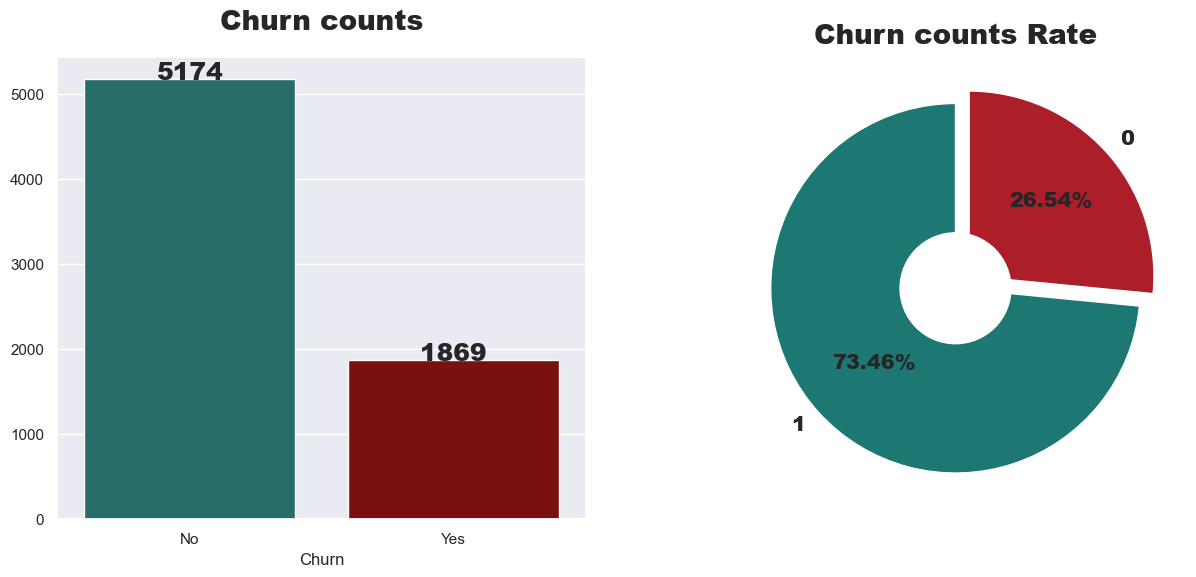

In [36]:
#Visualization to show CHD in Counts.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
accptance_rate = data1["Churn"].value_counts()
sns.barplot(x=accptance_rate.index, y=accptance_rate.values, palette=["#1d7874","#8B0000"])
plt.title("Churn counts",fontweight="black",size=20,pad=20)
# for i, v in enumerate(accptance_rate.values):
#     plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)
plt.text(0, accptance_rate.values[0], 5174, ha="center", fontweight='black', fontsize=18)
plt.text(1, accptance_rate.values[1], 1869, ha="center", fontweight='black', fontsize=18)

#Visualization to show CHD in Percentage.
plt.subplot(1,2,2)
plt.pie(accptance_rate, labels=["1","0"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Churn counts Rate",fontweight="black",size=20,pad=10)
plt.show()


**Inference:**
* Dataset is highly imbalanced.

In [37]:
data1["id"] = np.arange(0, len(data1))

## Visualizing tenure

In [38]:
data1["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [39]:
data1["tenure"].nunique()

73

##### Which Age group is more vulnerable to coronary heart disease ?

Text(0.5, 1.0, 'tenure Distrubution')

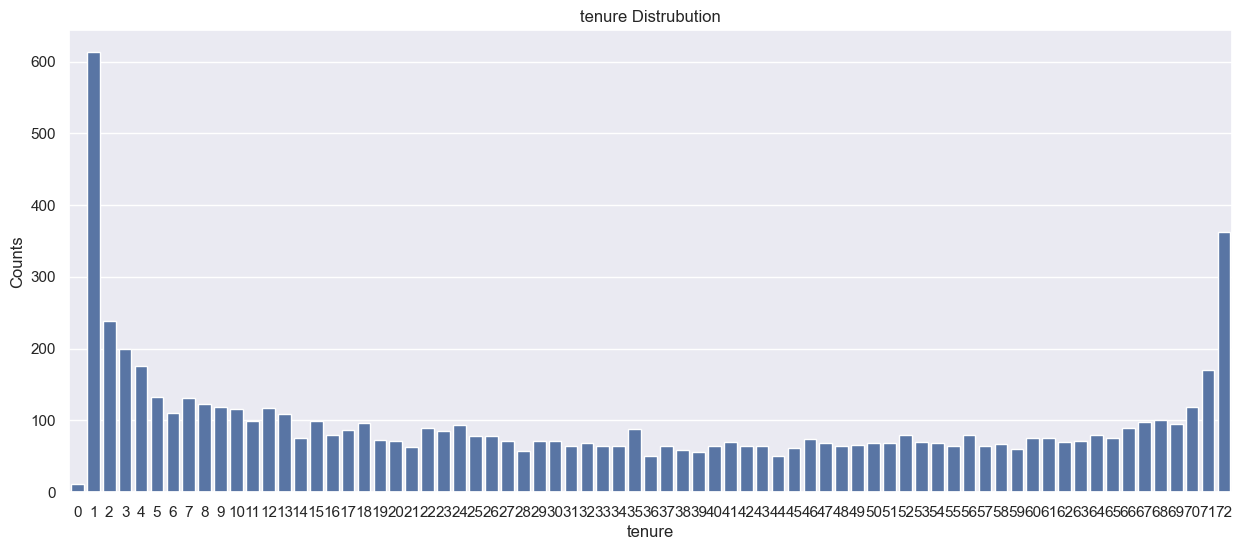

In [40]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['tenure'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('tenure Distrubution')

* Data contains people of age from 32-70 years.

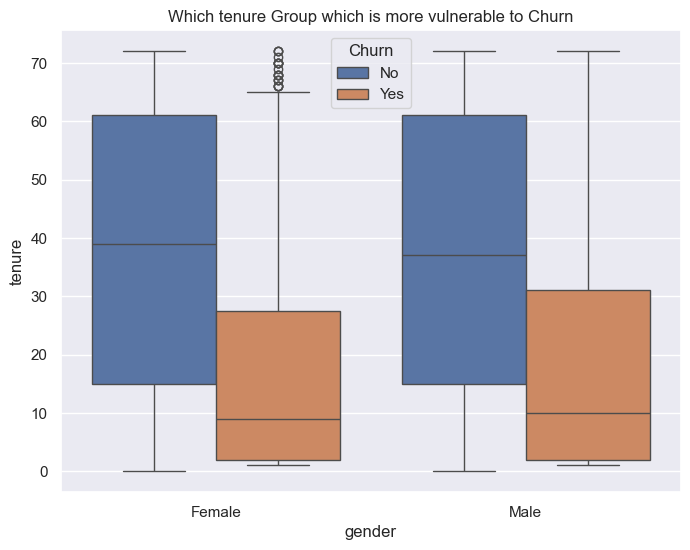

In [41]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (8,6))
ax = sns.boxplot(x = data1['gender'], y = data1['tenure'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("Which tenure Group which is more vulnerable to Churn")
handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

<Axes: xlabel='tenure', ylabel='count'>

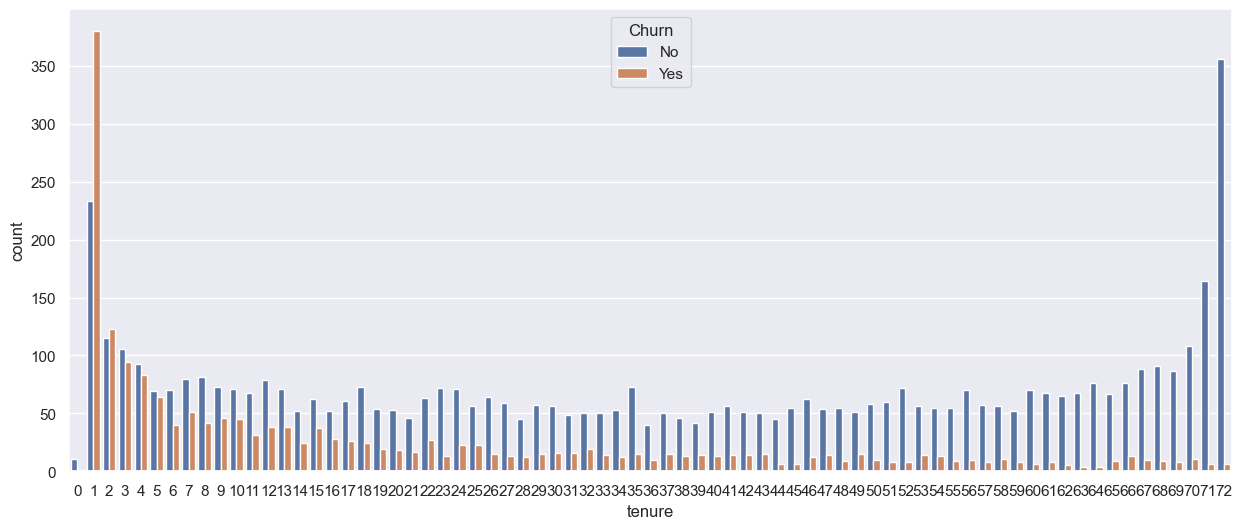

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(x="tenure", hue="Churn", data=data)

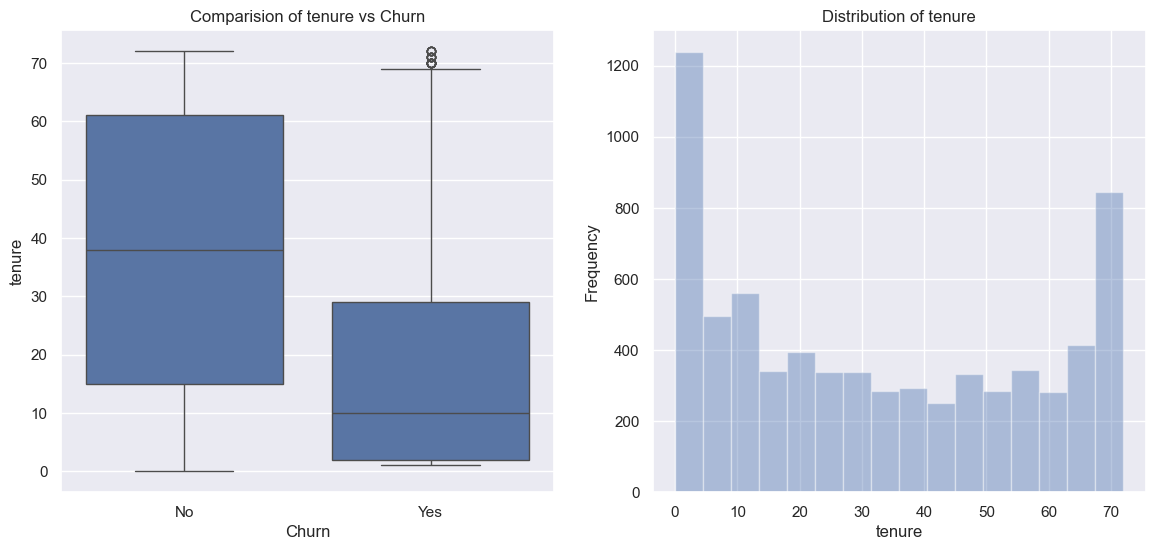

In [43]:
NumericalVariables_targetPlots(data1,segment_by="tenure")

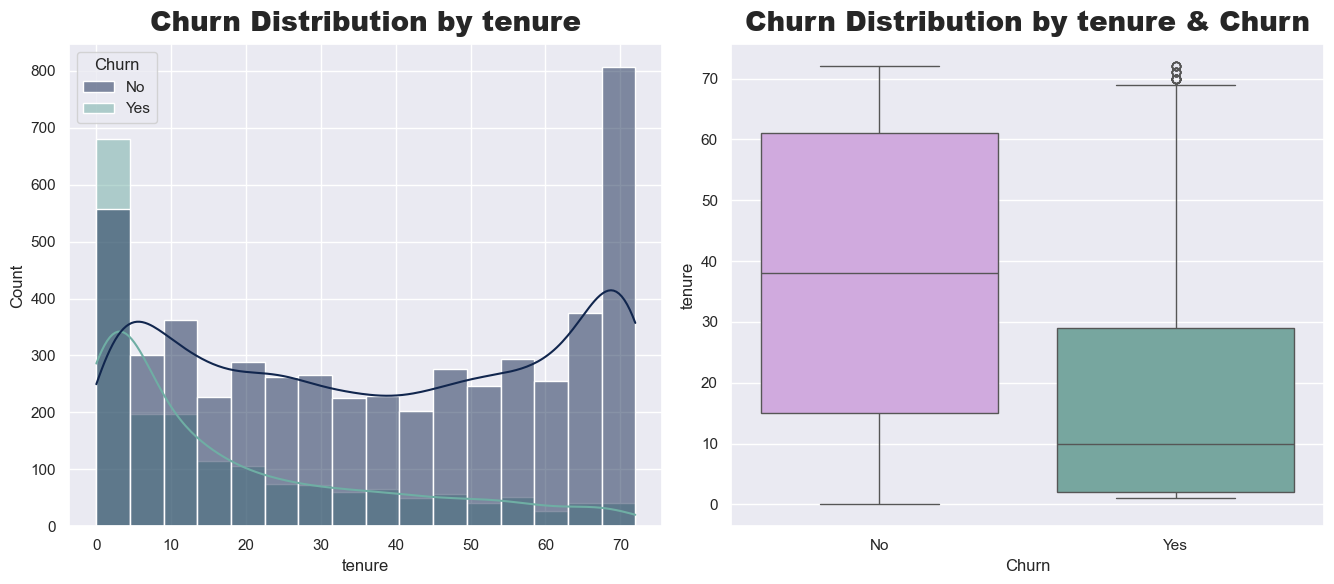

In [44]:
#Visualization to show CHD Distribution by Age.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="tenure",hue="Churn",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("Churn Distribution by tenure",fontweight="black",size=20,pad=10)

#Visualization to show CHD Distribution by Age & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="Churn",y="tenure",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("Churn Distribution by tenure & Churn",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

<Axes: xlabel='tenure'>

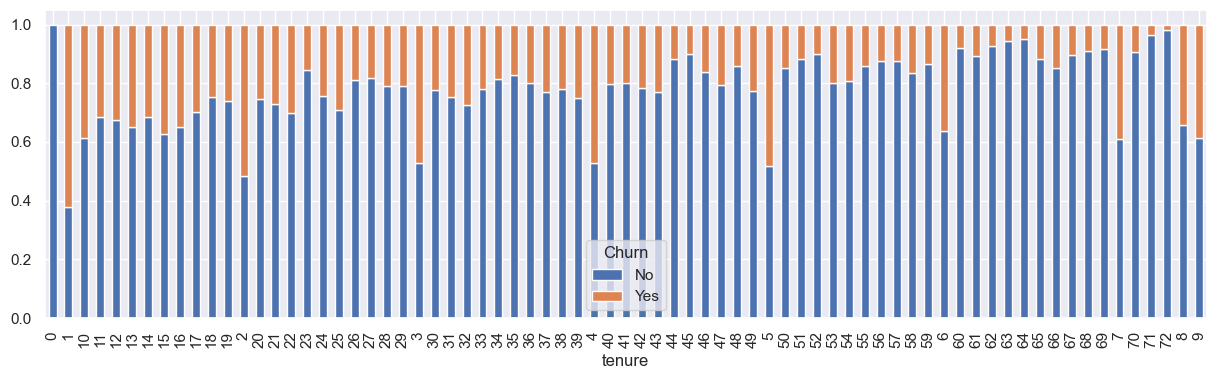

In [45]:

tmp = data1[["Churn", "tenure"]]
tmp["tenure"] = tmp["tenure"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "tenure"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "tenure==\""+row["tenure"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="Churn", index="tenure", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))

In [46]:
# Hypothesis z-test
from statsmodels.stats.weightstats import ztest as ztest

#perform two sample z-test

stats, p_val = ztest(data1["tenure"][data1["Churn"]=="Yes"], data1["tenure"][data1["Churn"]=="No"], value=0)
print(f"stats : {stats}")
print(f"p_val : {p_val}")
if p_val < 0.05:
    print("We Reject Null Hypothesis i.e means of two groups not equal")
else:
    print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

stats : -31.57955051135377
p_val : 7.048598128156637e-219
We Reject Null Hypothesis i.e means of two groups not equal


In [47]:
Hypothesisztest(x1=data1.query("Churn == 'Yes'")["tenure"], x2=data1.query("Churn == 'No'")["tenure"])

Yes_mean : 17.979133226324237
**************************************************
No_mean : 37.56996521066873
**************************************************
Yes_std : 19.53112305451955
**************************************************
No_std : 24.113776690704075
**************************************************
stats : -31.57955051135377
**************************************************
p_val : 7.048598128156637e-219
We Reject Null Hypothesis i.e means of two groups not equal


In [48]:
Hypothesisztest(data1["tenure"][data1["Churn"]=="Yes"], data1["tenure"][data1["Churn"]=="No"])

Yes_mean : 17.979133226324237
**************************************************
No_mean : 37.56996521066873
**************************************************
Yes_std : 19.53112305451955
**************************************************
No_std : 24.113776690704075
**************************************************
stats : -31.57955051135377
**************************************************
p_val : 7.048598128156637e-219
We Reject Null Hypothesis i.e means of two groups not equal


In [49]:
#perform two sample t-test
import scipy.stats as stats
statitics, p_val = stats.ttest_ind(data1["tenure"][data1["Churn"]=="Yes"], data1["tenure"][data1["Churn"]=="No"], equal_var=True)
print(f"stats : {stats}")
print("*"*50)
print(f"p_val : {p_val}")
if p_val < 0.05:
    print("We Reject Null Hypothesis i.e means of two groups not equal")
else:
    print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

stats : <module 'scipy.stats' from 'C:\\Users\\jyoti\\anaconda3\\envs\\notebook\\Lib\\site-packages\\scipy\\stats\\__init__.py'>
**************************************************
p_val : 7.99905796059022e-205
We Reject Null Hypothesis i.e means of two groups not equal


In [50]:
Hypothesisttest(x1=data1.query("Churn == 'Yes'")["tenure"], x2=data1.query("Churn == 'No'")["tenure"])

Yes_mean : 17.979133226324237
**************************************************
No_mean : 37.56996521066873
**************************************************
Yes_std : 19.53112305451955
**************************************************
No_std : 24.113776690704075
**************************************************
statics : -31.57955051135377
**************************************************
p_val : 7.99905796059022e-205
We Reject Null Hypothesis i.e means of two groups not equal


In [51]:
Hypothesisttest(data1["tenure"][data1["Churn"]=="Yes"], data1["tenure"][data1["Churn"]=="No"])

Yes_mean : 17.979133226324237
**************************************************
No_mean : 37.56996521066873
**************************************************
Yes_std : 19.53112305451955
**************************************************
No_std : 24.113776690704075
**************************************************
statics : -31.57955051135377
**************************************************
p_val : 7.99905796059022e-205
We Reject Null Hypothesis i.e means of two groups not equal


## Visualizing gender

In [52]:
data1["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [53]:
data["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

gender
Male      3555
Female    3488
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'gender ratio Proposanate')

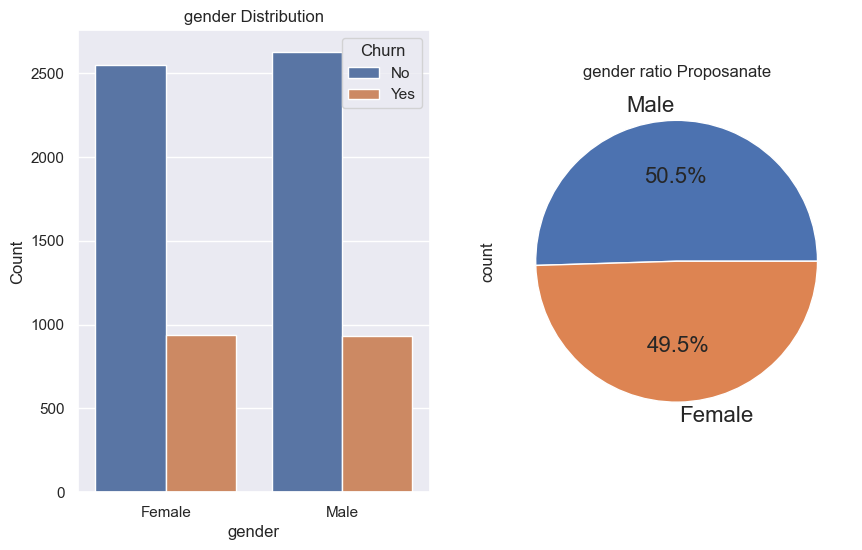

In [54]:
#  Distribution of "education"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="gender", hue="Churn", data=data1)
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('gender Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['gender'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('gender ratio Proposanate')

gender
Male      3555
Female    3488
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'gender ratio Proposanate')

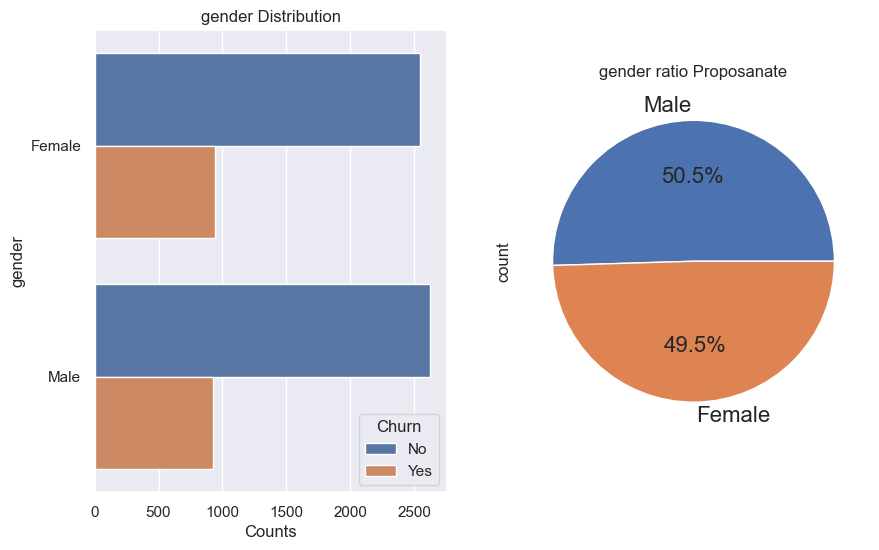

In [55]:
#  Distribution of "education"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="gender", hue="Churn", data=data)
plt.xlabel('Counts')
plt.ylabel('gender')
plt.title('gender Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data['gender'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('gender ratio Proposanate')

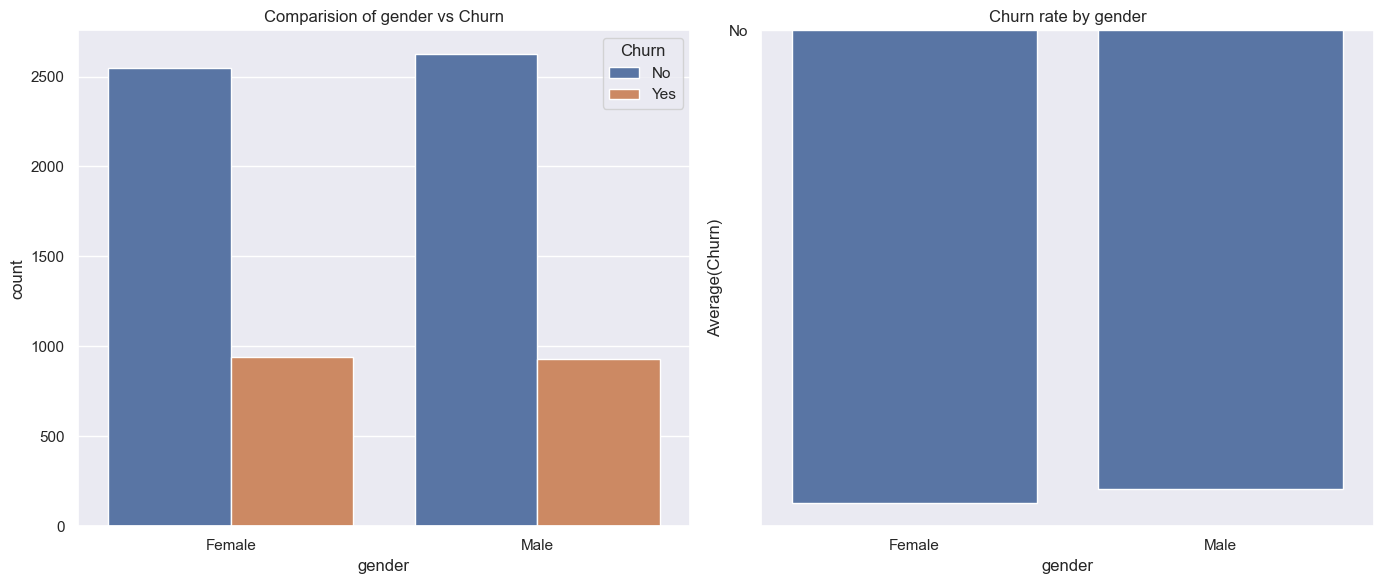

In [56]:
CategoricalVariables_targetPlots(data1,"gender")

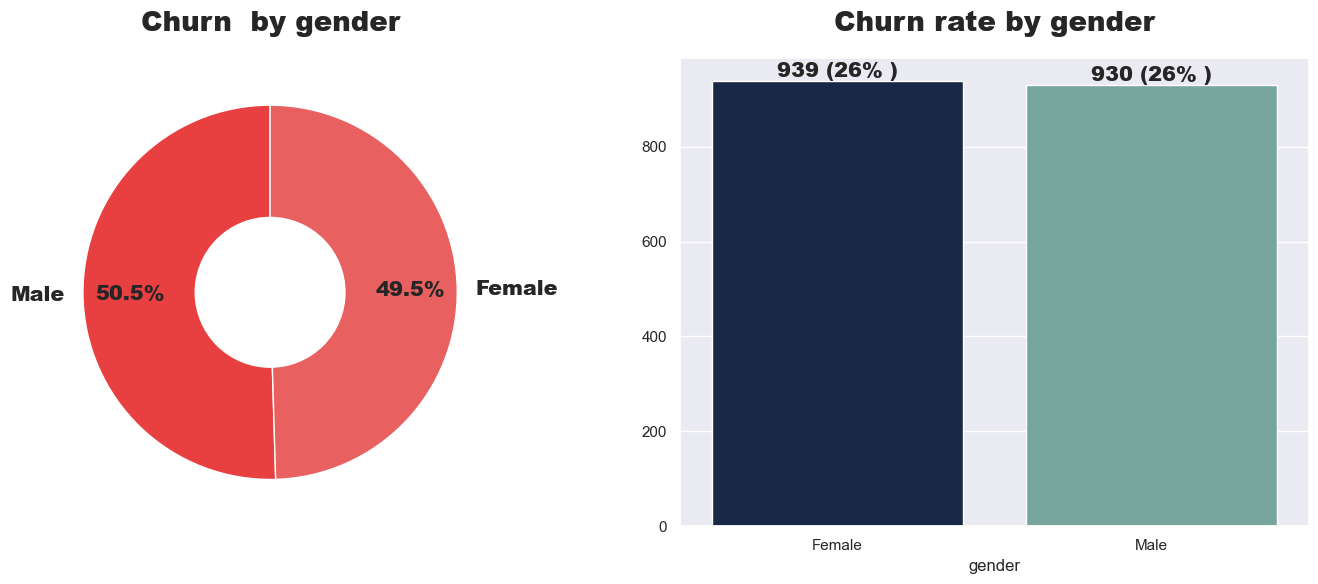

In [57]:
#Visualization to show Churn by gender.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["gender"].value_counts()
plt.title("Churn  by gender", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by gender.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=="Yes"]
value_2 = new_df["gender"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


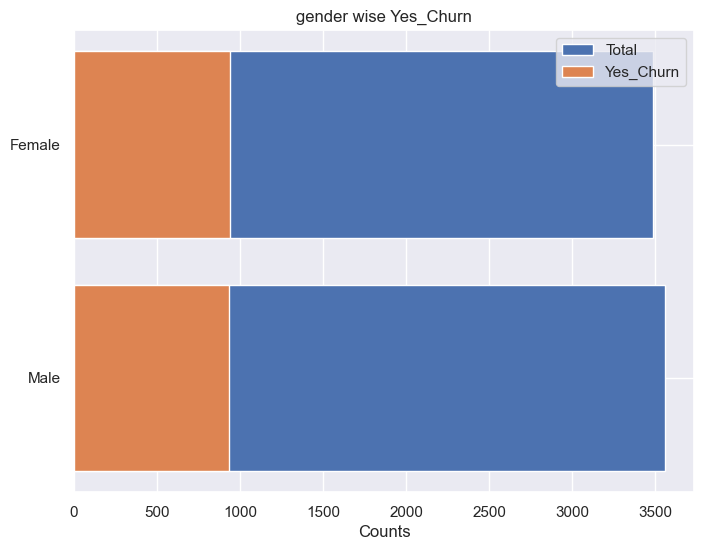

gender  Total_Count  % of Total  Yes_Churn  No_Churn  %Yes_Churn  %No_Churn
1    Male         3555    49.52435        930      2625      26.160     73.840
0  Female         3488    50.47565        939      2549      26.921     73.079

In [58]:
Univariate_Analysis1("gender")

Churn  gender  count  count_norm
0    No  Female   2549    0.730791
1    No    Male   2625    0.738397
2   Yes  Female    939    0.269209
3   Yes    Male    930    0.261603

<Axes: xlabel='gender'>

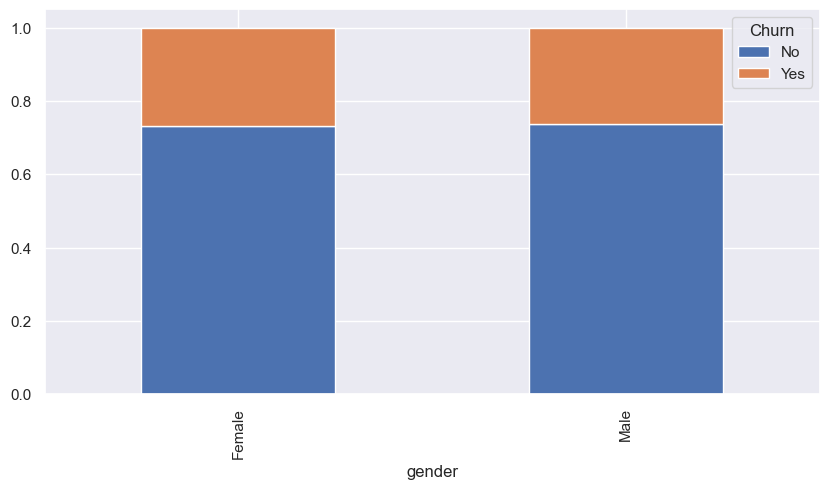

In [59]:
tmp = data1[["Churn", "gender"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "gender"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "gender==\""+row["gender"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="gender", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [60]:
# Hypothesis testing on "gender" column
stat, p_val, dof = chi_sqred_ind_test(data1, "gender", "Churn", 0.05)

Contigency table: 
 Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Statistic: 0.4840828822091383
P-value: 0.48657873605618596
DOF: 1
probability=0.950, critical=3.841, stat=0.484
Independent (fail to reject Null Hypothesis(H0))
Independent (fail to reject Null Hypothesis(H0))


In [61]:
t = pd.crosstab(data1.gender, data1["Churn"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=0.4840828822091383, pvalue=0.48657873605618596, dof=1, expected_freq=array([[2562.38989067,  925.61010933],
       [2611.61010933,  943.38989067]]))

## Visualizing SeniorCitizen

In [62]:
data1["SeniorCitizen"].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

##### Which gender is prone to coronary heart disease?

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'SeniorCitizen ratio Proposanate')

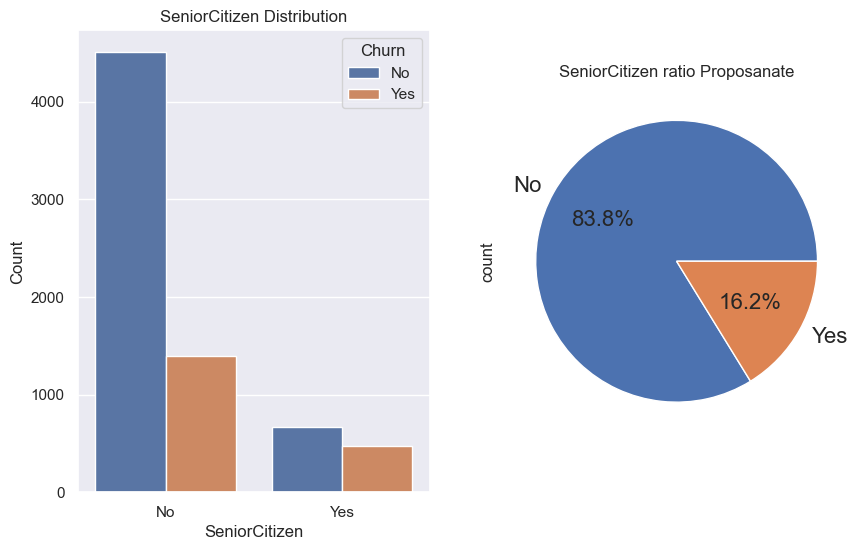

In [63]:
#  Distribution of "SeniorCitizen"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="SeniorCitizen", hue="Churn", data=data1)
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.title('SeniorCitizen Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['SeniorCitizen'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('SeniorCitizen ratio Proposanate')

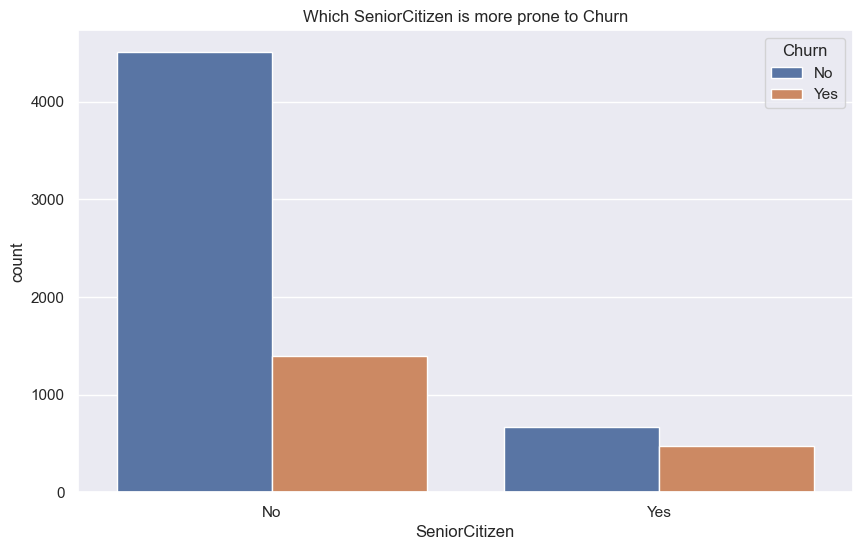

In [64]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,6))
sns.countplot(x = data1['SeniorCitizen'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("Which SeniorCitizen is more prone to Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()

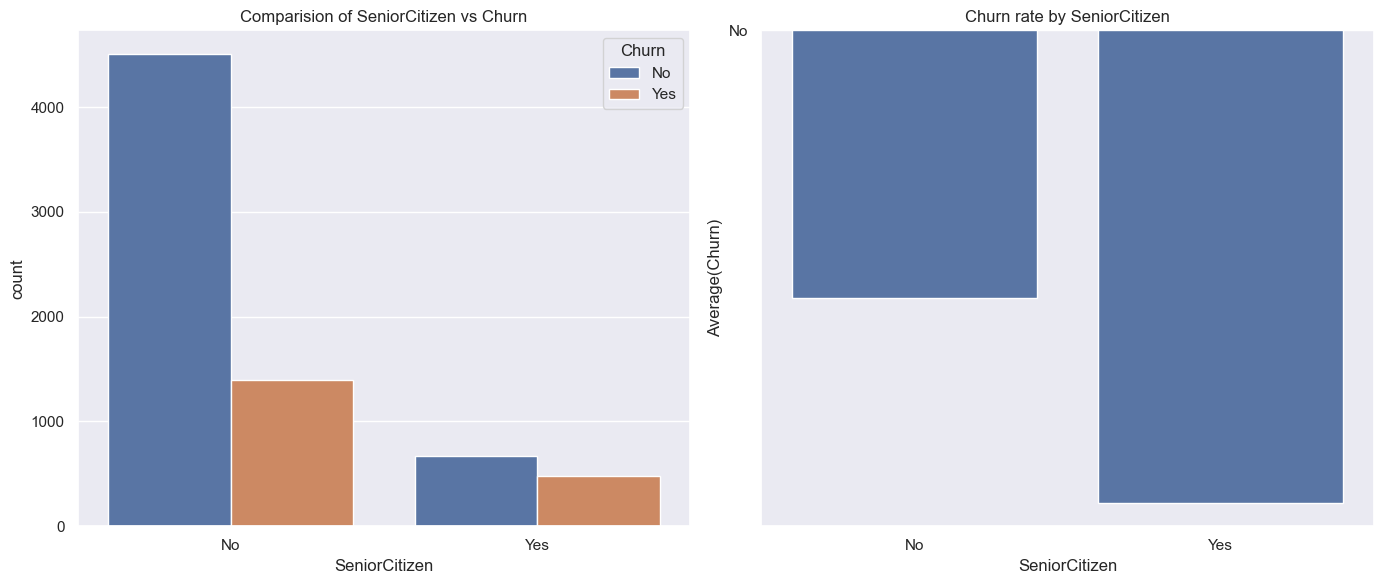

In [65]:
CategoricalVariables_targetPlots(data1,"SeniorCitizen")

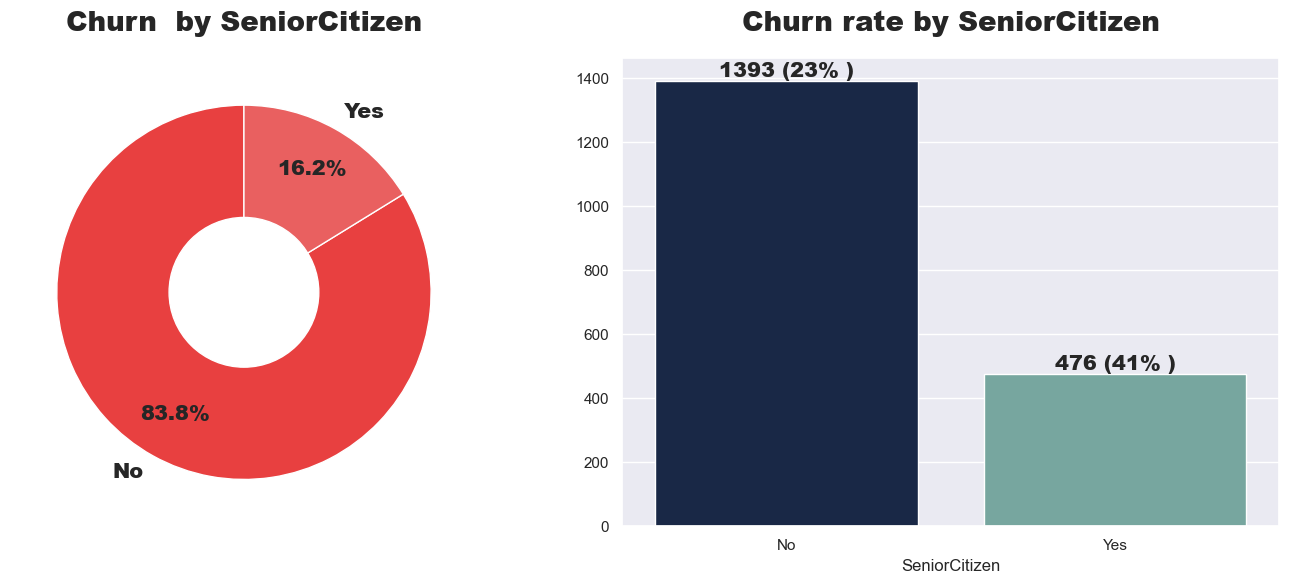

In [66]:
#Visualization to show Churn by SeniorCitizen.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["SeniorCitizen"].value_counts()
plt.title("Churn  by SeniorCitizen", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by SeniorCitizen.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=="Yes"]
value_2 = new_df["SeniorCitizen"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
# acceptance_rate = [18, 12]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by SeniorCitizen",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


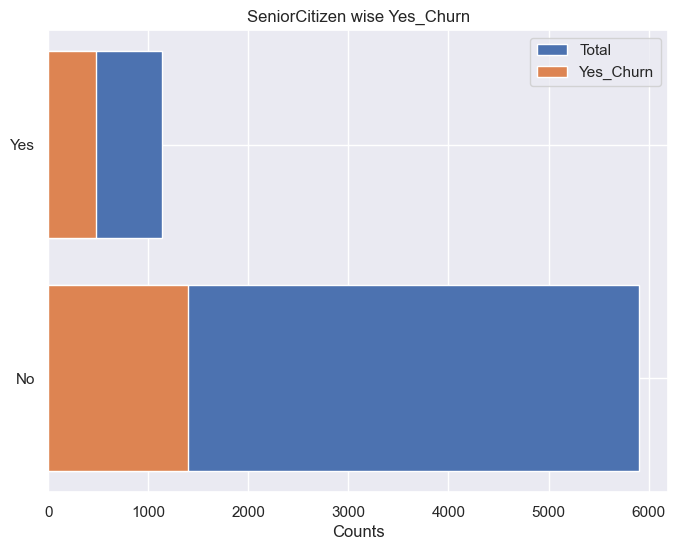

SeniorCitizen  Total_Count  % of Total  Yes_Churn  No_Churn  %Yes_Churn  \
0            No         5901   83.785319       1393      4508      23.606   
1           Yes         1142   16.214681        476       666      41.681   

   %No_Churn  
0     76.394  
1     58.319

In [67]:
Univariate_Analysis1("SeniorCitizen")

Churn SeniorCitizen  count  count_norm
0    No            No   4508    0.763938
1    No           Yes    666    0.583187
2   Yes            No   1393    0.236062
3   Yes           Yes    476    0.416813

<Axes: xlabel='SeniorCitizen'>

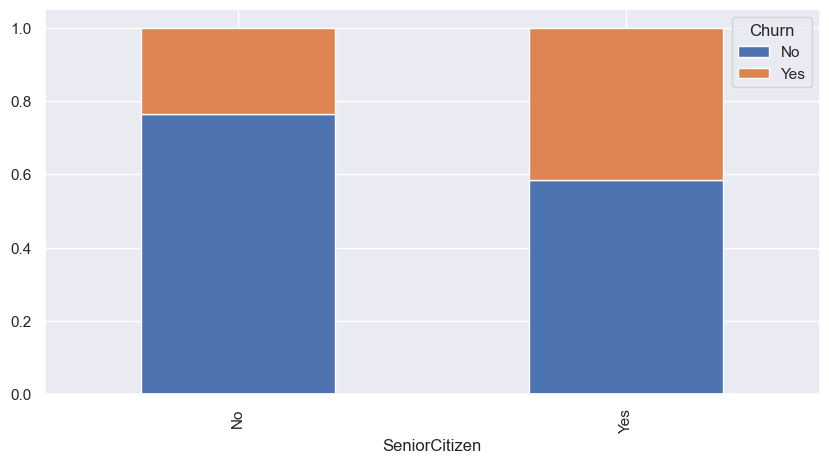

In [68]:
tmp = data1[["Churn", "SeniorCitizen"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "SeniorCitizen"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "SeniorCitizen==\""+row["SeniorCitizen"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="SeniorCitizen", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [69]:
# Hypothesis testing on "SeniorCitizen" column
stat, p_val, dof = chi_sqred_ind_test(data1, "SeniorCitizen", "Churn", 0.05)

Contigency table: 
 Churn            No   Yes
SeniorCitizen            
No             4508  1393
Yes             666   476
Statistic: 159.42630036838742
P-value: 1.510066805092378e-36
DOF: 1
probability=0.950, critical=3.841, stat=159.426
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [70]:
t = pd.crosstab(data1.SeniorCitizen, data1["Churn"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=159.42630036838742, pvalue=1.510066805092378e-36, dof=1, expected_freq=array([[4335.05239245, 1565.94760755],
       [ 838.94760755,  303.05239245]]))

## Visualizing Partner	

In [71]:
data1["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'Partner ratio Proposanate')

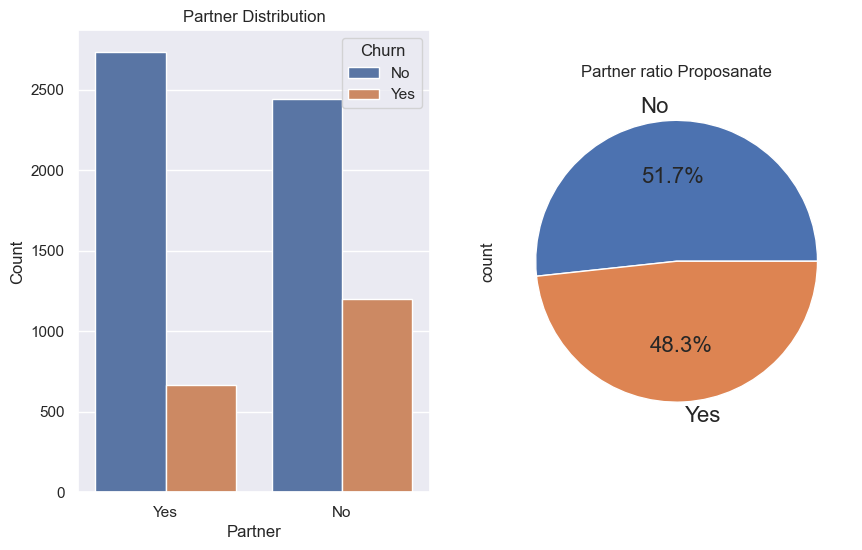

In [72]:
#  Distribution of "Partner	"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="Partner", hue="Churn", data=data1)
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Partner Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['Partner'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('Partner ratio Proposanate')

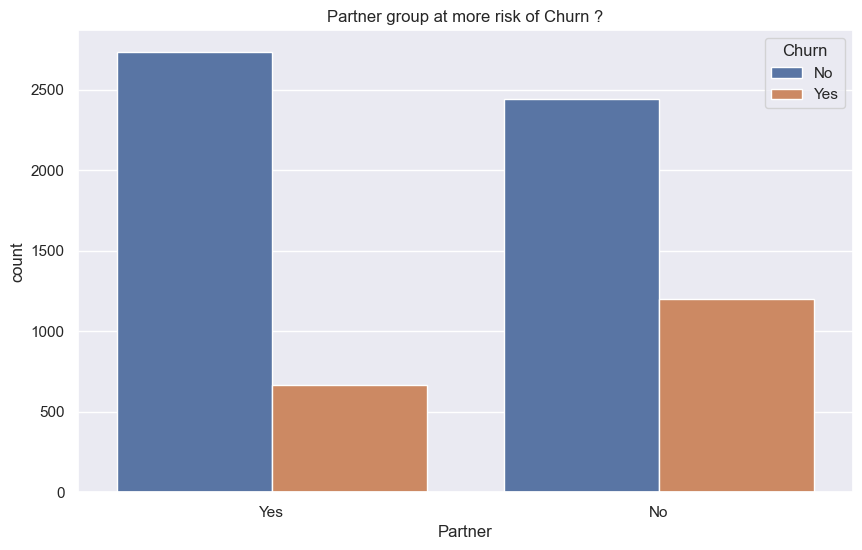

In [73]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['Partner'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("Partner group at more risk of Churn ?")
# plt.legend(['No Risk','At Risk'])
plt.show()

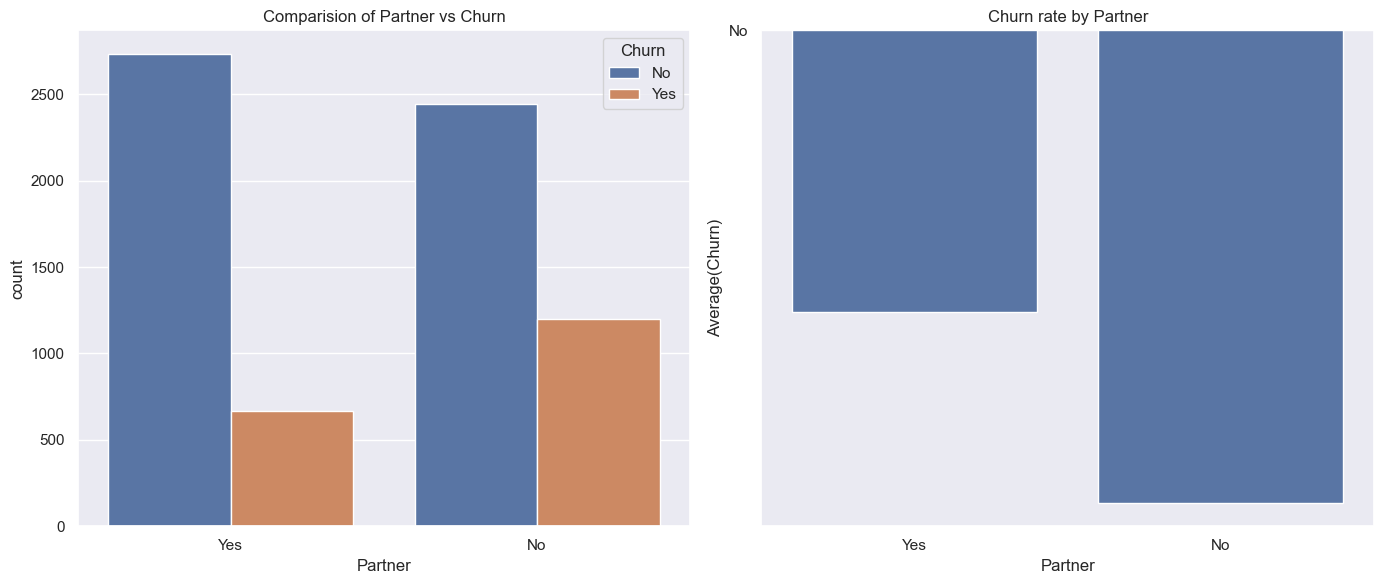

In [74]:
CategoricalVariables_targetPlots(data1,"Partner")

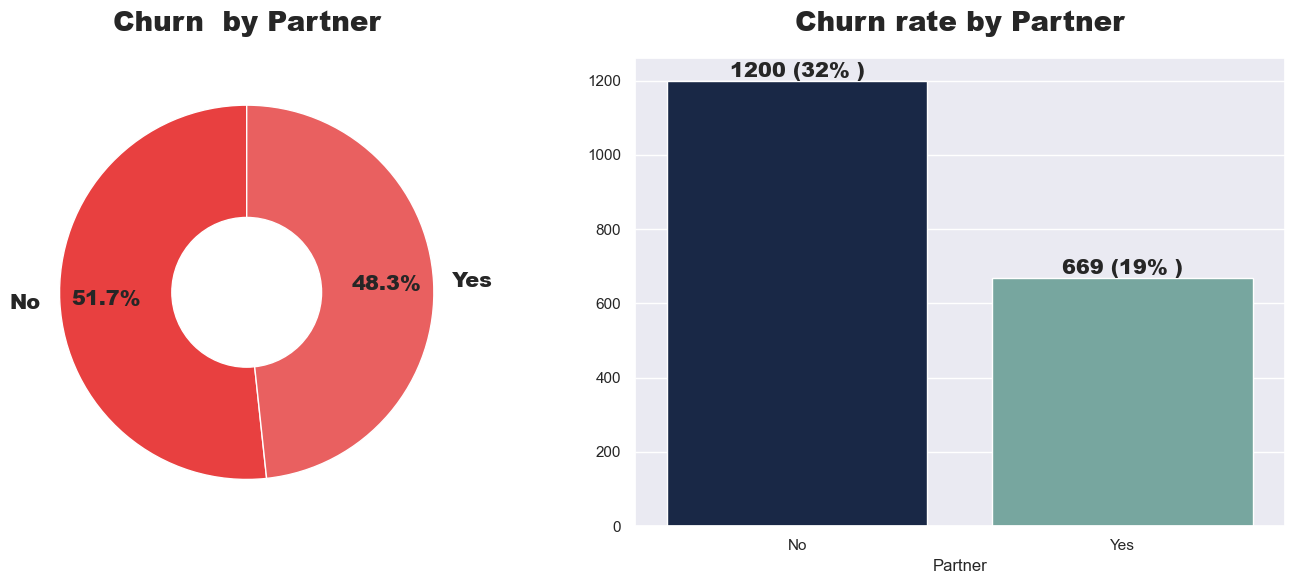

In [75]:
#Visualization to show Churn by Partner.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["Partner"].value_counts()
plt.title("Churn  by Partner", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by Partner.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=="Yes"]
value_2 = new_df["Partner"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by Partner",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


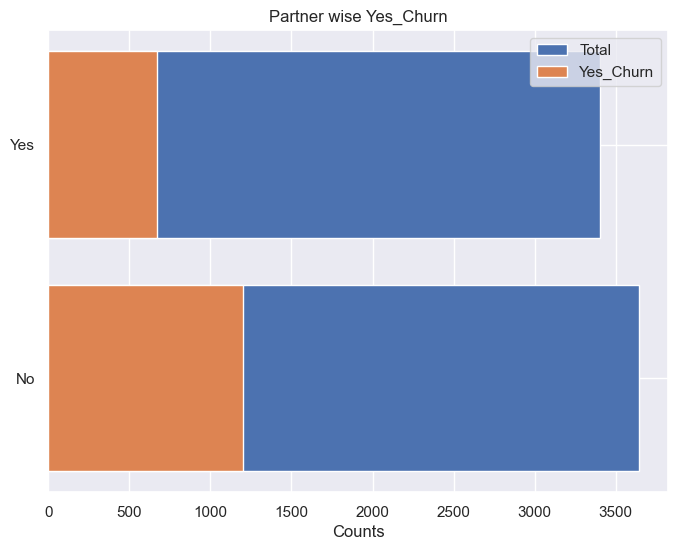

Partner  Total_Count  % of Total  Yes_Churn  No_Churn  %Yes_Churn  %No_Churn
0      No         3641    51.69672       1200      2441      32.958     67.042
1     Yes         3402    48.30328        669      2733      19.665     80.335

In [76]:
Univariate_Analysis1("Partner")

Churn Partner  count  count_norm
0    No      No   2441    0.670420
1    No     Yes   2733    0.803351
2   Yes      No   1200    0.329580
3   Yes     Yes    669    0.196649

<Axes: xlabel='Partner'>

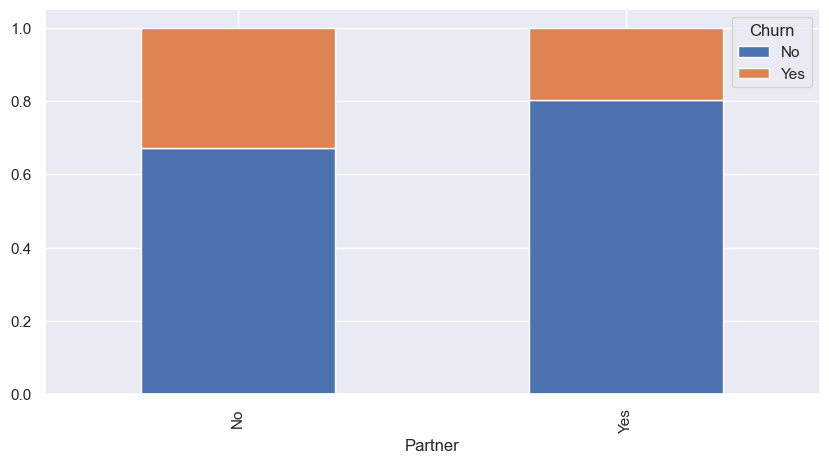

In [77]:
tmp = data1[["Churn", "Partner"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "Partner"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "Partner==\""+row["Partner"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="Partner", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [78]:
# Hypothesis testing on "is_smoking" column
stat, p_val, dof = chi_sqred_ind_test(data1, "Partner", "Churn", 0.05)

Contigency table: 
 Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
Statistic: 158.7333820309922
P-value: 2.1399113440759935e-36
DOF: 1
probability=0.950, critical=3.841, stat=158.733
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [79]:
t = pd.crosstab(data1.Partner, data1["Churn"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=158.7333820309922, pvalue=2.1399113440759935e-36, dof=1, expected_freq=array([[2674.78830044,  966.21169956],
       [2499.21169956,  902.78830044]]))

## Visualizing Dependents

In [80]:
data1["MonthlyCharges"].unique()


array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [81]:
data1["MonthlyCharges"].nunique()



1585

Text(0.5, 1.0, 'MonthlyCharges Distrubution')

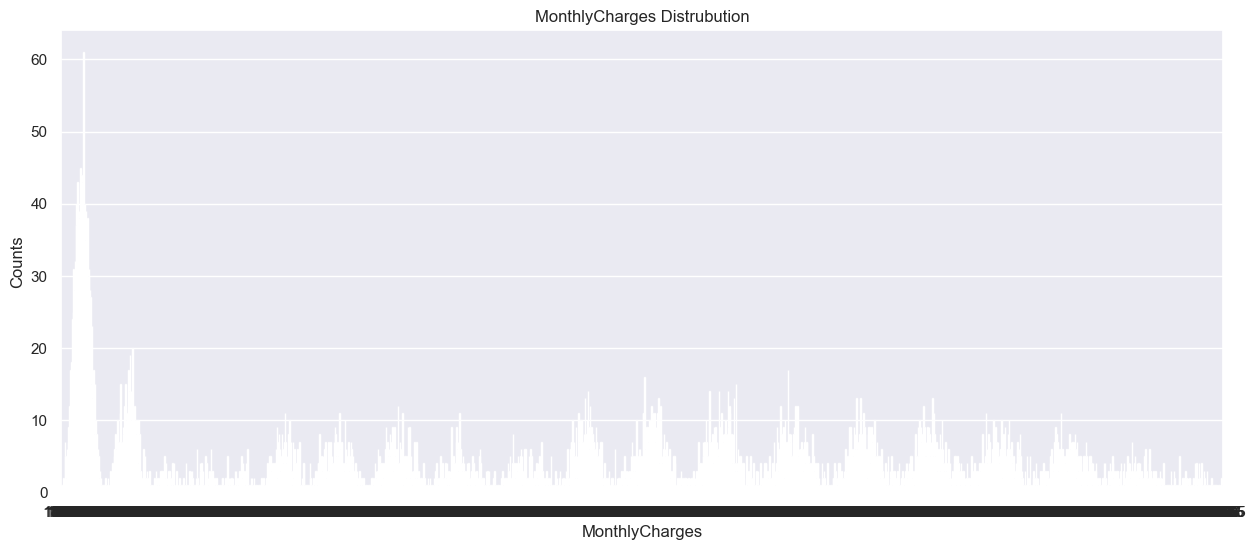

In [82]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['MonthlyCharges'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('MonthlyCharges Distrubution')

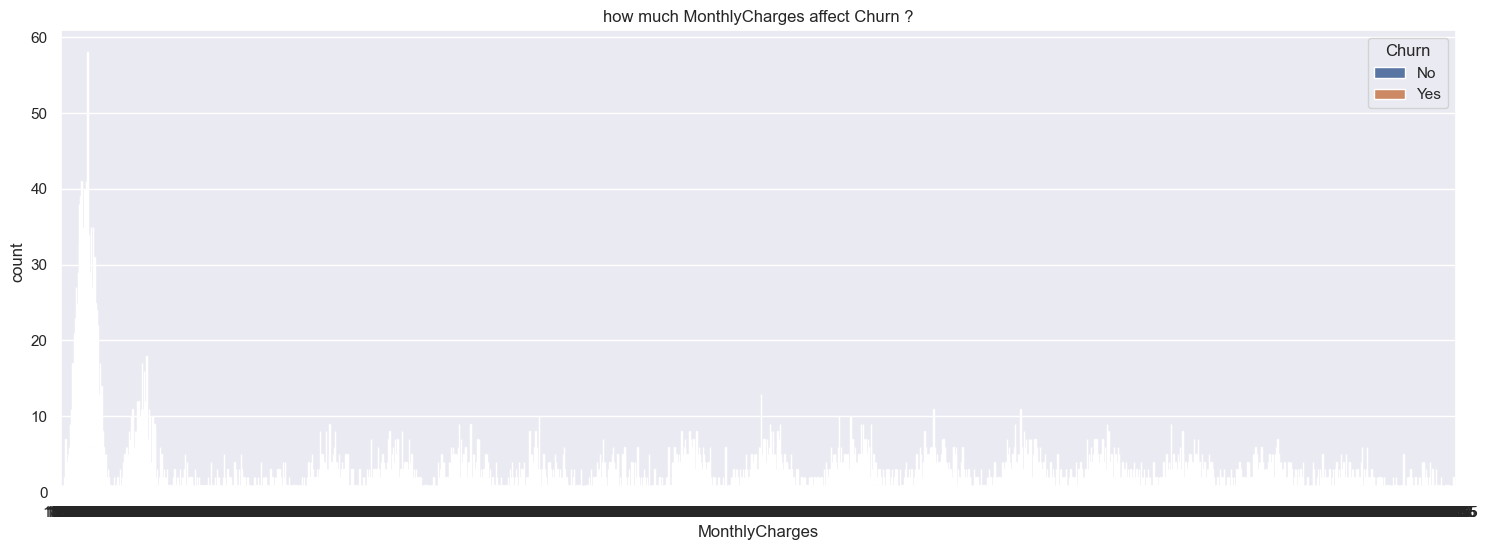

In [83]:
plt.figure(figsize = (18,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = data1['MonthlyCharges'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("how much MonthlyCharges affect Churn ?")
# plt.legend(['No Risk','At Risk'])
plt.show()

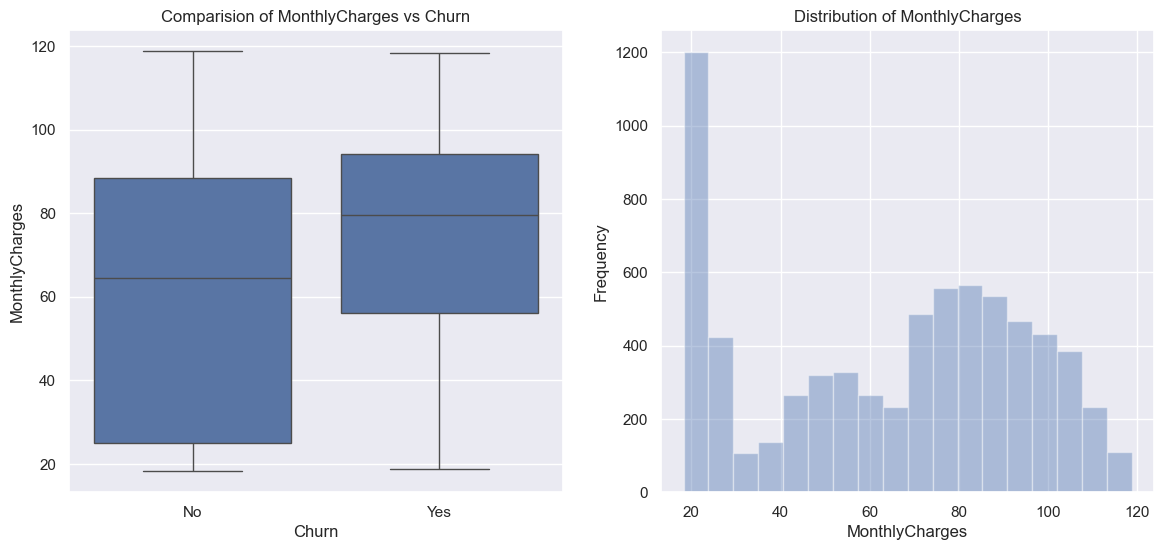

In [84]:
NumericalVariables_targetPlots(data1,segment_by="MonthlyCharges")

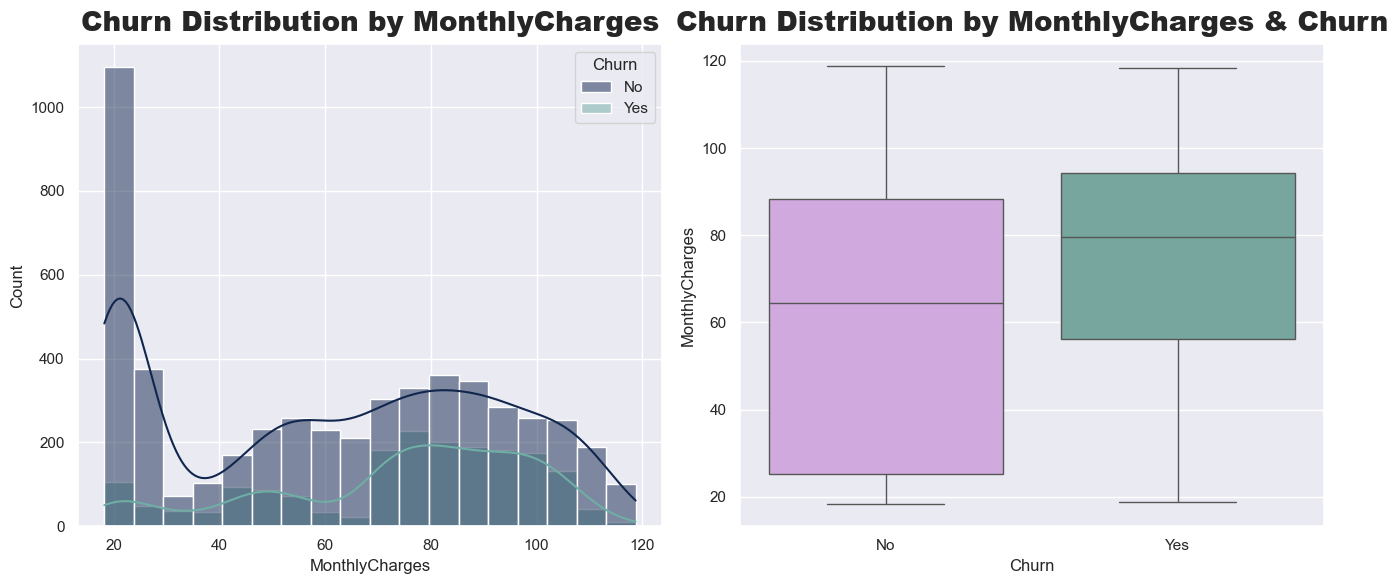

In [85]:
#Visualization to show Churn Distribution by MonthlyCharges.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyCharges",hue="Churn",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("Churn Distribution by MonthlyCharges",fontweight="black",size=20,pad=10)


#Visualization to show CHD Distribution by MonthlyCharges & Churn.
plt.subplot(1,2,2)
sns.boxplot(x="Churn",y="MonthlyCharges",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("Churn Distribution by MonthlyCharges & Churn",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()


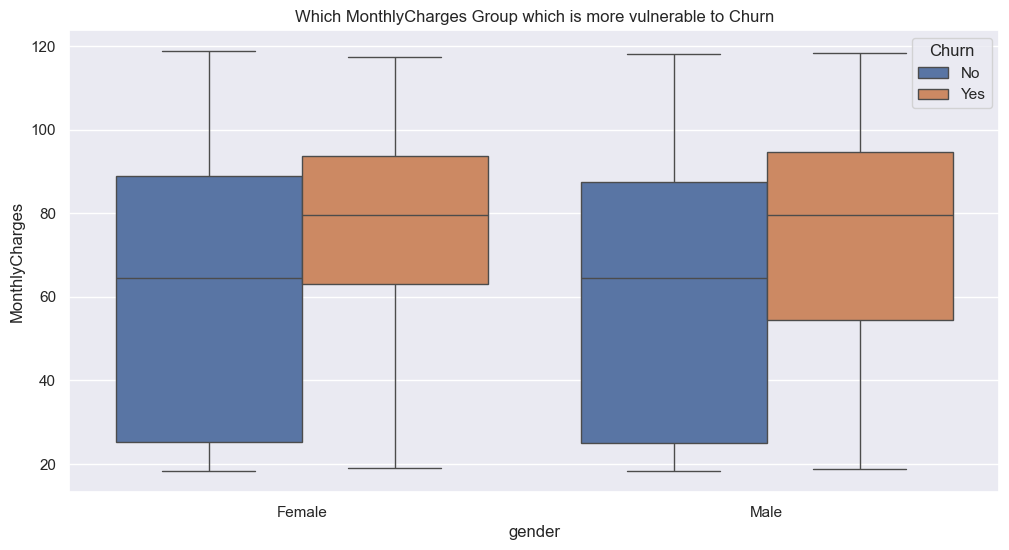

In [86]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data1['gender'], y = data1['MonthlyCharges'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("Which MonthlyCharges Group which is more vulnerable to Churn")
handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

In [87]:
# Hypothesis Test (z-test)
Hypothesisztest(data1["MonthlyCharges"][data1["Churn"]=="Yes"], data1["MonthlyCharges"][data1["Churn"]=="No"])



Yes_mean : 74.44133226324237
**************************************************
No_mean : 61.26512369540008
**************************************************
Yes_std : 24.666053259397433
**************************************************
No_std : 31.092648119345295
**************************************************
stats : 16.53673801593631
**************************************************
p_val : 1.9953885912944285e-61
We Reject Null Hypothesis i.e means of two groups not equal


In [88]:
# Hypothesis Test (z-test)

Hypothesisztest(x1=data1.query("Churn == 'Yes'")["MonthlyCharges"], x2=data1.query("Churn == 'No'")["MonthlyCharges"])

Yes_mean : 74.44133226324237
**************************************************
No_mean : 61.26512369540008
**************************************************
Yes_std : 24.666053259397433
**************************************************
No_std : 31.092648119345295
**************************************************
stats : 16.53673801593631
**************************************************
p_val : 1.9953885912944285e-61
We Reject Null Hypothesis i.e means of two groups not equal


In [89]:
# Hypothesis Test (t-test)

Hypothesisttest(data1["MonthlyCharges"][data1["Churn"]=="Yes"], data1["MonthlyCharges"][data1["Churn"]=="No"])

Yes_mean : 74.44133226324237
**************************************************
No_mean : 61.26512369540008
**************************************************
Yes_std : 24.666053259397433
**************************************************
No_std : 31.092648119345295
**************************************************
statics : 16.536738015936308
**************************************************
p_val : 2.7066456068884154e-60
We Reject Null Hypothesis i.e means of two groups not equal


In [90]:
# Hypothesis Test (t-test)

Hypothesisttest(x1=data1.query("Churn == 'Yes'")["MonthlyCharges"], x2=data1.query("Churn == 'No'")["MonthlyCharges"])

Yes_mean : 74.44133226324237
**************************************************
No_mean : 61.26512369540008
**************************************************
Yes_std : 24.666053259397433
**************************************************
No_std : 31.092648119345295
**************************************************
statics : 16.536738015936308
**************************************************
p_val : 2.7066456068884154e-60
We Reject Null Hypothesis i.e means of two groups not equal


## Visualizing Dependents

In [91]:
data1["Dependents"].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [92]:
data["Dependents"].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'Dependents ratio Proposanate')

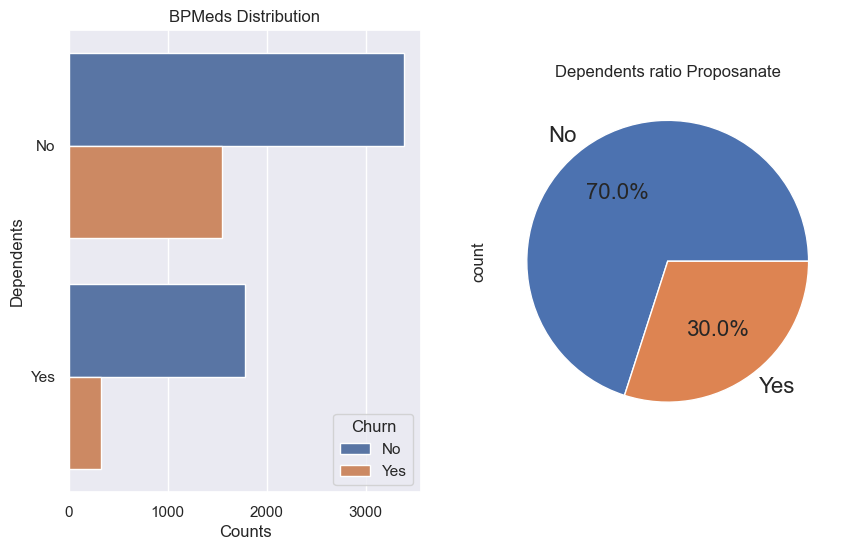

In [93]:
#  Distribution of "Dependents"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="Dependents", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('Dependents')
plt.title('BPMeds Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['Dependents'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('Dependents ratio Proposanate')



Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'Dependents ratio Proposanate')

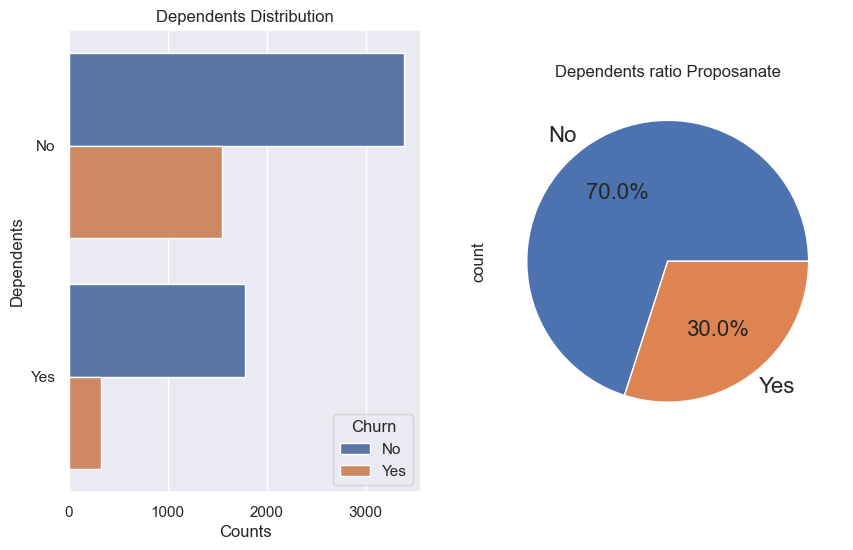

In [94]:
#  Distribution of "BPMeds"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="Dependents", hue="Churn", data=data)
plt.xlabel('Counts')
plt.ylabel('Dependents')
plt.title('Dependents Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data['Dependents'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('Dependents ratio Proposanate')



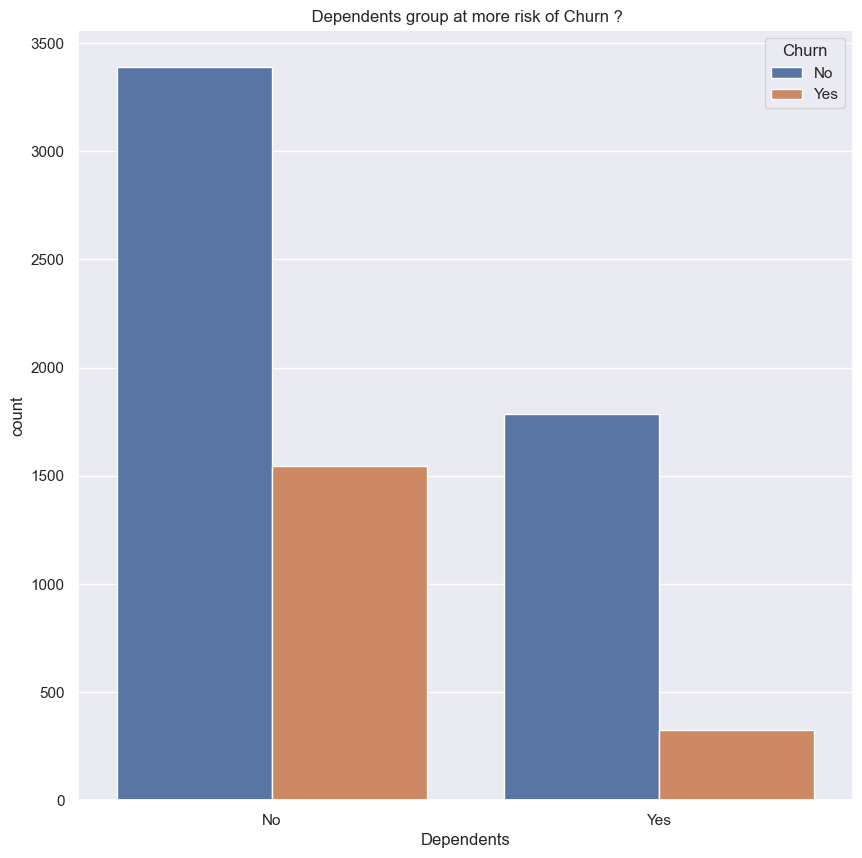

In [95]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = data1['Dependents'], hue = data1['Churn'], palette = sns.color_palette())
plt.title(" Dependents group at more risk of Churn ?")
# plt.legend(['No Risk','At Risk'])
plt.show()
     

Text(0.5, 1.0, 'Dependents group distribution with churn')

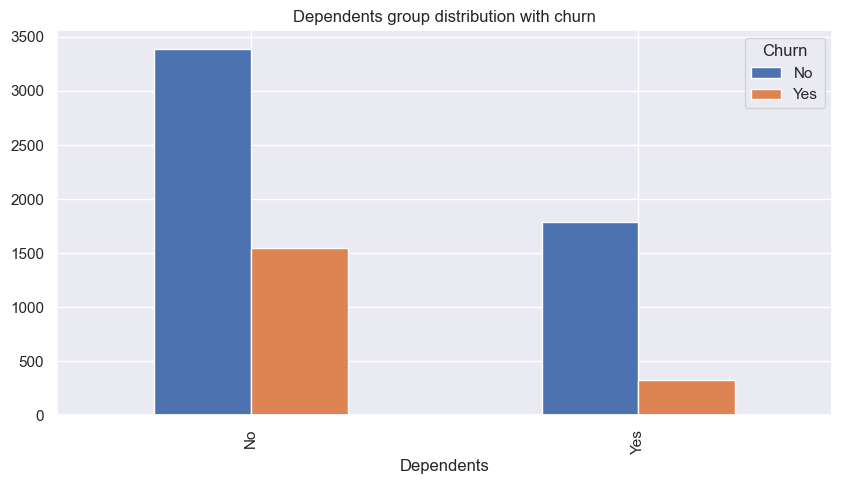

In [96]:
plt.rcParams['figure.figsize'] = (10, 5)
data1.groupby(['Dependents','Churn'])['id'].count().unstack().plot(kind='bar')
plt.title('Dependents group distribution with churn')

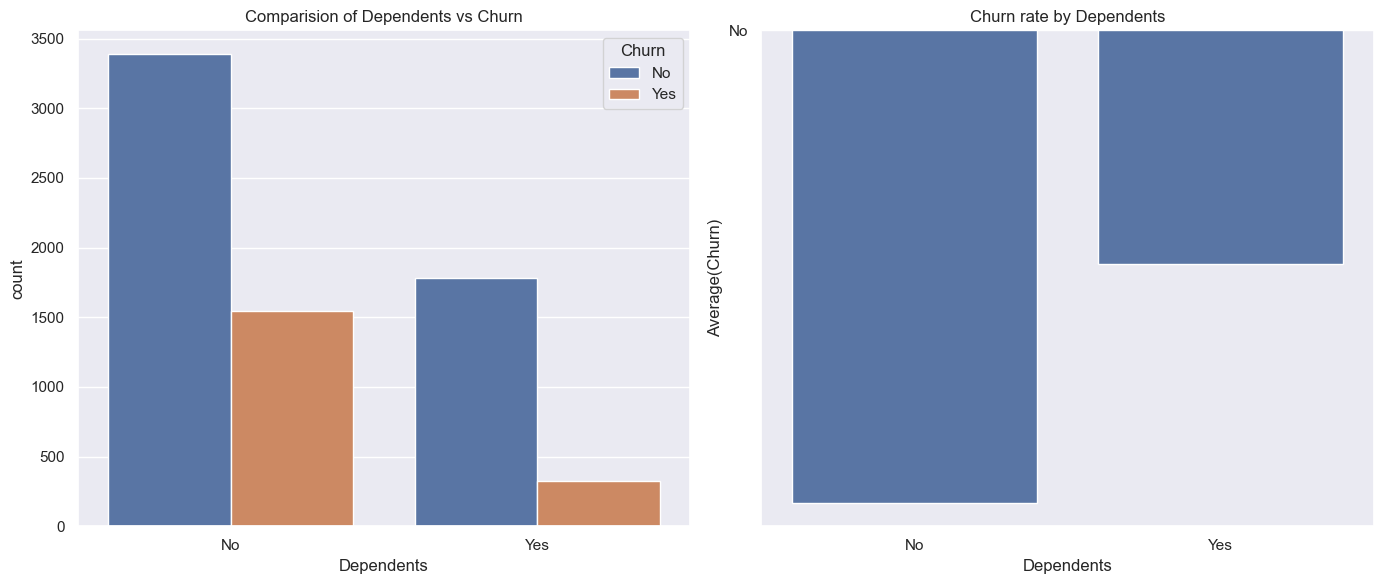

In [97]:

CategoricalVariables_targetPlots(data1,"Dependents")



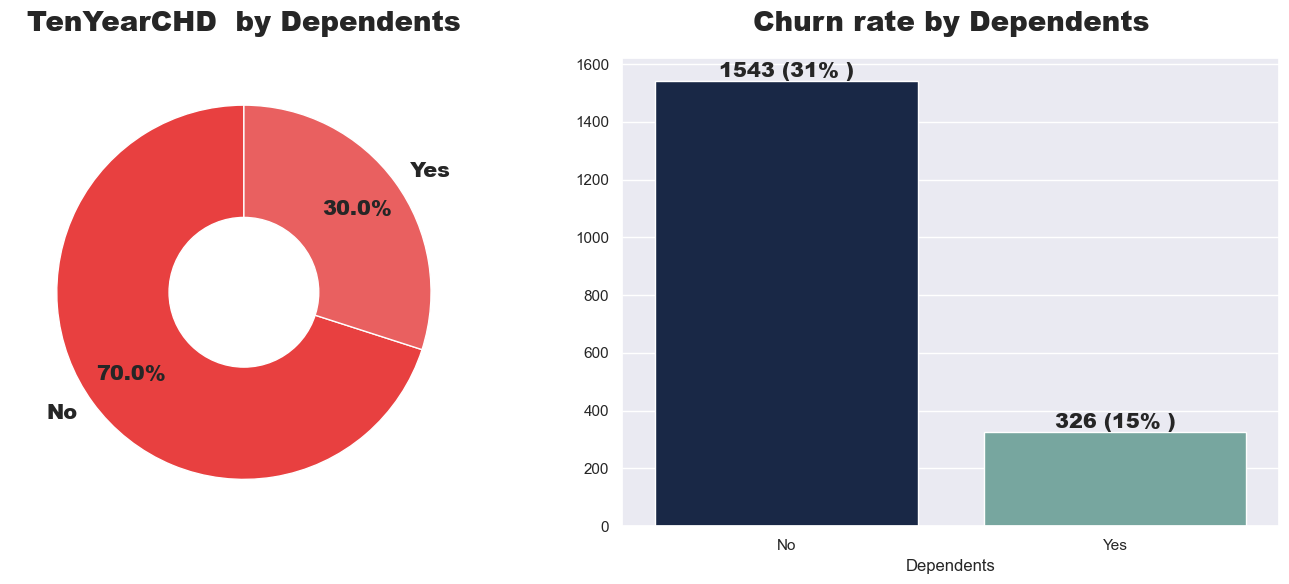

In [98]:

#Visualization to show Churn by Dependents.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["Dependents"].value_counts()
plt.title("TenYearCHD  by Dependents", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by Dependents.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=="Yes"]
value_2 = new_df["Dependents"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by Dependents",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




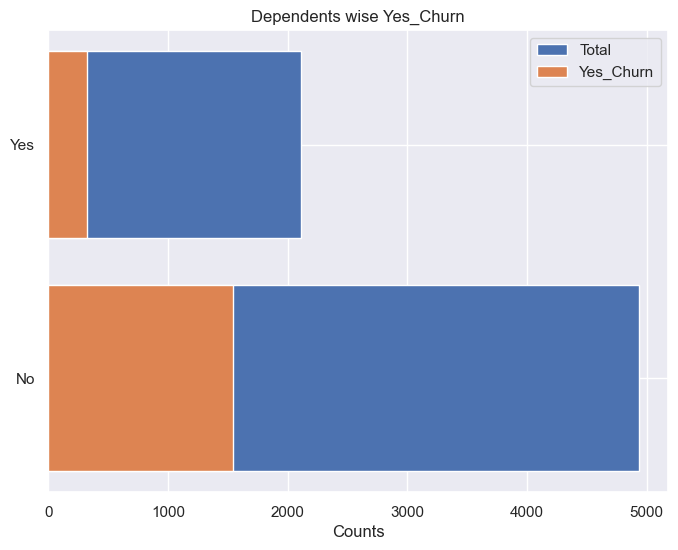

Dependents  Total_Count  % of Total  Yes_Churn  No_Churn  %Yes_Churn  \
0         No         4933   70.041176       1543      3390      31.279   
1        Yes         2110   29.958824        326      1784      15.450   

   %No_Churn  
0     68.721  
1     84.550

In [99]:
Univariate_Analysis1("Dependents")

Churn Dependents  count  count_norm
0    No         No   3390    0.687209
1    No        Yes   1784    0.845498
2   Yes         No   1543    0.312791
3   Yes        Yes    326    0.154502

<Axes: xlabel='Dependents'>

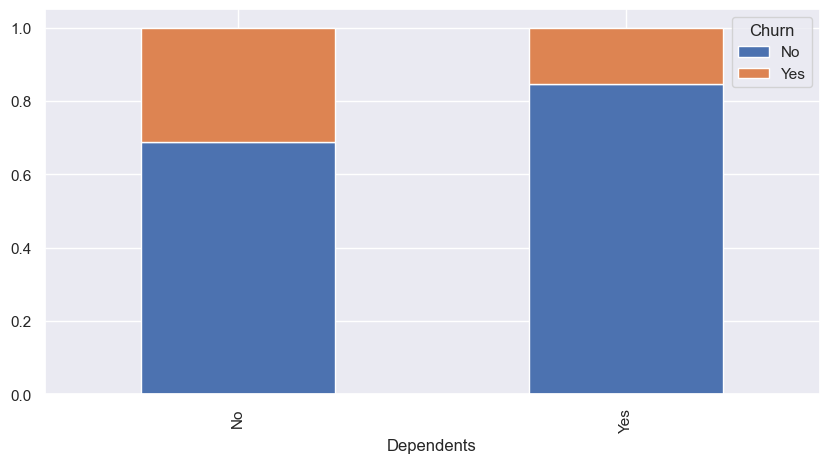

In [100]:
tmp = data1[["Churn", "Dependents"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "Dependents"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "Dependents==\""+row["Dependents"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="Dependents", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))


In [101]:

# Hypothesis testing on "BPMeds" column
stat, p_val, dof = chi_sqred_ind_test(data1, "Dependents", "Churn", 0.05)



Contigency table: 
 Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
Statistic: 189.12924940423474
P-value: 4.9249216612154196e-43
DOF: 1
probability=0.950, critical=3.841, stat=189.129
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [102]:

t = pd.crosstab(data1.Dependents, data1["Churn"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=189.12924940423474, pvalue=4.9249216612154196e-43, dof=1, expected_freq=array([[3623.93042737, 1309.06957263],
       [1550.06957263,  559.93042737]]))

## Visualizing PhoneService

In [103]:
data1["PhoneService"].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'PhoneService ratio Proposanate')

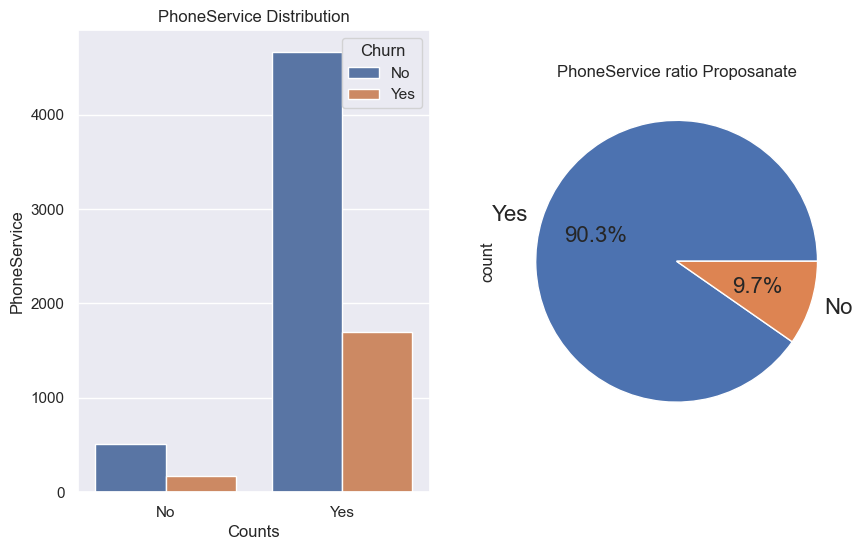

In [104]:
#  Distribution of "PhoneService"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="PhoneService", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('PhoneService')
plt.title('PhoneService Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['PhoneService'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('PhoneService ratio Proposanate')



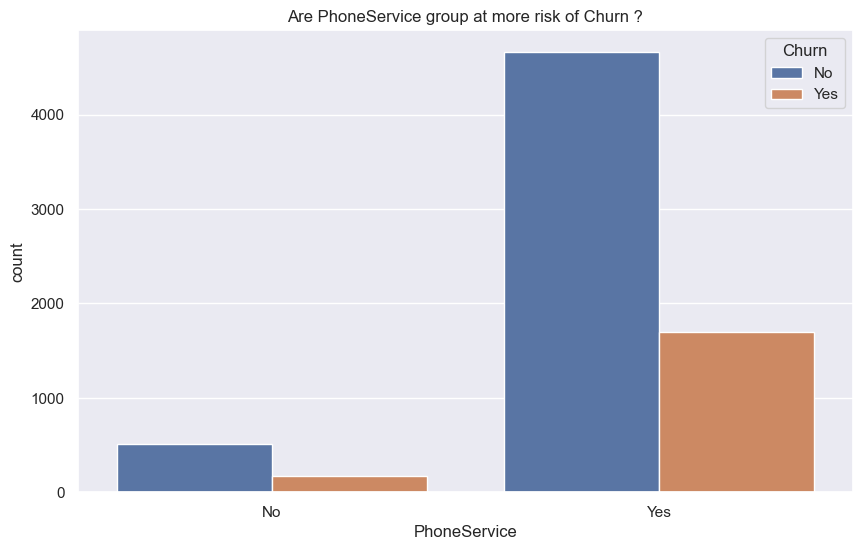

In [105]:

plt.figure(figsize = (10,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = data1['PhoneService'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("Are PhoneService group at more risk of Churn ?")
plt.show()

Text(0.5, 1.0, 'PhoneService group distribution with churn ')

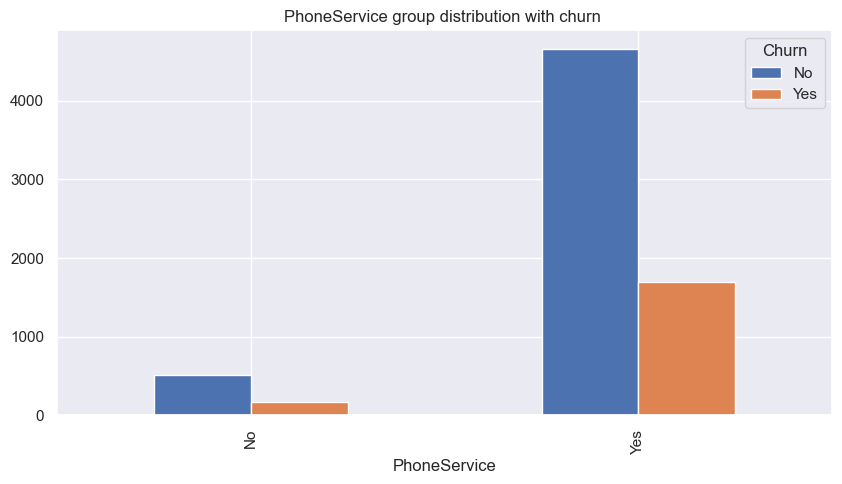

In [106]:
plt.rcParams['figure.figsize'] = (10, 5)
data1.groupby(['PhoneService','Churn'])['id'].count().unstack().plot(kind='bar')
plt.title('PhoneService group distribution with churn ')

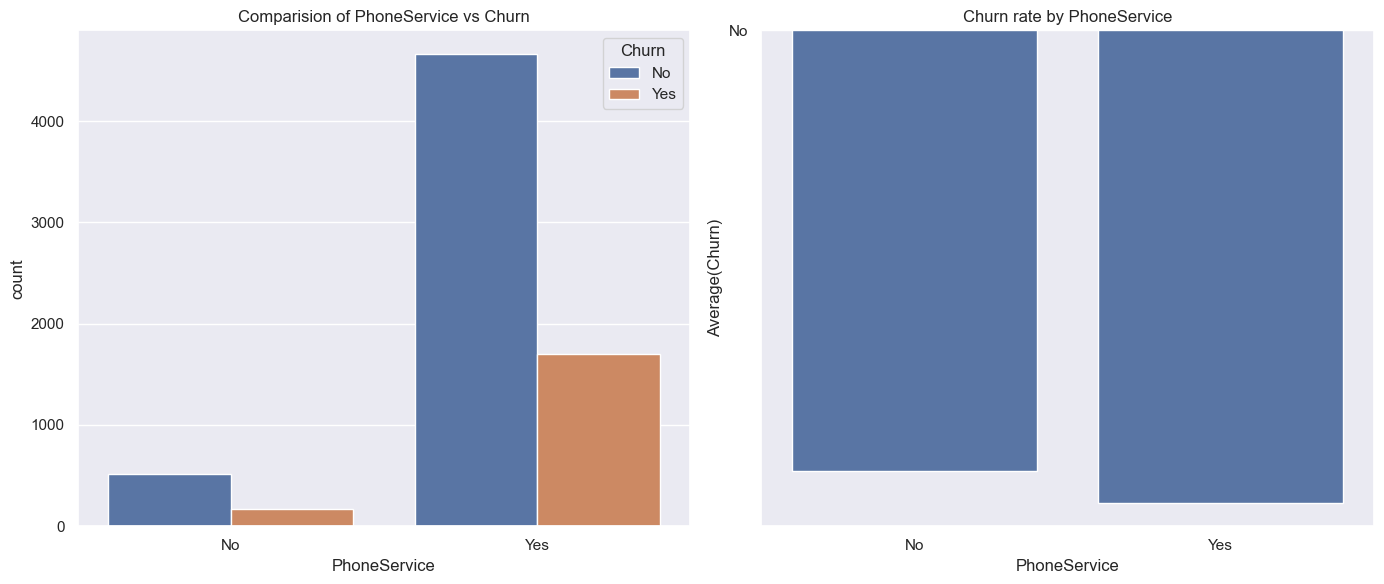

In [107]:
CategoricalVariables_targetPlots(data1,"PhoneService")

ValueError: cannot convert float NaN to integer

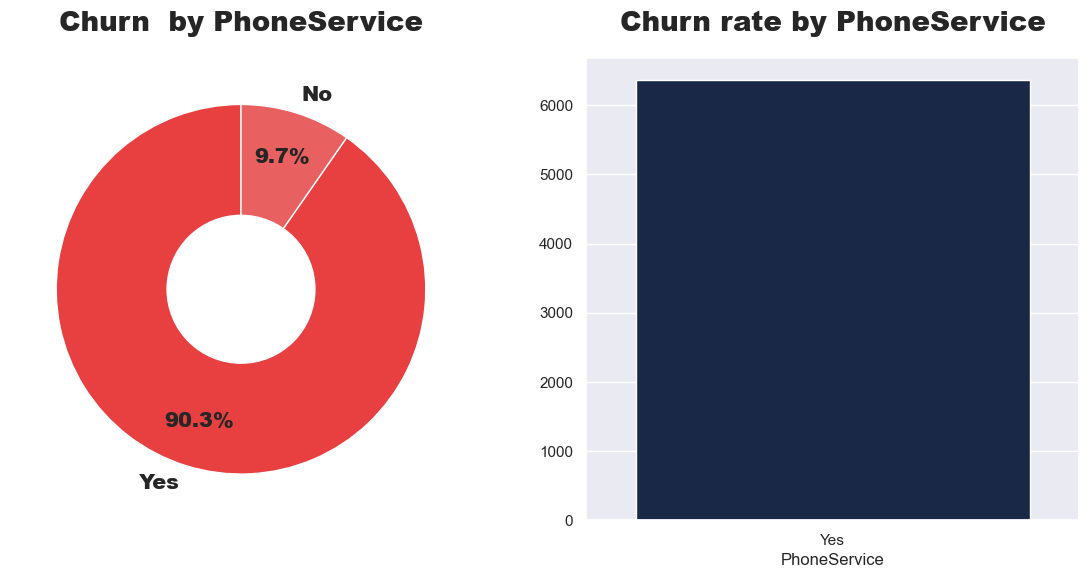

In [108]:
#Visualization to show TenYearCHD by PhoneService.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["PhoneService"].value_counts()
plt.title("Churn  by PhoneService", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by PhoneService.
plt.subplot(1,2,2)
new_df = data1[data1["PhoneService"]=="Yes"]
value_2 = new_df["PhoneService"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by PhoneService",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




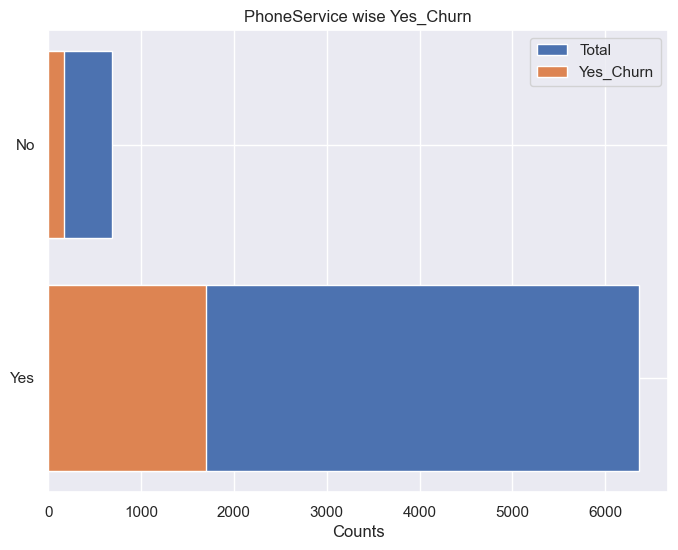

PhoneService  Total_Count  % of Total  Yes_Churn  No_Churn  %Yes_Churn  \
1          Yes         6361    9.683374       1699      4662      26.710   
0           No          682   90.316626        170       512      24.927   

   %No_Churn  
1     73.290  
0     75.073

In [109]:
Univariate_Analysis1("PhoneService")

Churn PhoneService  count  count_norm
0    No           No    512    0.750733
1    No          Yes   4662    0.732904
2   Yes           No    170    0.249267
3   Yes          Yes   1699    0.267096

<Axes: xlabel='PhoneService'>

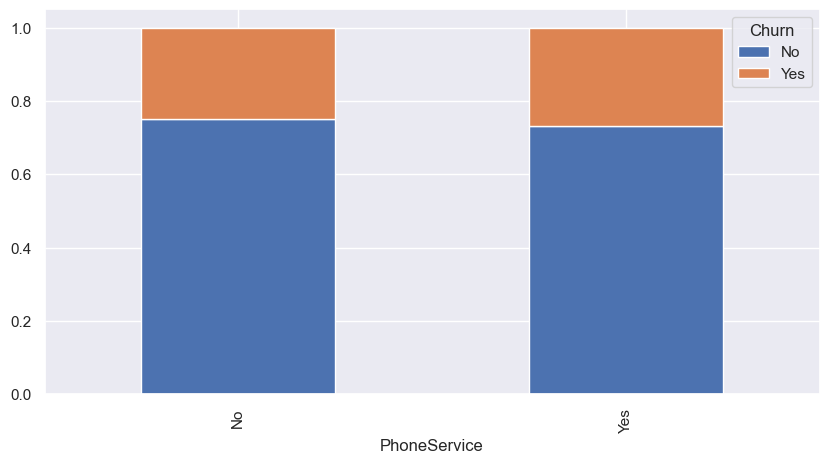

In [110]:
tmp = data1[["Churn", "PhoneService"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "PhoneService"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "PhoneService==\""+row["PhoneService"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="PhoneService", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))




In [111]:
# Hypothesis testing on "PhoneService" column
stat, p_val, dof = chi_sqred_ind_test(data1, "PhoneService", "Churn", 0.05)

Contigency table: 
 Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699
Statistic: 0.9150329892546948
P-value: 0.3387825358066928
DOF: 1
probability=0.950, critical=3.841, stat=0.915
Independent (fail to reject Null Hypothesis(H0))
Independent (fail to reject Null Hypothesis(H0))


In [112]:
t = pd.crosstab(data1.PhoneService, data1["Churn"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=0.9150329892546948, pvalue=0.3387825358066928, dof=1, expected_freq=array([[ 501.01774812,  180.98225188],
       [4672.98225188, 1688.01774812]]))

## Visualizing MultipleLines

In [113]:
data1["MultipleLines"].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'MultipleLines ratio Proposanate')

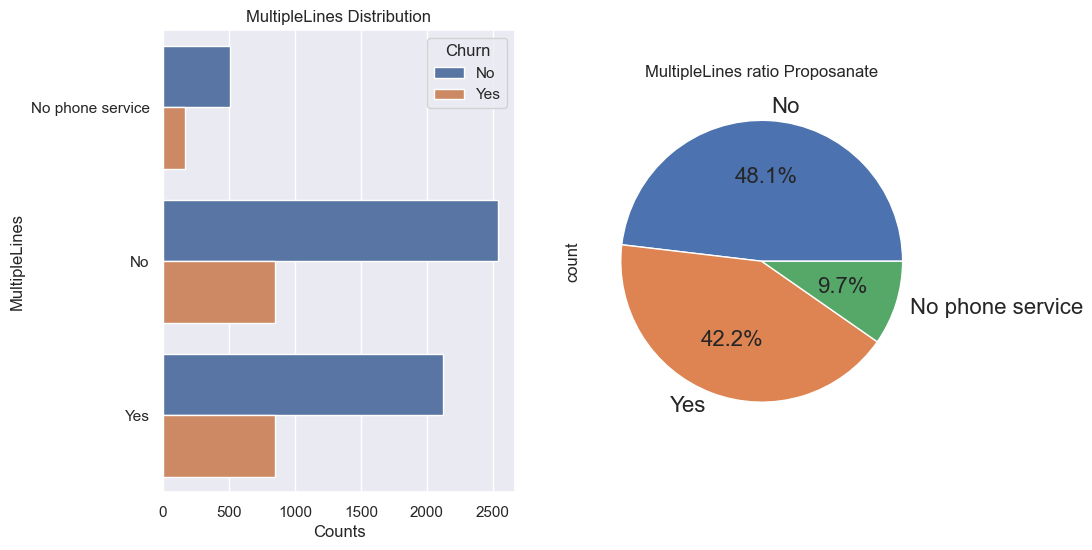

In [114]:
#  Distribution of "MultipleLines"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="MultipleLines", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('MultipleLines')
plt.title('MultipleLines Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['MultipleLines'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('MultipleLines ratio Proposanate')



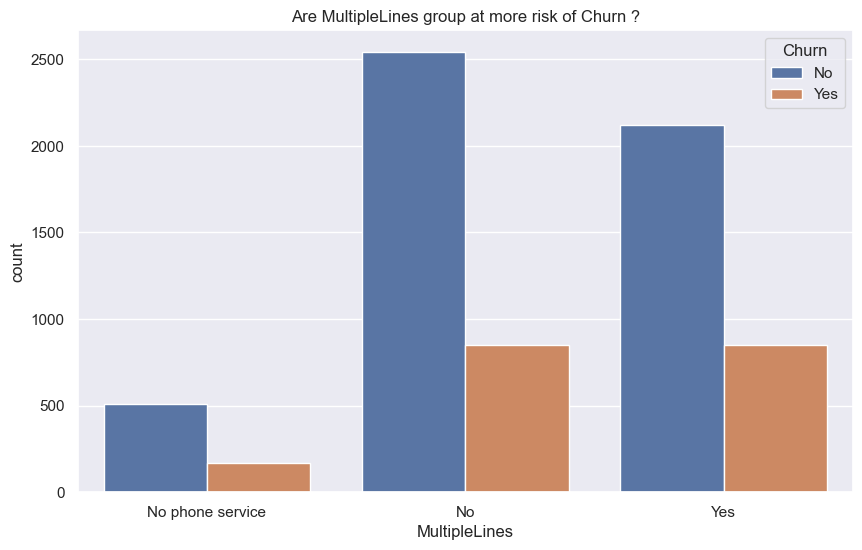

In [115]:
plt.figure(figsize = (10,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = data1['MultipleLines'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("Are MultipleLines group at more risk of Churn ?")
# plt.legend(['No Risk','At Risk'])
plt.show()

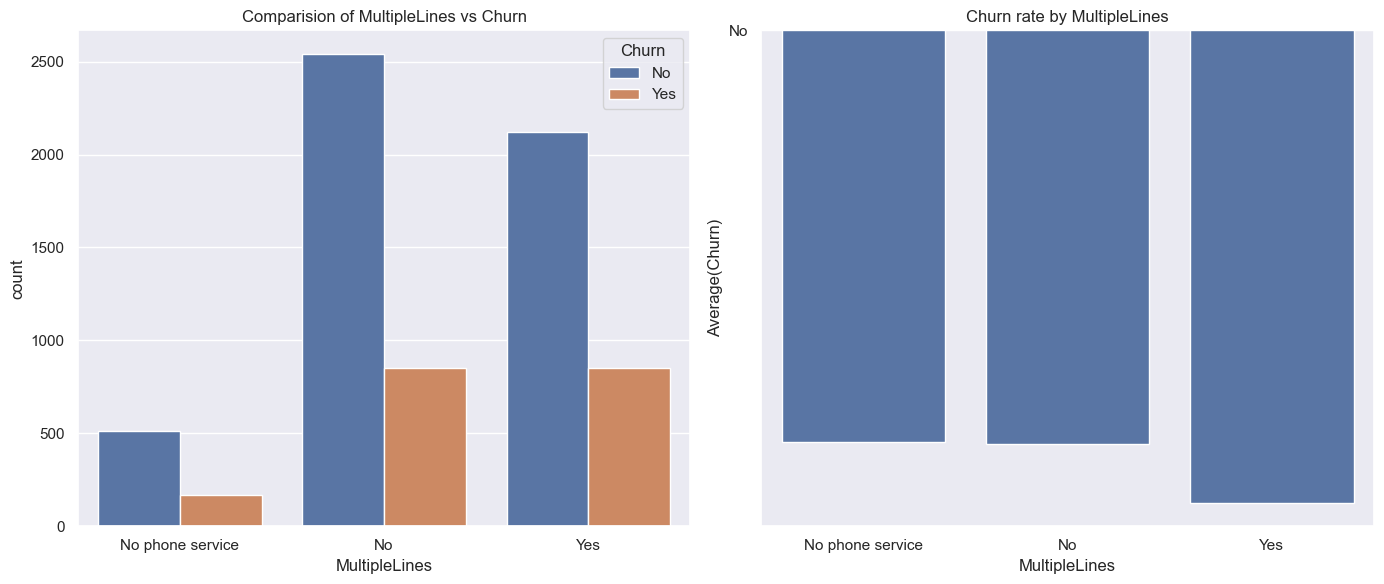

In [116]:
CategoricalVariables_targetPlots(data1,"MultipleLines")

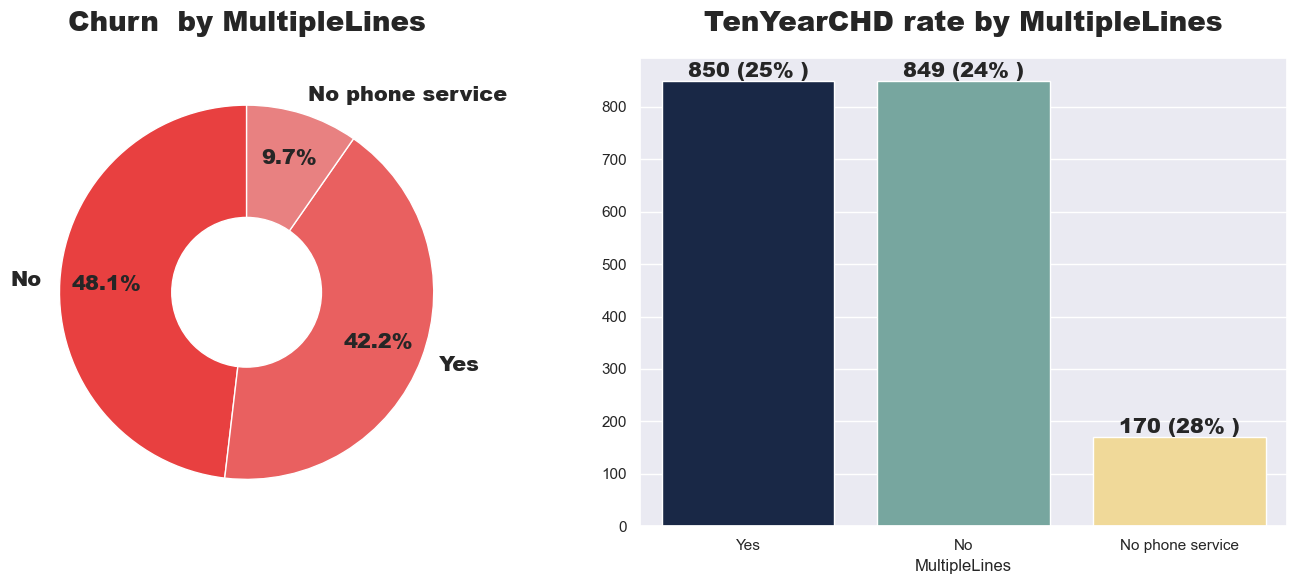

In [117]:
#Visualization to show Churn by MultipleLines.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["MultipleLines"].value_counts()
plt.title("Churn  by MultipleLines", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by MultipleLines.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["MultipleLines"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by MultipleLines",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




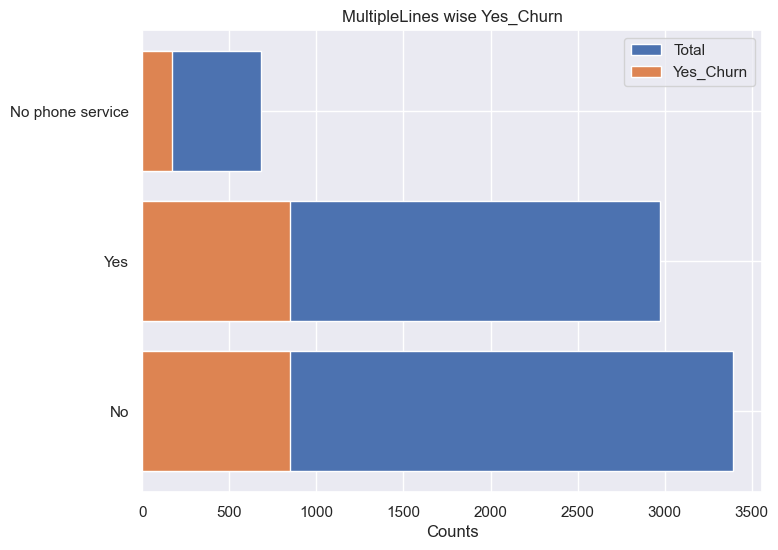

MultipleLines  Total_Count  % of Total  Yes_Churn  No_Churn  %Yes_Churn  \
0                No         3390   48.132898        849      2541      25.044   
2               Yes         2971    9.683374        850      2121      28.610   
1  No phone service          682   42.183729        170       512      24.927   

   %No_Churn  
0     74.956  
2     71.390  
1     75.073

In [118]:
Univariate_Analysis1("MultipleLines")

Churn     MultipleLines  count  count_norm
0    No                No   2541    0.749558
1    No  No phone service    512    0.750733
2    No               Yes   2121    0.713901
3   Yes                No    849    0.250442
4   Yes  No phone service    170    0.249267
5   Yes               Yes    850    0.286099

<Axes: xlabel='MultipleLines'>

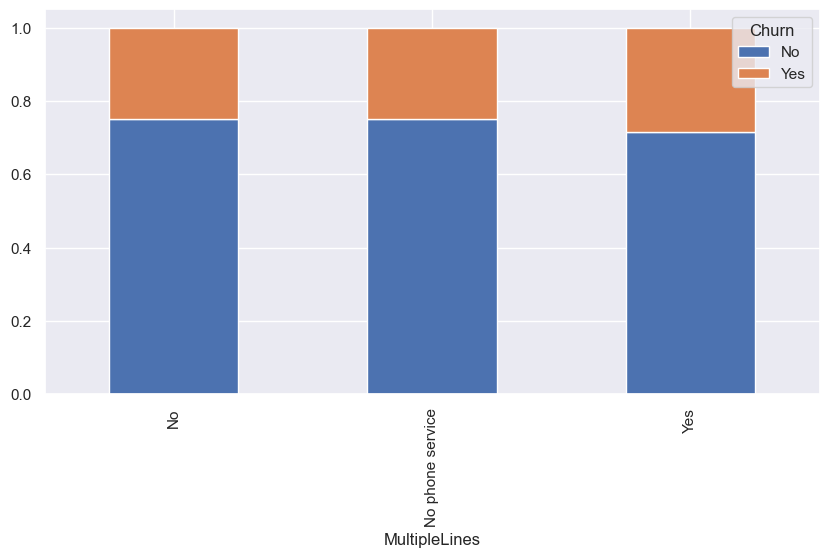

In [119]:
tmp = data1[["Churn", "MultipleLines"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "MultipleLines"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "MultipleLines==\""+row["MultipleLines"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="MultipleLines", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))


In [120]:
# Hypothesis testing on "BPMeds" column
stat, p_val, dof = chi_sqred_ind_test(data1, "MultipleLines", "Churn", 0.05)

Contigency table: 
 Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850
Statistic: 11.33044148319756
P-value: 0.0034643829548773
DOF: 2
probability=0.950, critical=5.991, stat=11.330
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [121]:
t = pd.crosstab(data1.MultipleLines, data1["Churn"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=11.33044148319756, pvalue=0.0034643829548773, dof=2, expected_freq=array([[2490.39613801,  899.60386199],
       [ 501.01774812,  180.98225188],
       [2182.58611387,  788.41388613]]))

## Visualizing InternetService

In [122]:
data1["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'InternetService ratio Proposanate')

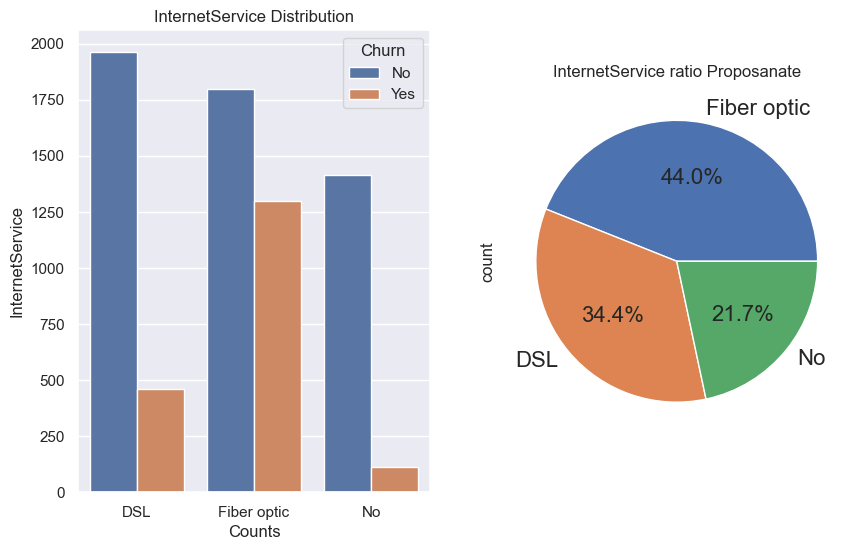

In [123]:
#  Distribution of "InternetService"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="InternetService", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('InternetService')
plt.title('InternetService Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['InternetService'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('InternetService ratio Proposanate')



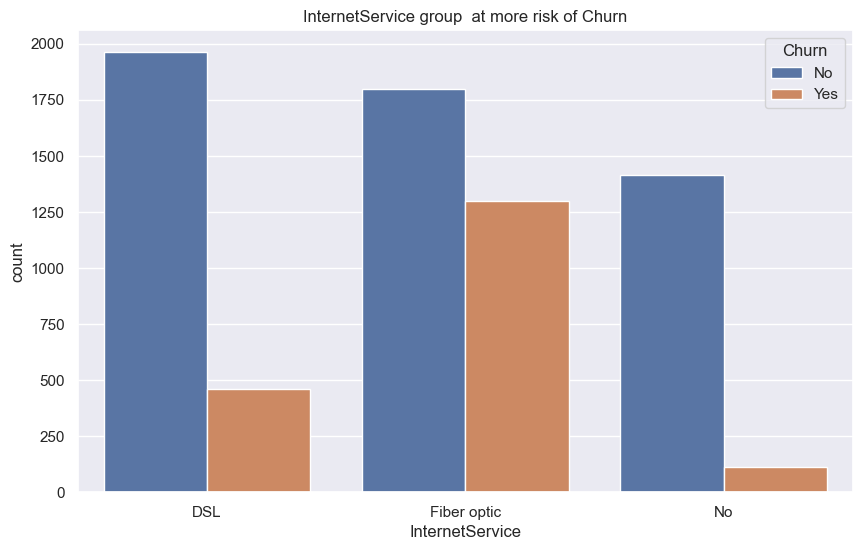

In [124]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['InternetService'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("InternetService group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()

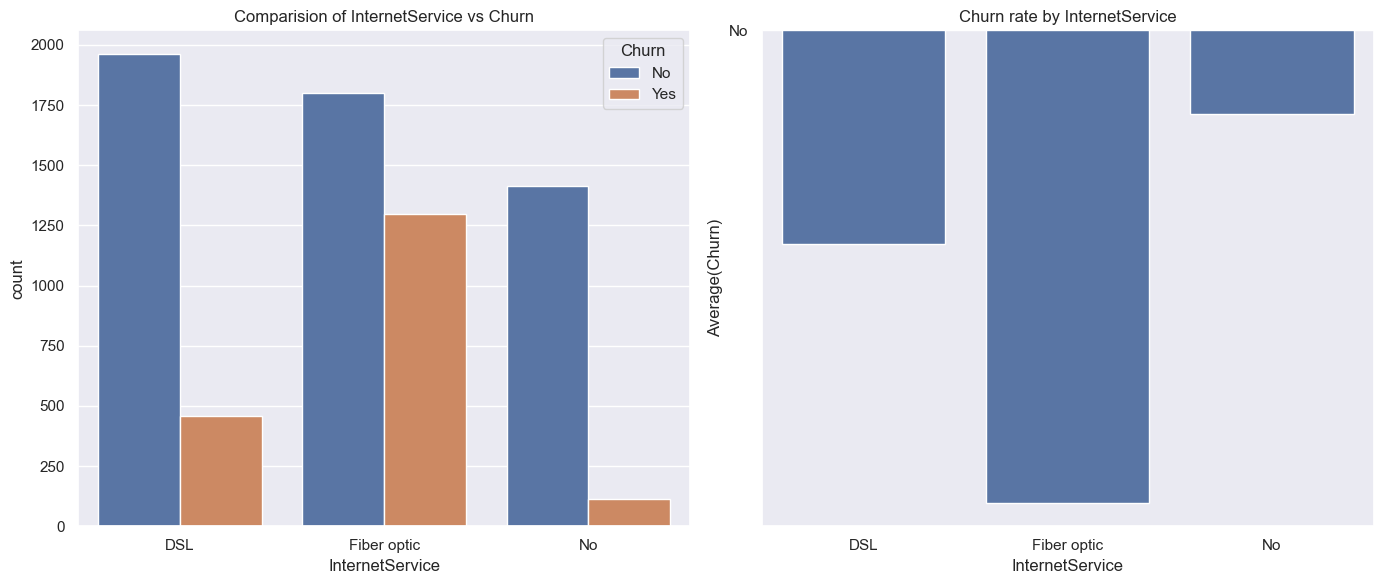

In [125]:
CategoricalVariables_targetPlots(data1,"InternetService")

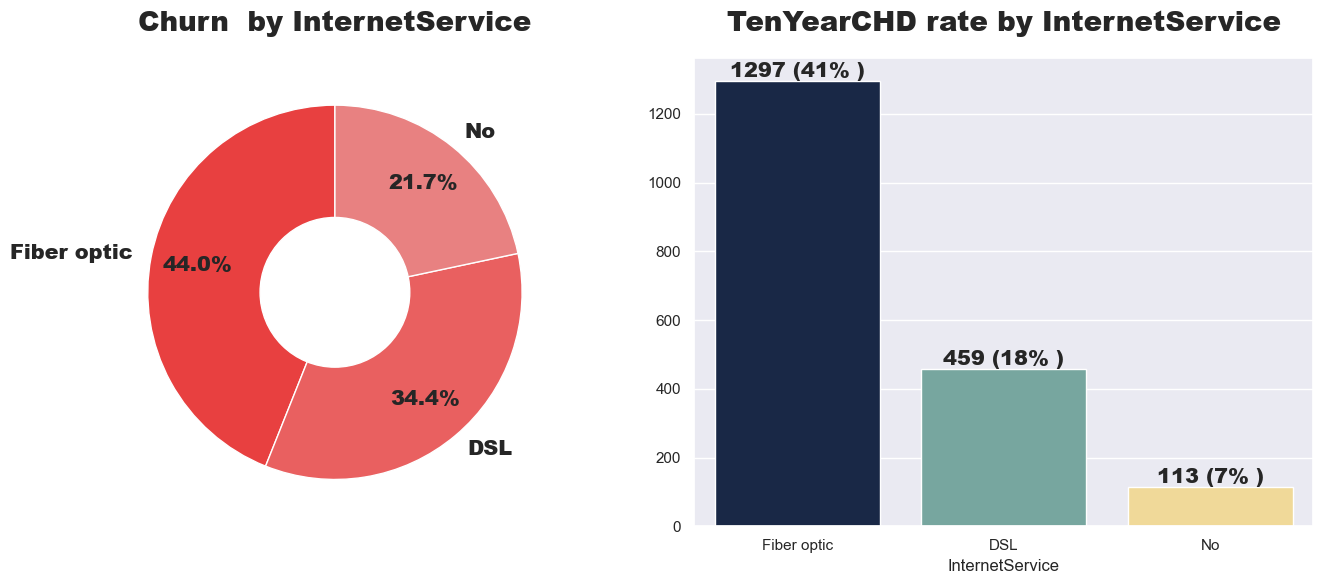

In [126]:
#Visualization to show Churn by InternetService.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["InternetService"].value_counts()
plt.title("Churn  by InternetService", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by InternetService.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["InternetService"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by InternetService",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




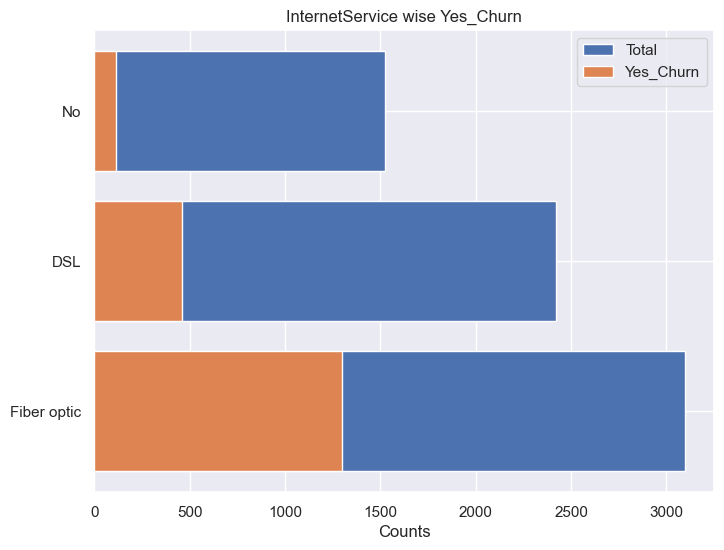

InternetService  Total_Count  % of Total  Yes_Churn  No_Churn  %Yes_Churn  \
1     Fiber optic         3096   34.374556       1297      1799      41.893   
0             DSL         2421   43.958540        459      1962      18.959   
2              No         1526   21.666903        113      1413       7.405   

   %No_Churn  
1     58.107  
0     81.041  
2     92.595

In [127]:
Univariate_Analysis1("InternetService")

Churn InternetService  count  count_norm
0    No             DSL   1962    0.810409
1    No     Fiber optic   1799    0.581072
2    No              No   1413    0.925950
3   Yes             DSL    459    0.189591
4   Yes     Fiber optic   1297    0.418928
5   Yes              No    113    0.074050

<Axes: xlabel='InternetService'>

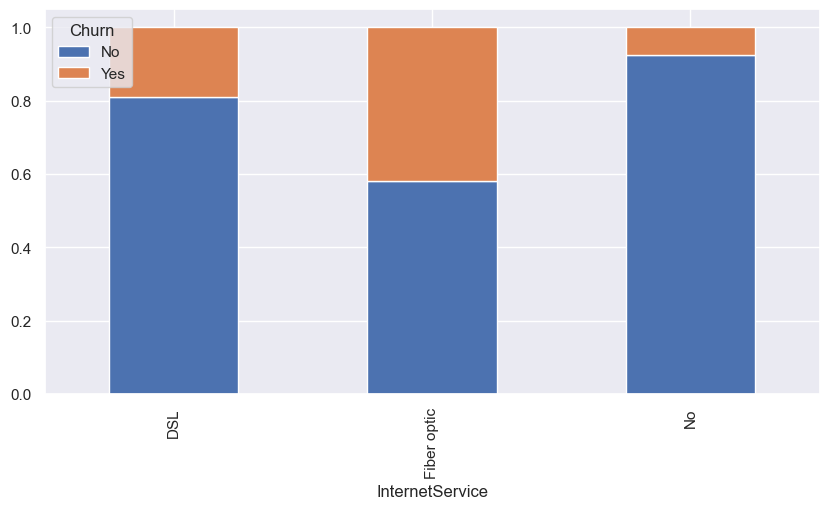

In [128]:
tmp = data1[["Churn", "InternetService"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "InternetService"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "InternetService==\""+row["InternetService"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="InternetService", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))




In [129]:
# Hypothesis testing on "Churn" column
stat, p_val, dof = chi_sqred_ind_test(data1, "InternetService", "Churn", 0.05)

Contigency table: 
 Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113
Statistic: 732.309589667794
P-value: 9.571788222840544e-160
DOF: 2
probability=0.950, critical=5.991, stat=732.310
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [130]:
t = pd.crosstab(data1.InternetService, data1["Churn"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=732.309589667794, pvalue=9.571788222840544e-160, dof=2, expected_freq=array([[1778.53954281,  642.46045719],
       [2274.41488002,  821.58511998],
       [1121.04557717,  404.95442283]]))

## Visualizing TotalCharges

In [131]:
data1["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [132]:
data1["TotalCharges"].nunique()

6531

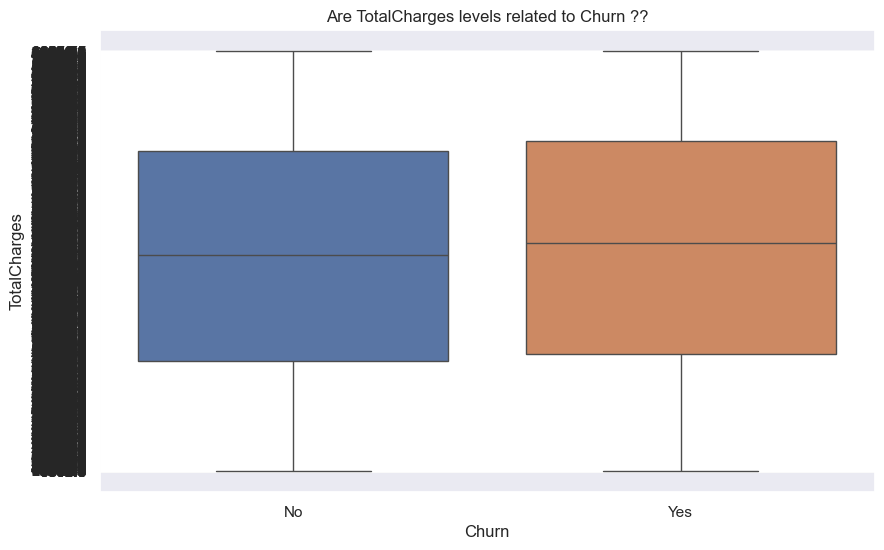

In [133]:
plt.figure(figsize = (10,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.boxplot(x=data1['Churn'], y=data1['TotalCharges'], palette = sns.color_palette())
plt.title("Are TotalCharges levels related to Churn ??")
plt.show()

Text(0.5, 1.0, 'TotalCharges Distrubution')

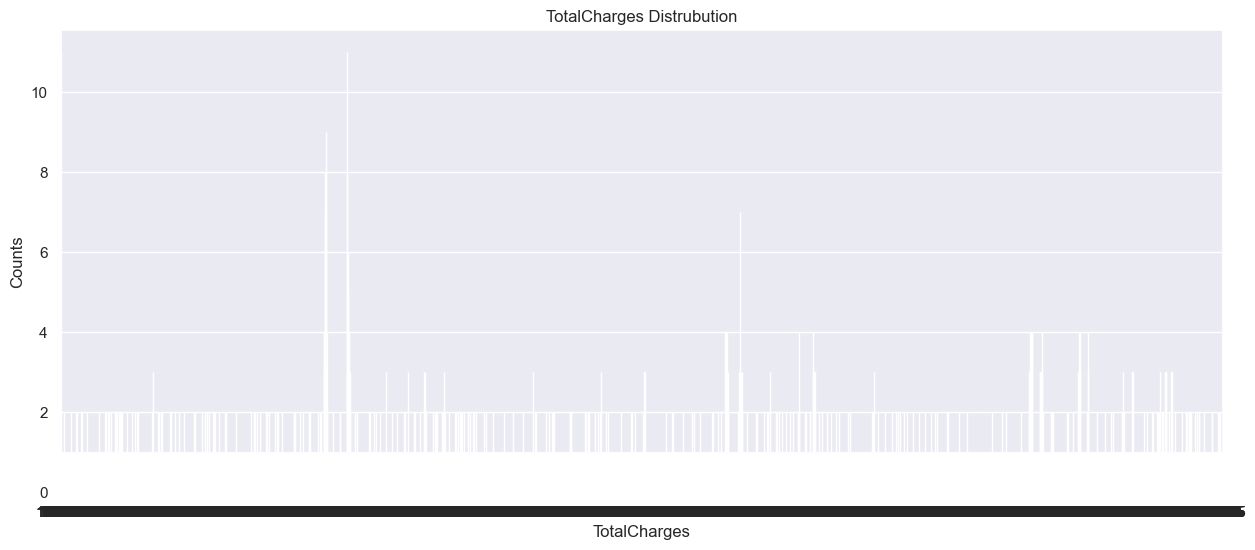

In [134]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['TotalCharges'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('TotalCharges Distrubution')

<Axes: xlabel='TotalCharges', ylabel='count'>

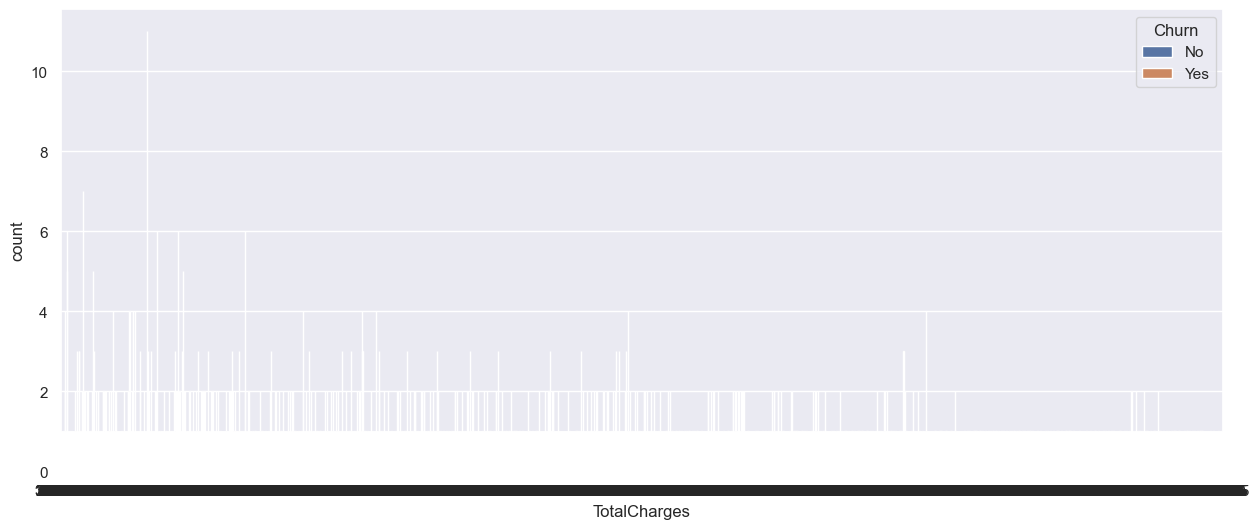

In [135]:
plt.figure(figsize=(15,6))
sns.countplot(x="TotalCharges", hue="Churn", data=data)

ValueError: could not convert string to float: ' '

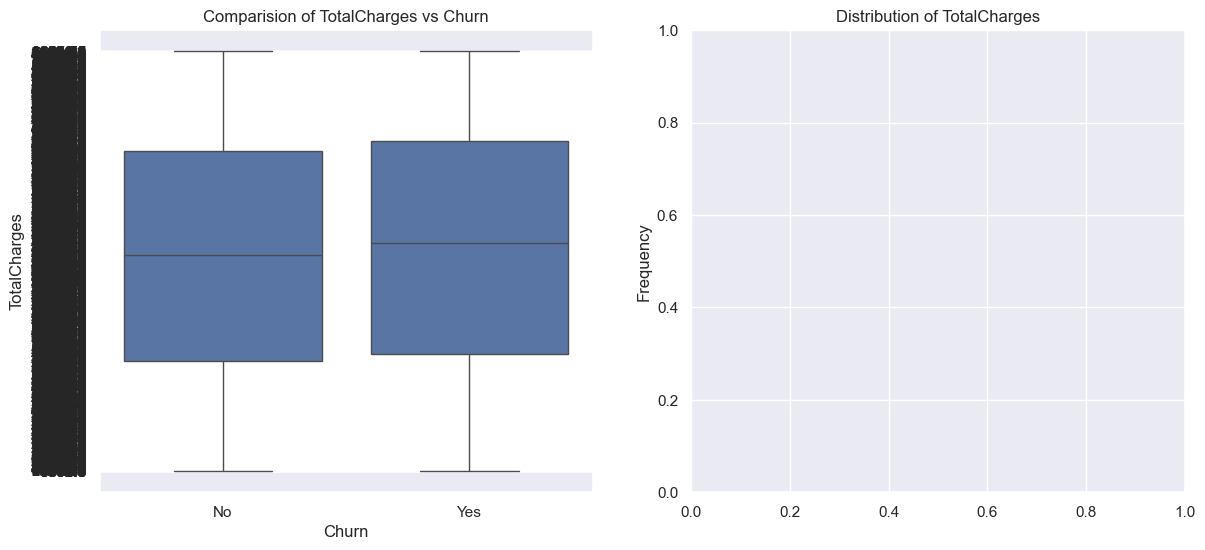

In [136]:
NumericalVariables_targetPlots(data1,segment_by="TotalCharges")

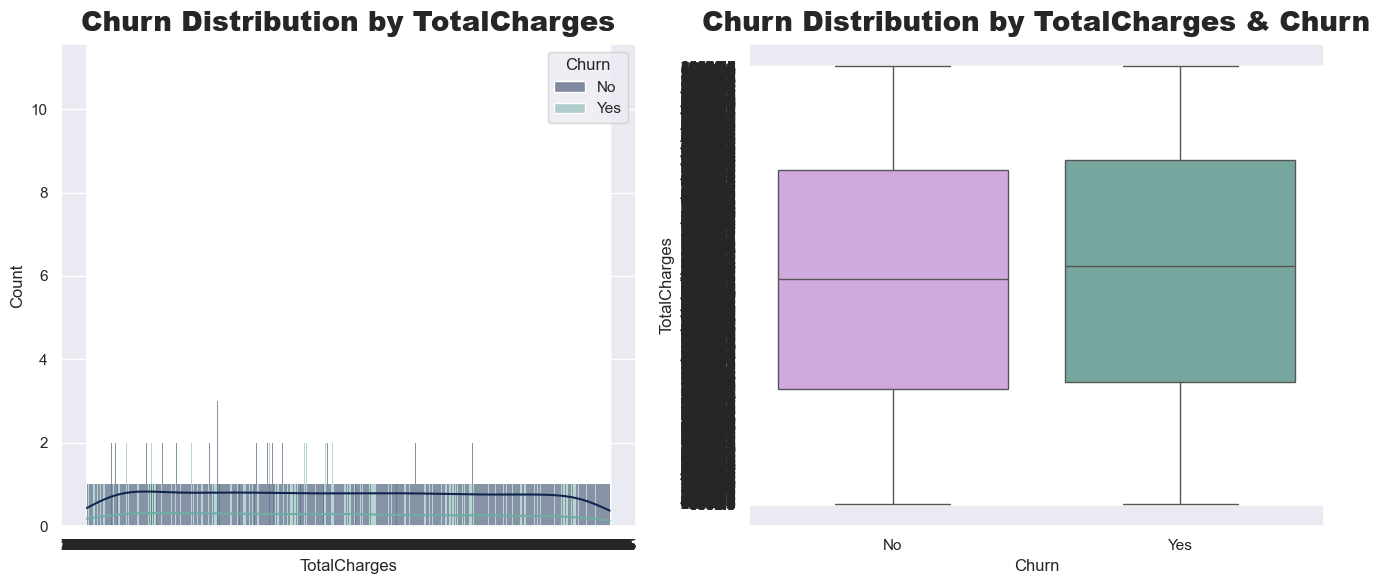

In [137]:
#Visualization to show Churn Distribution by TotalCharges.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="TotalCharges",hue="Churn",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("Churn Distribution by TotalCharges",fontweight="black",size=20,pad=10)


#Visualization to show Churn Distribution by TotalCharges & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="Churn",y="TotalCharges",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("Churn Distribution by TotalCharges & Churn",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

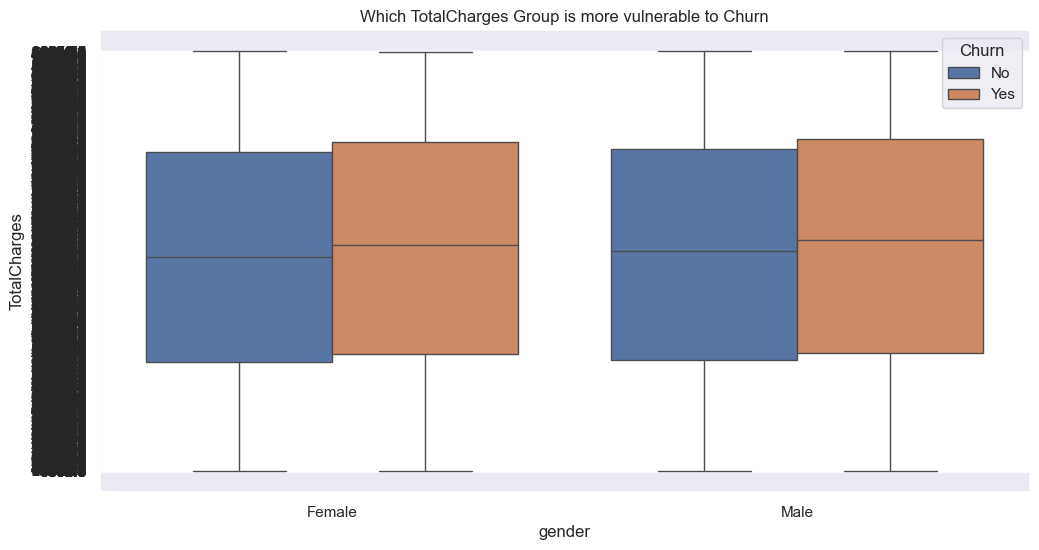

In [138]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data1['gender'], y = data1['TotalCharges'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("Which TotalCharges Group is more vulnerable to Churn")
handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

<Axes: xlabel='TotalCharges'>

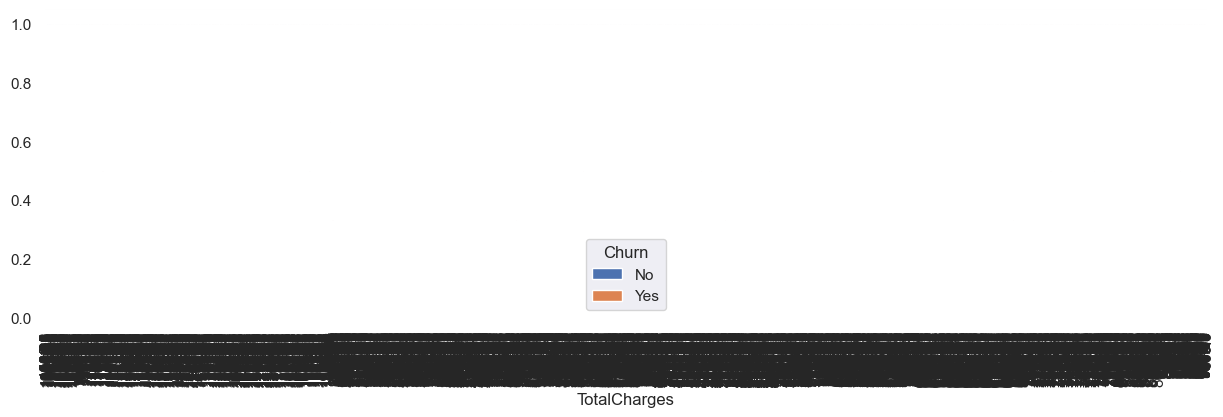

In [148]:
tmp = data1[["Churn", "TotalCharges"]]
tmp["TotalCharges"] = tmp["TotalCharges"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "TotalCharges"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "TotalCharges==\""+row["TotalCharges"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="Churn", index="TotalCharges", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))

## Visualizing OnlineSecurity

In [151]:
data1["InternetService"].value_counts()


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'OnlineSecurity ratio Proposanate')

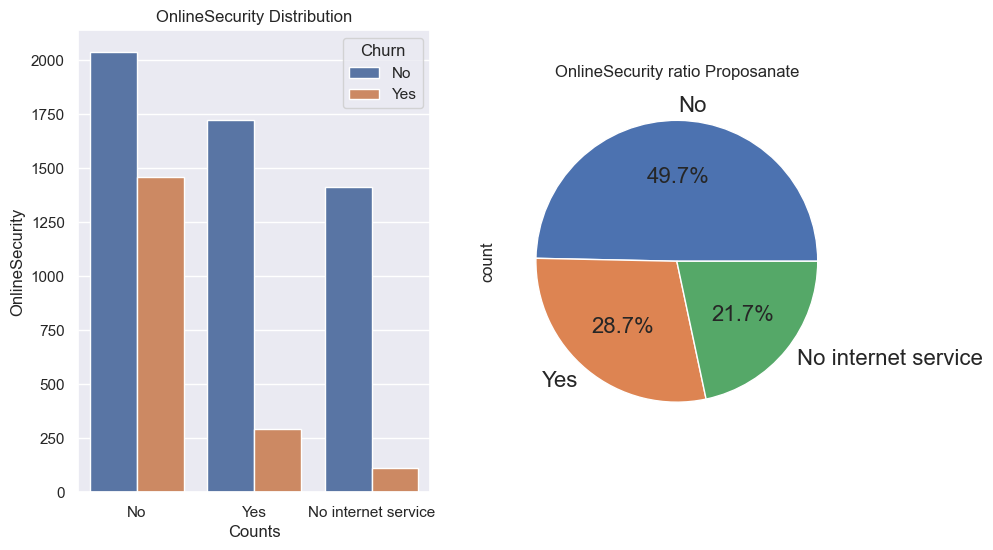

In [152]:
#  Distribution of "InternetService"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="OnlineSecurity", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('OnlineSecurity')
plt.title('OnlineSecurity Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['OnlineSecurity'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('OnlineSecurity ratio Proposanate')

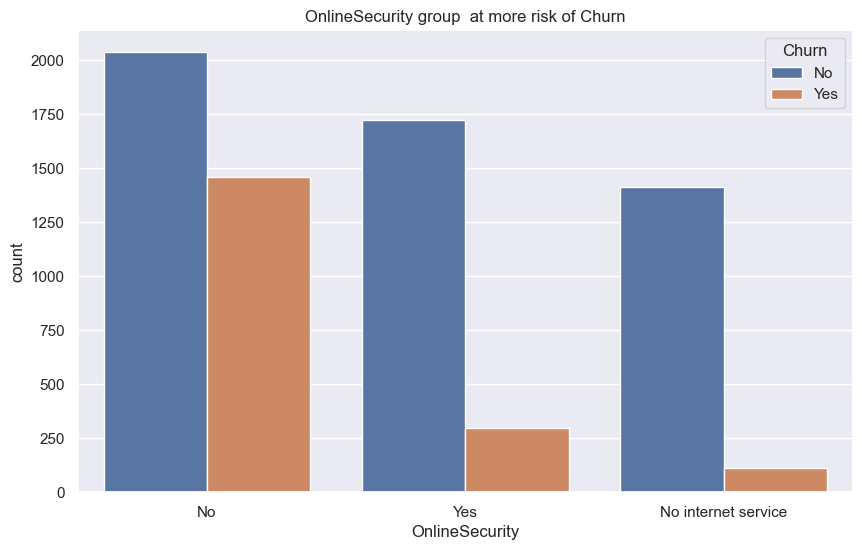

In [153]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['OnlineSecurity'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("OnlineSecurity group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()

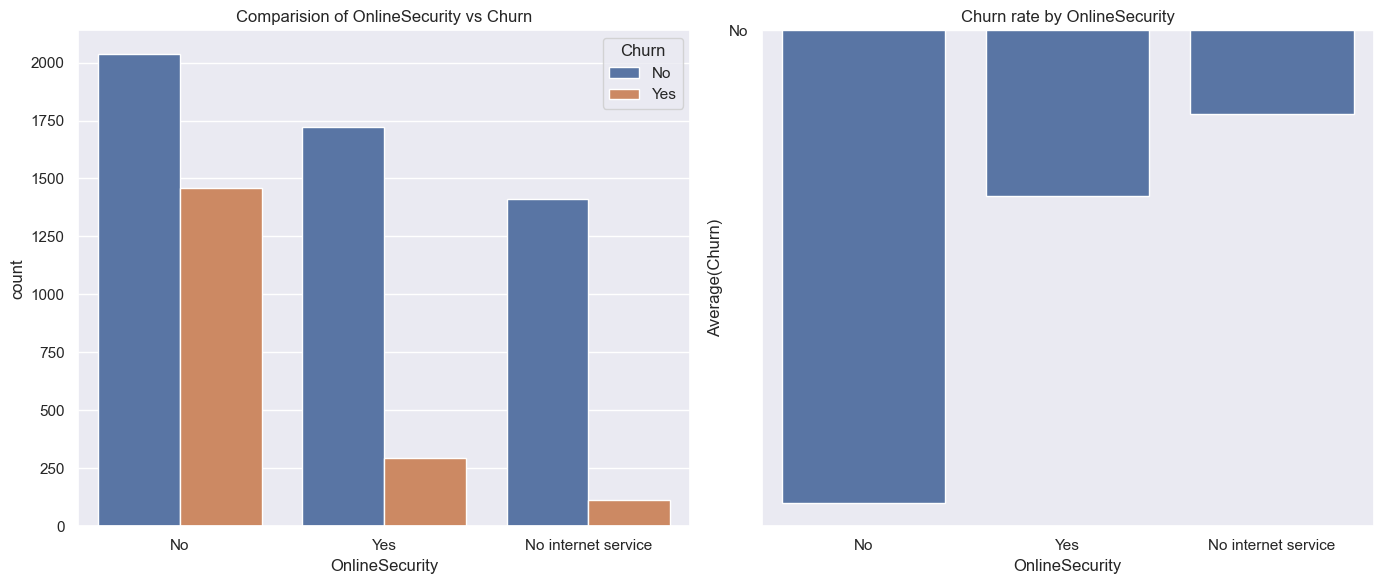

In [154]:
CategoricalVariables_targetPlots(data1,"OnlineSecurity")


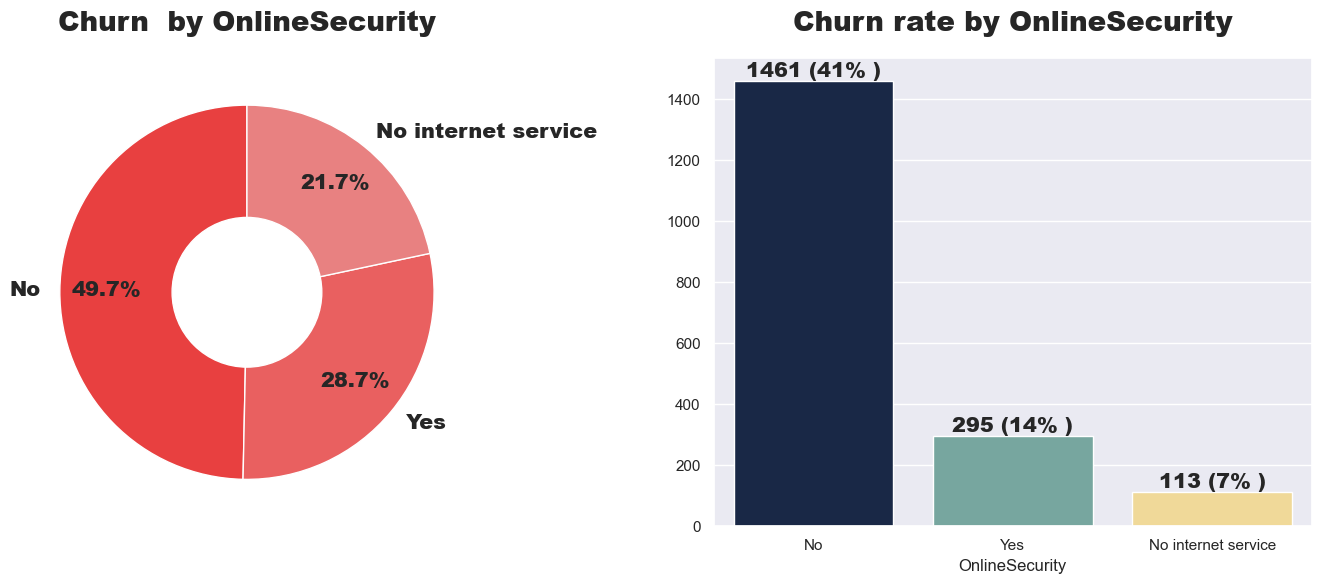

In [155]:
#Visualization to show Churn by InternetService.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["OnlineSecurity"].value_counts()
plt.title("Churn  by OnlineSecurity", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by OnlineSecurity.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["OnlineSecurity"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by OnlineSecurity",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

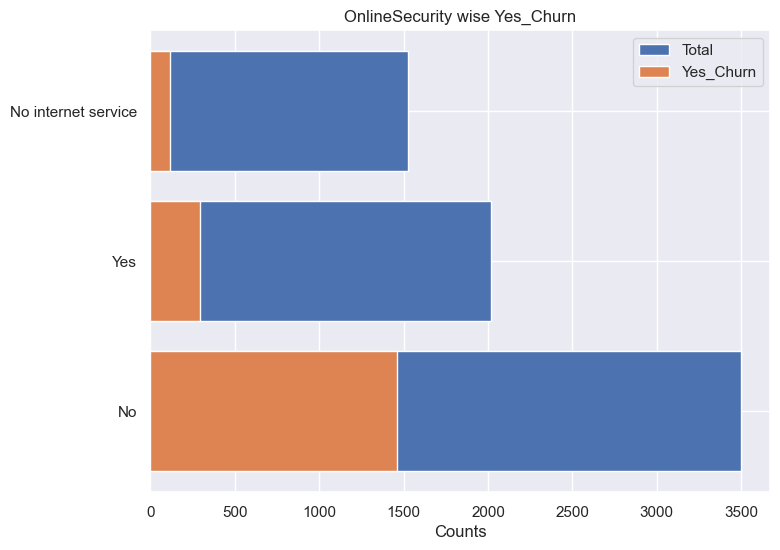

OnlineSecurity  Total_Count  % of Total  Yes_Churn  No_Churn  \
0                   No         3498   49.666335       1461      2037   
2                  Yes         2019   21.666903        295      1724   
1  No internet service         1526   28.666761        113      1413   

   %Yes_Churn  %No_Churn  
0      41.767     58.233  
2      14.611     85.389  
1       7.405     92.595

In [156]:
Univariate_Analysis1("OnlineSecurity")


Churn       OnlineSecurity  count  count_norm
0    No                   No   2037    0.582333
1    No  No internet service   1413    0.925950
2    No                  Yes   1724    0.853888
3   Yes                   No   1461    0.417667
4   Yes  No internet service    113    0.074050
5   Yes                  Yes    295    0.146112

<Axes: xlabel='OnlineSecurity'>

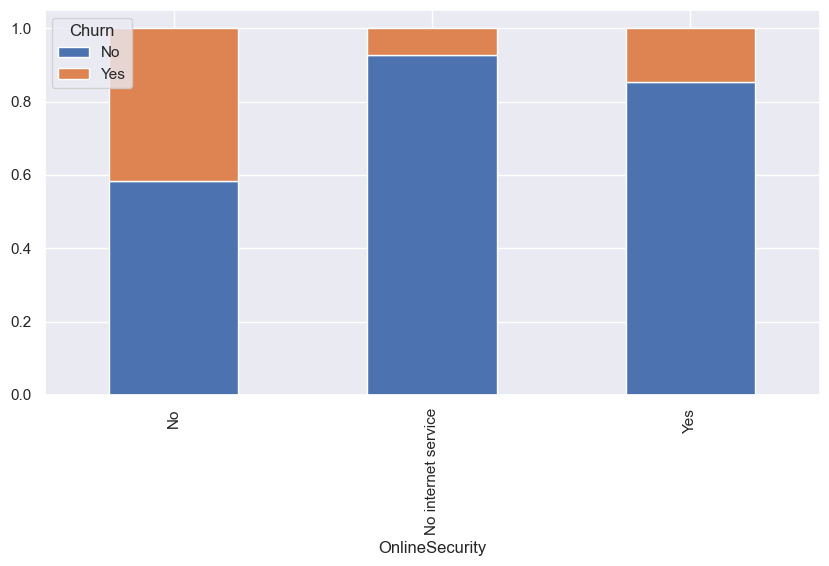

In [157]:
tmp = data1[["Churn", "OnlineSecurity"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "OnlineSecurity"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "OnlineSecurity==\""+row["OnlineSecurity"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="OnlineSecurity", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))


In [158]:
# Hypothesis testing on "Churn" column
stat, p_val, dof = chi_sqred_ind_test(data1, "OnlineSecurity", "Churn", 0.05)

Contigency table: 
 Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295
Statistic: 849.9989679615965
P-value: 2.6611496351765517e-185
DOF: 2
probability=0.950, critical=5.991, stat=849.999
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing OnlineBackup

In [165]:
data1["OnlineBackup"].value_counts()


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'OnlineBackup ratio Proposanate')

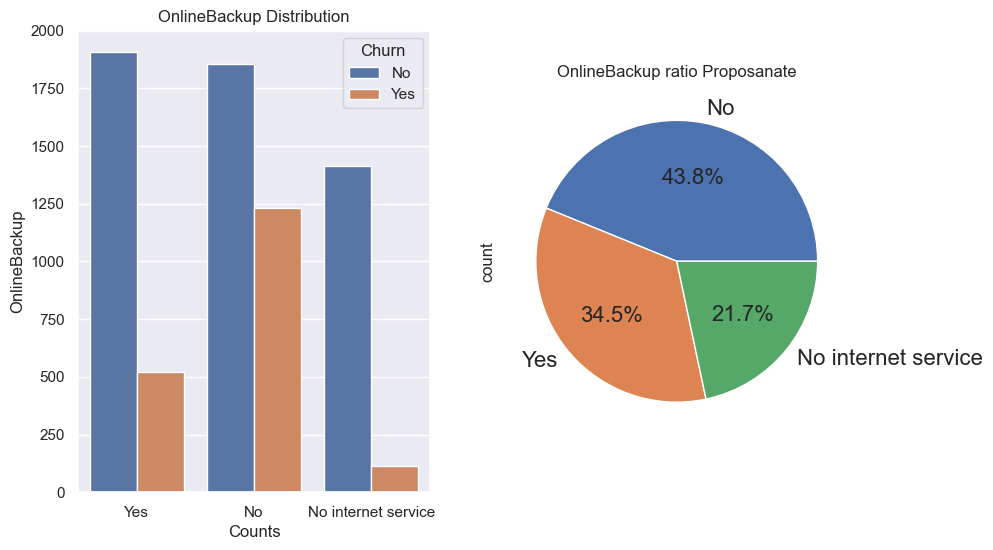

In [166]:
#  Distribution of "OnlineBackup"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="OnlineBackup", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('OnlineBackup')
plt.title('OnlineBackup Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['OnlineBackup'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('OnlineBackup ratio Proposanate')

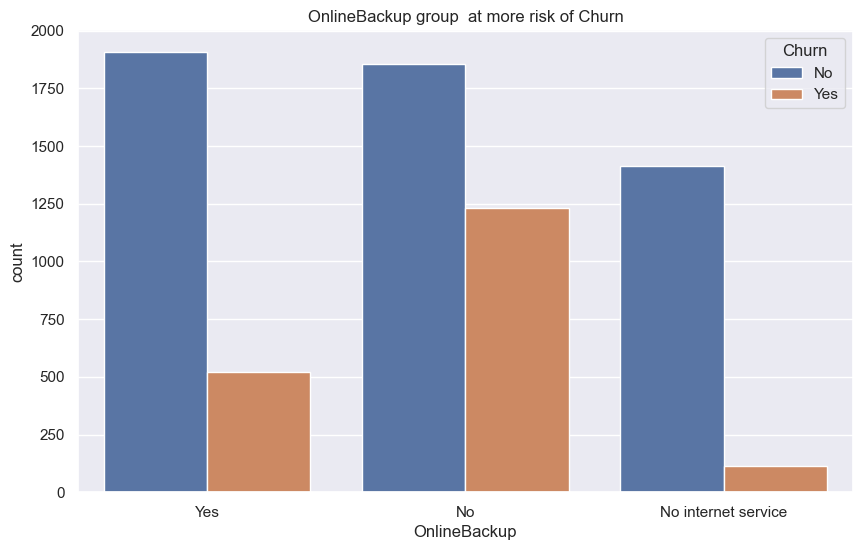

In [167]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['OnlineBackup'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("OnlineBackup group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()

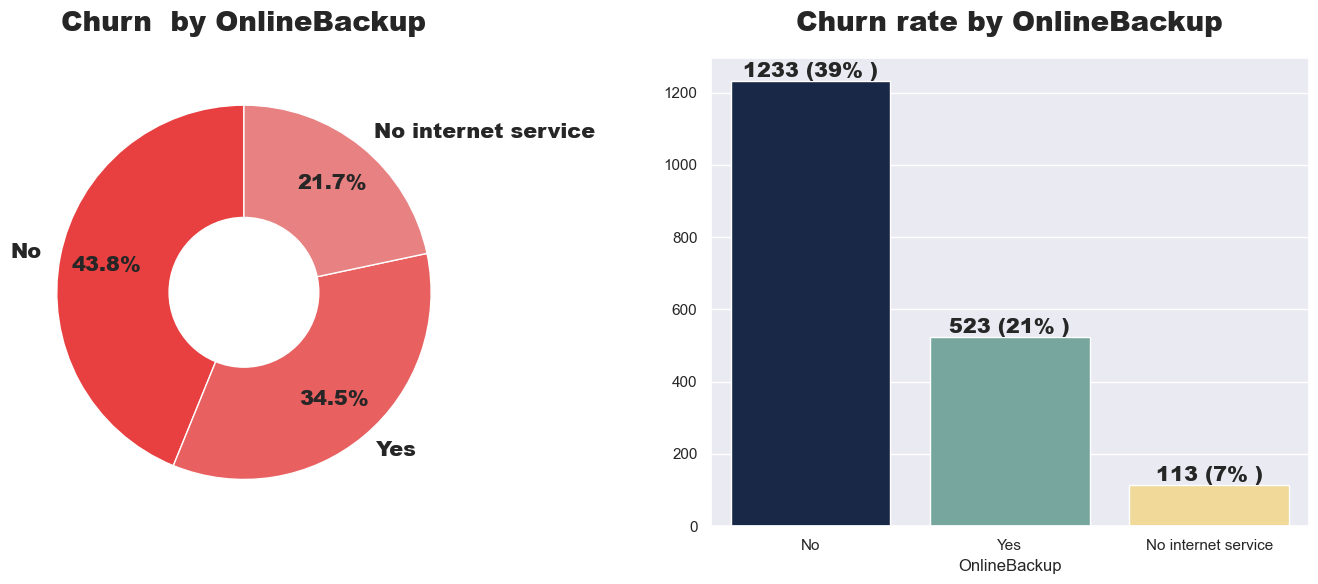

In [164]:
#Visualization to show Churn by OnlineBackup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["OnlineBackup"].value_counts()
plt.title("Churn  by OnlineBackup", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by OnlineBackup.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["OnlineBackup"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by OnlineBackup",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


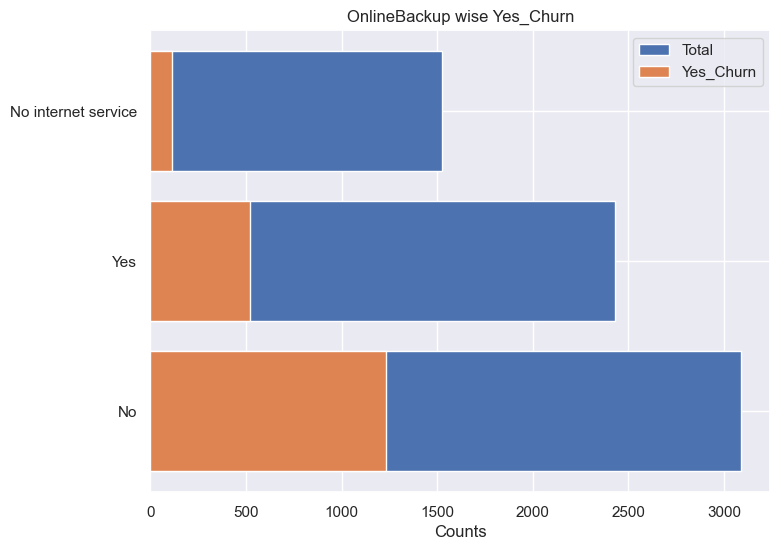

OnlineBackup  Total_Count  % of Total  Yes_Churn  No_Churn  \
0                   No         3088   43.844952       1233      1855   
2                  Yes         2429   21.666903        523      1906   
1  No internet service         1526   34.488144        113      1413   

   %Yes_Churn  %No_Churn  
0      39.929     60.071  
2      21.531     78.469  
1       7.405     92.595

In [163]:
Univariate_Analysis1("OnlineBackup")

Churn         OnlineBackup  count  count_norm
0    No                   No   1855    0.600712
1    No  No internet service   1413    0.925950
2    No                  Yes   1906    0.784685
3   Yes                   No   1233    0.399288
4   Yes  No internet service    113    0.074050
5   Yes                  Yes    523    0.215315

<Axes: xlabel='OnlineBackup'>

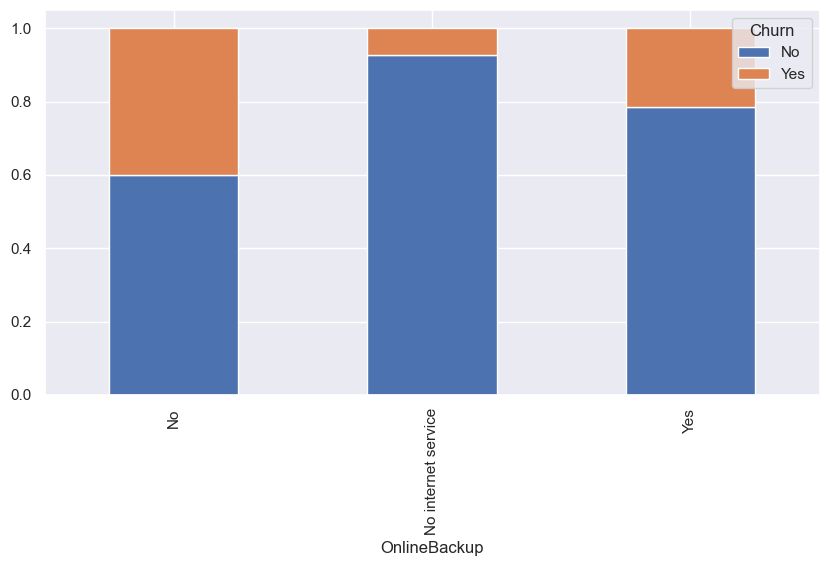

In [162]:
tmp = data1[["Churn", "OnlineBackup"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "OnlineBackup"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "OnlineBackup==\""+row["OnlineBackup"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="OnlineBackup", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))



In [161]:

# Hypothesis testing on "Churn" column
stat, p_val, dof = chi_sqred_ind_test(data1, "OnlineBackup", "Churn", 0.05)

Contigency table: 
 Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523
Statistic: 601.812790113409
P-value: 2.0797592160864276e-131
DOF: 2
probability=0.950, critical=5.991, stat=601.813
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing DeviceProtection

In [ ]:
data1["DeviceProtection"].value_counts()


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'DeviceProtection ratio Proposanate')

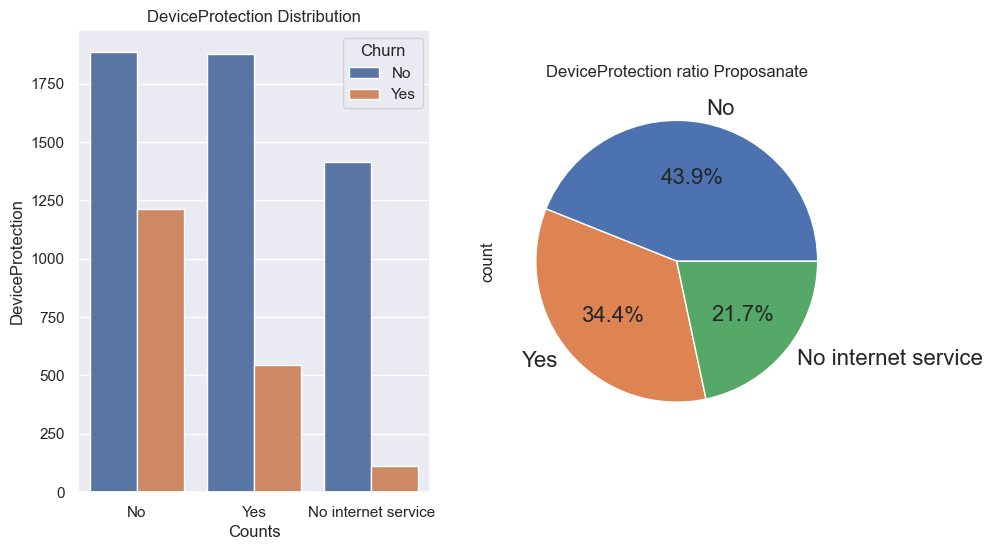

In [168]:
#  Distribution of "DeviceProtection"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="DeviceProtection", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('DeviceProtection')
plt.title('DeviceProtection Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['DeviceProtection'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('DeviceProtection ratio Proposanate')


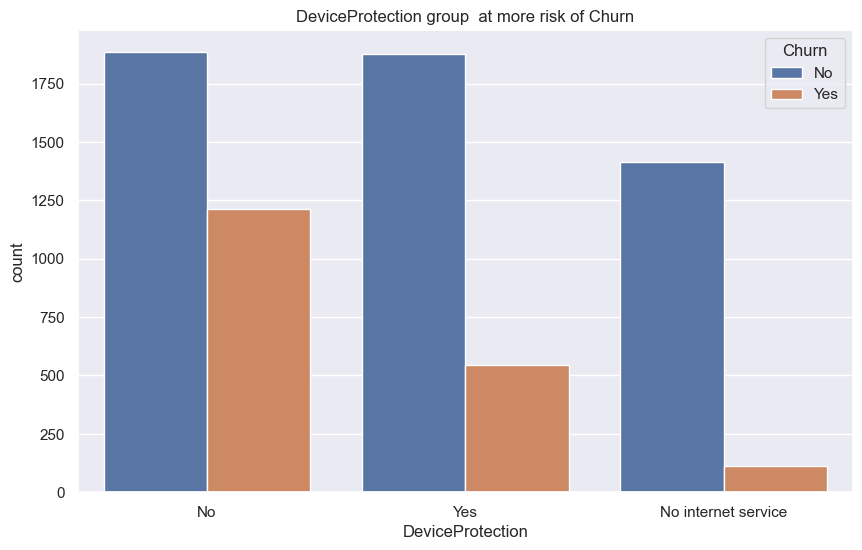

In [169]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['DeviceProtection'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("DeviceProtection group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()

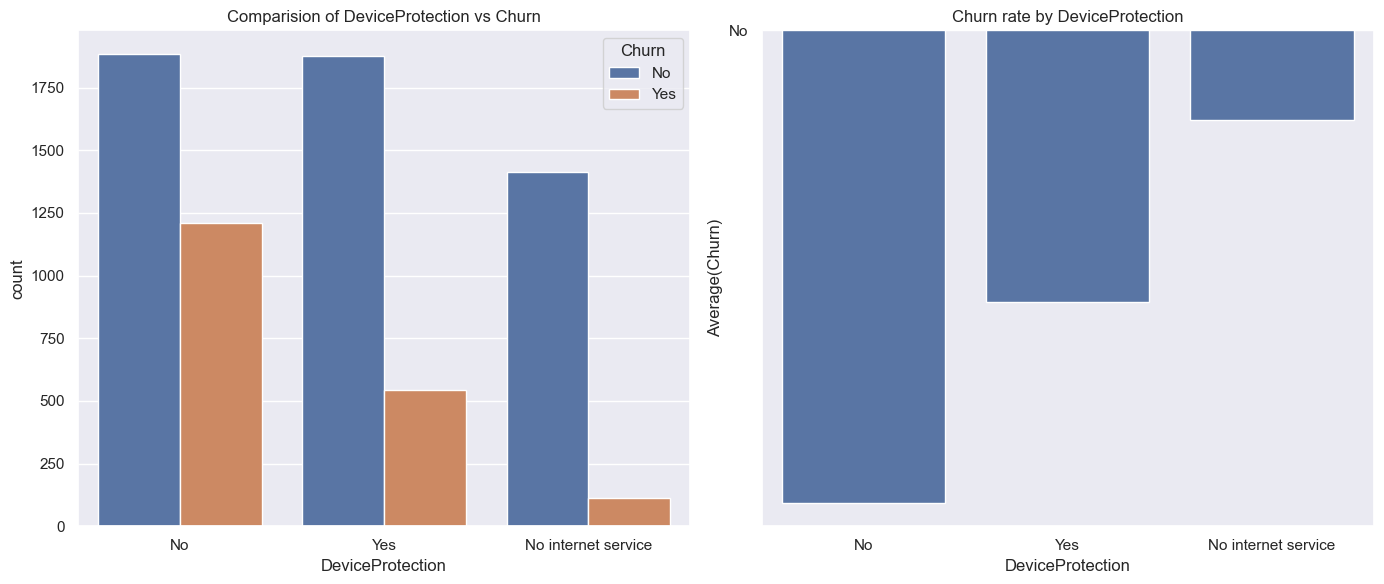

In [170]:
CategoricalVariables_targetPlots(data1,"DeviceProtection")


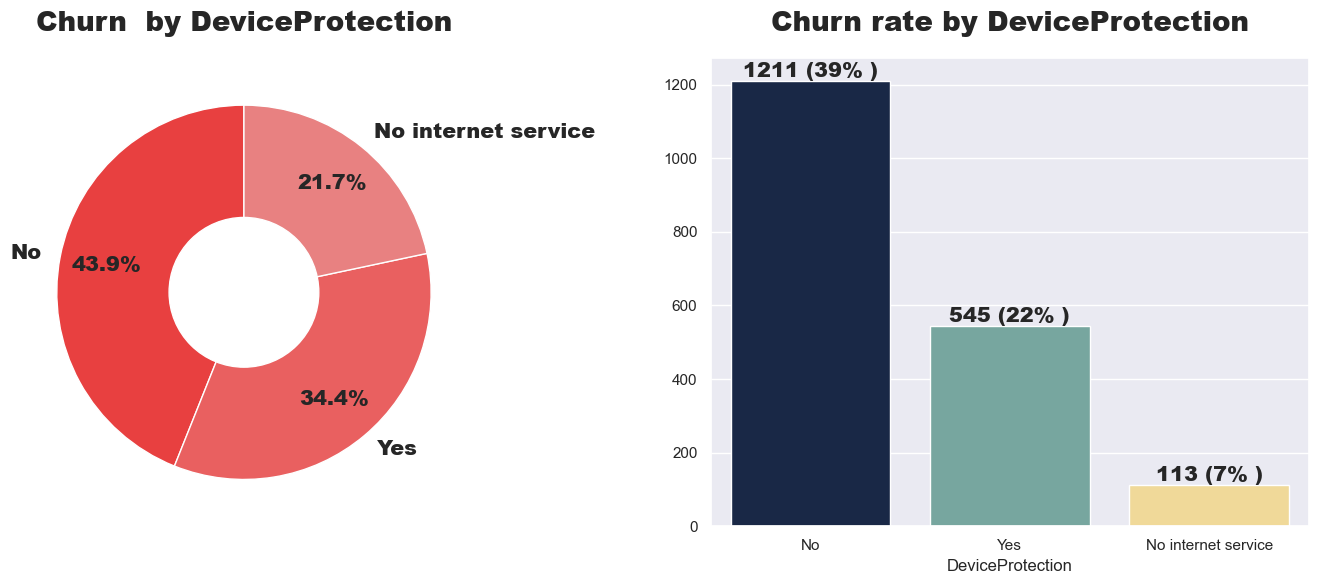

In [171]:
#Visualization to show Churn by DeviceProtection.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["DeviceProtection"].value_counts()
plt.title("Churn  by DeviceProtection", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by DeviceProtection.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["DeviceProtection"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by DeviceProtection",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

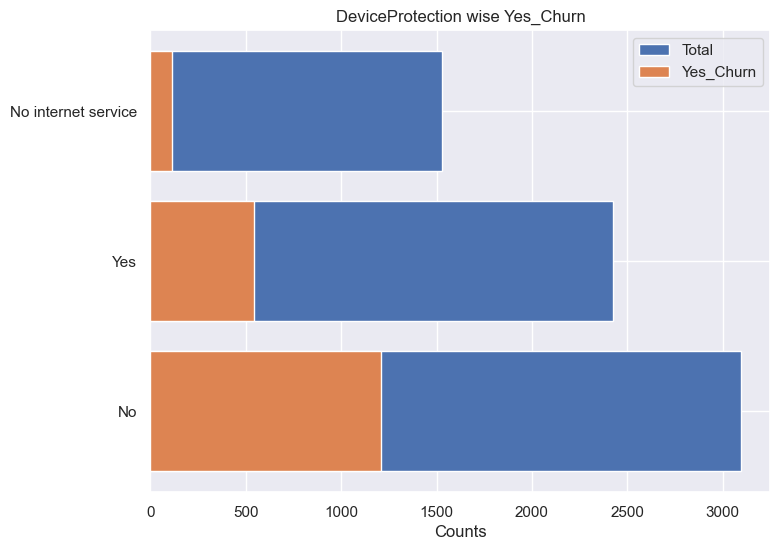

DeviceProtection  Total_Count  % of Total  Yes_Churn  No_Churn  \
0                   No         3095   43.944342       1211      1884   
2                  Yes         2422   21.666903        545      1877   
1  No internet service         1526   34.388755        113      1413   

   %Yes_Churn  %No_Churn  
0      39.128     60.872  
2      22.502     77.498  
1       7.405     92.595

In [172]:
Univariate_Analysis1("DeviceProtection")

Churn     DeviceProtection  count  count_norm
0    No                   No   1884    0.608724
1    No  No internet service   1413    0.925950
2    No                  Yes   1877    0.774979
3   Yes                   No   1211    0.391276
4   Yes  No internet service    113    0.074050
5   Yes                  Yes    545    0.225021

<Axes: xlabel='DeviceProtection'>

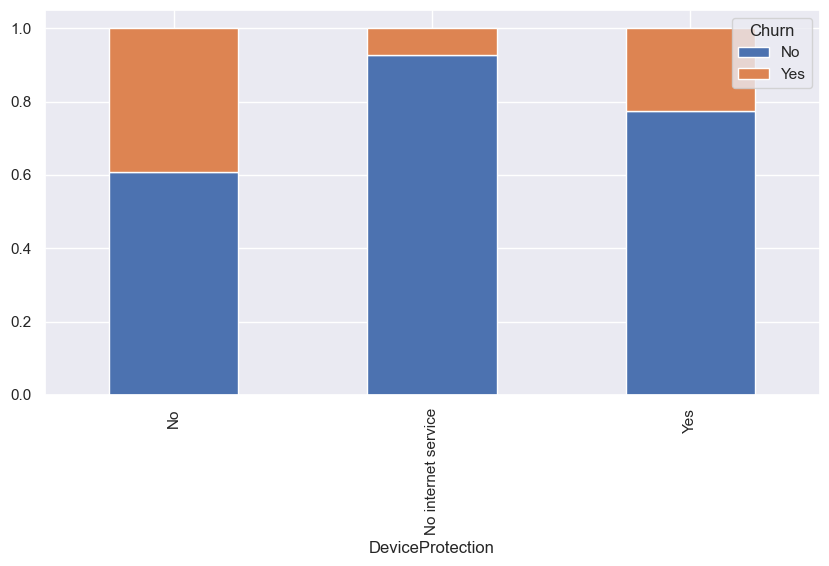

In [173]:
tmp = data1[["Churn", "DeviceProtection"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "DeviceProtection"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "DeviceProtection==\""+row["DeviceProtection"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="DeviceProtection", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))



In [174]:
# Hypothesis testing on "Churn" column
stat, p_val, dof = chi_sqred_ind_test(data1, "DeviceProtection", "Churn", 0.05)

Contigency table: 
 Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545
Statistic: 558.419369407389
P-value: 5.505219496457244e-122
DOF: 2
probability=0.950, critical=5.991, stat=558.419
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing TechSupport

In [176]:
data1["TechSupport"].value_counts()


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'TechSupport ratio Proposanate')

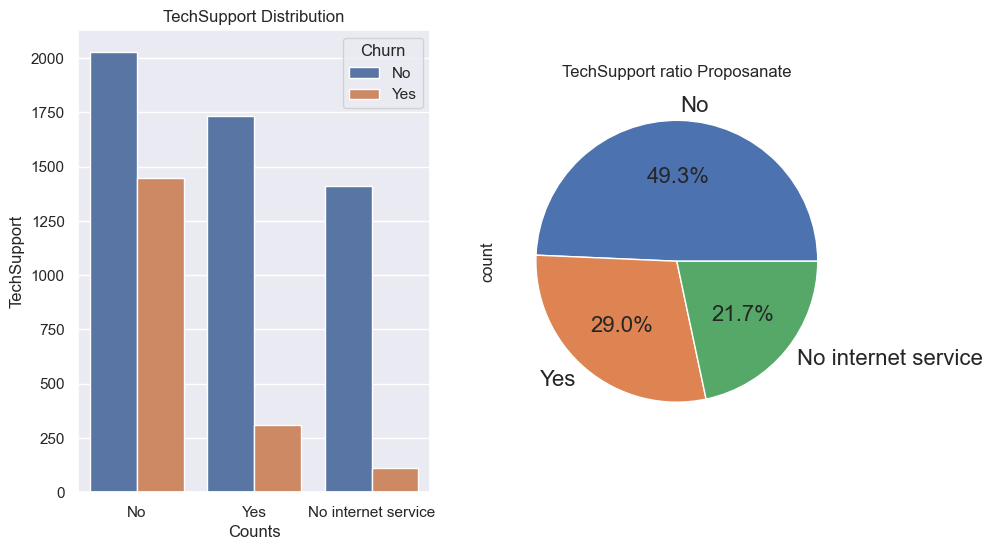

In [177]:
#  Distribution of "TechSupport"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="TechSupport", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('TechSupport')
plt.title('TechSupport Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['TechSupport'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('TechSupport ratio Proposanate')


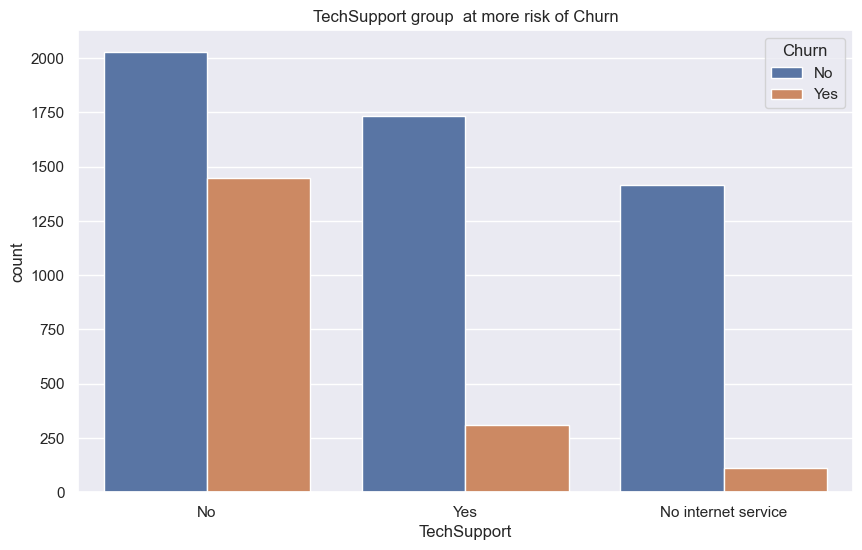

In [178]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['TechSupport'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("TechSupport group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()

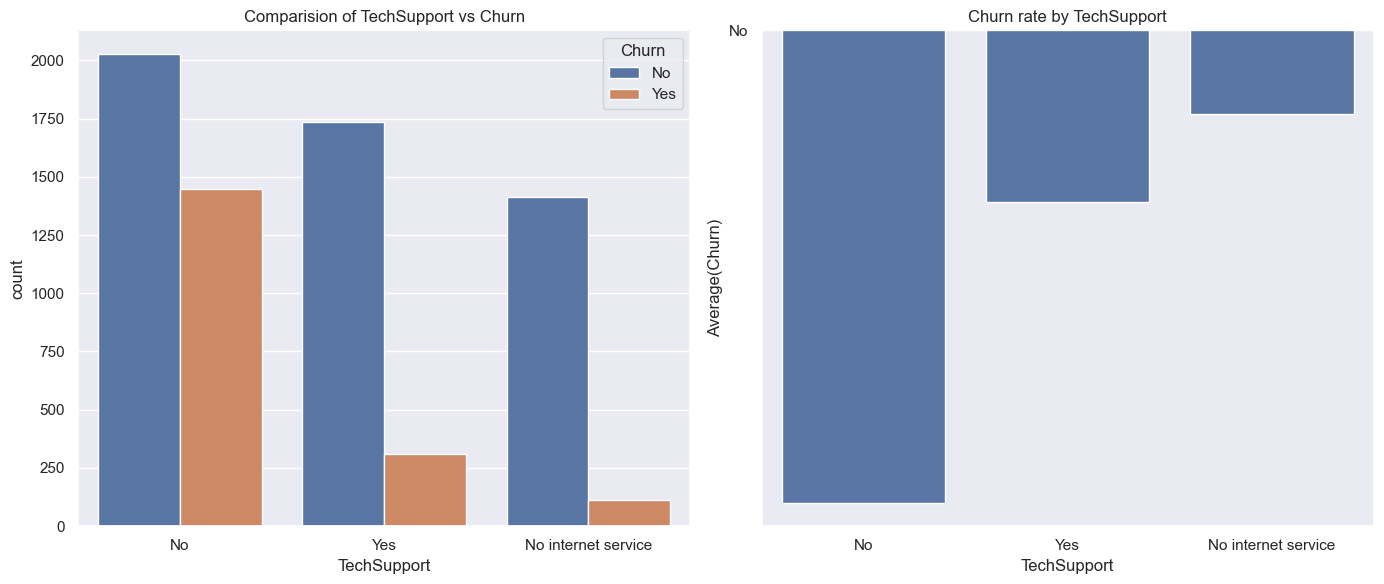

In [179]:
CategoricalVariables_targetPlots(data1,"TechSupport")


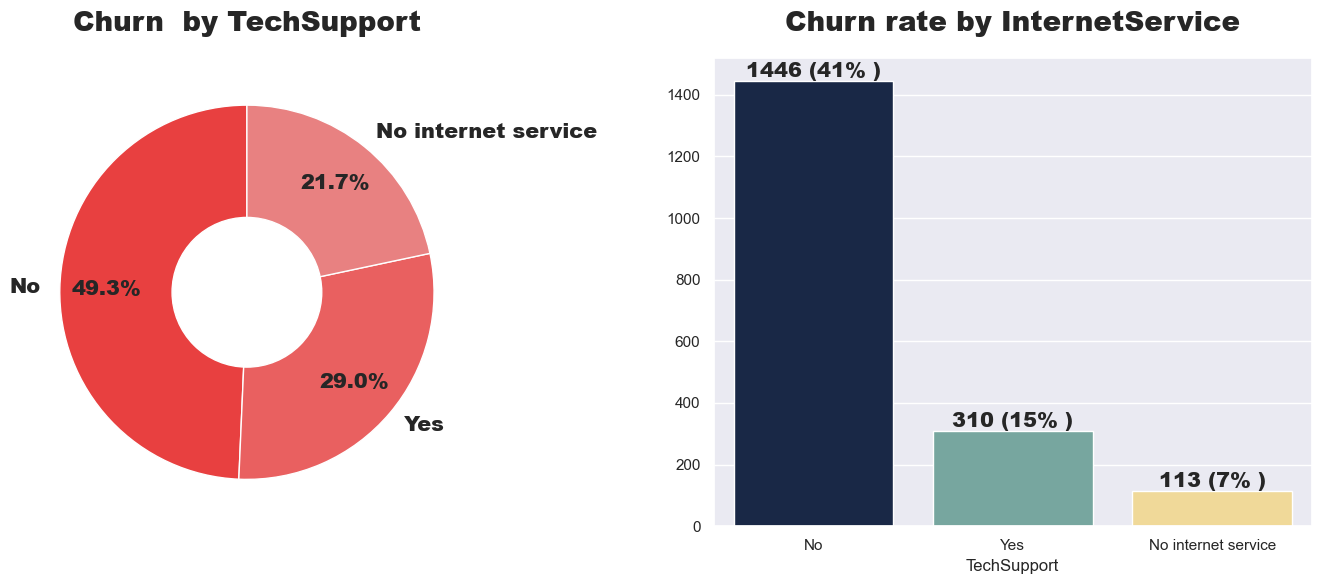

In [180]:
#Visualization to show Churn by TechSupport.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["TechSupport"].value_counts()
plt.title("Churn  by TechSupport", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by TechSupport.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["TechSupport"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by InternetService",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

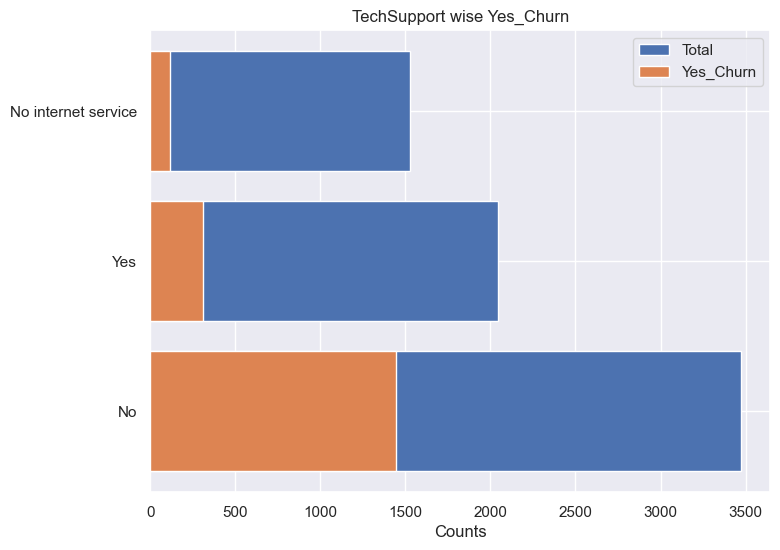

TechSupport  Total_Count  % of Total  Yes_Churn  No_Churn  \
0                   No         3473   49.311373       1446      2027   
2                  Yes         2044   21.666903        310      1734   
1  No internet service         1526   29.021724        113      1413   

   %Yes_Churn  %No_Churn  
0      41.635     58.365  
2      15.166     84.834  
1       7.405     92.595

In [181]:
Univariate_Analysis1("TechSupport")


Churn          TechSupport  count  count_norm
0    No                   No   2027    0.583645
1    No  No internet service   1413    0.925950
2    No                  Yes   1734    0.848337
3   Yes                   No   1446    0.416355
4   Yes  No internet service    113    0.074050
5   Yes                  Yes    310    0.151663

<Axes: xlabel='TechSupport'>

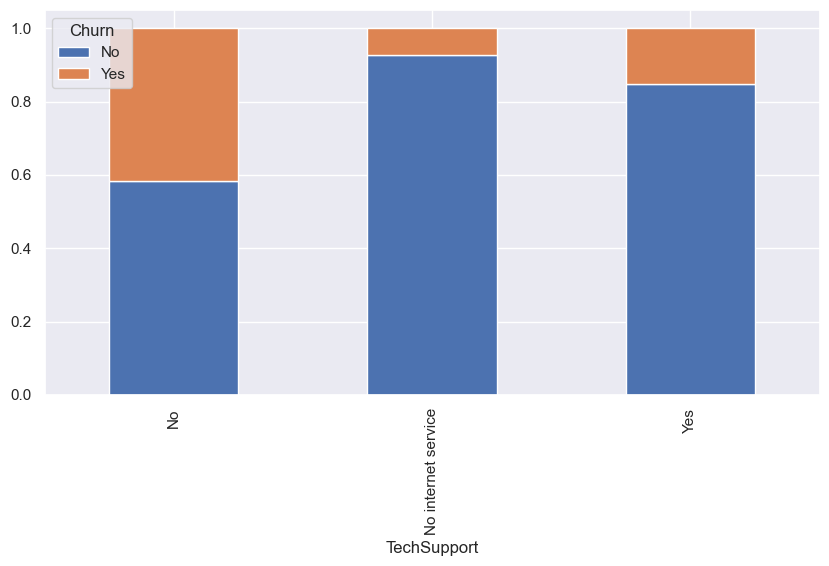

In [182]:
tmp = data1[["Churn", "TechSupport"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "TechSupport"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "TechSupport==\""+row["TechSupport"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="TechSupport", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))



In [183]:
# Hypothesis testing on "TechSupport" column
stat, p_val, dof = chi_sqred_ind_test(data1, "TechSupport", "Churn", 0.05)

Contigency table: 
 Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310
Statistic: 828.1970684587394
P-value: 1.4430840279998987e-180
DOF: 2
probability=0.950, critical=5.991, stat=828.197
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing StreamingTV

In [189]:
data1["StreamingTV"].value_counts()


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'StreamingTV ratio Proposanate')

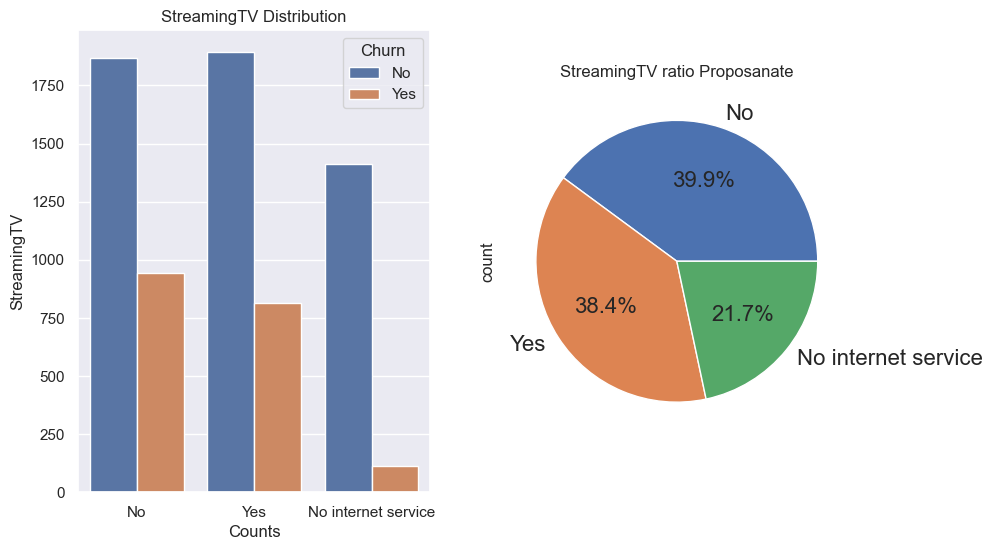

In [185]:
#  Distribution of "StreamingTV"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="StreamingTV", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('StreamingTV')
plt.title('StreamingTV Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['StreamingTV'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('StreamingTV ratio Proposanate')

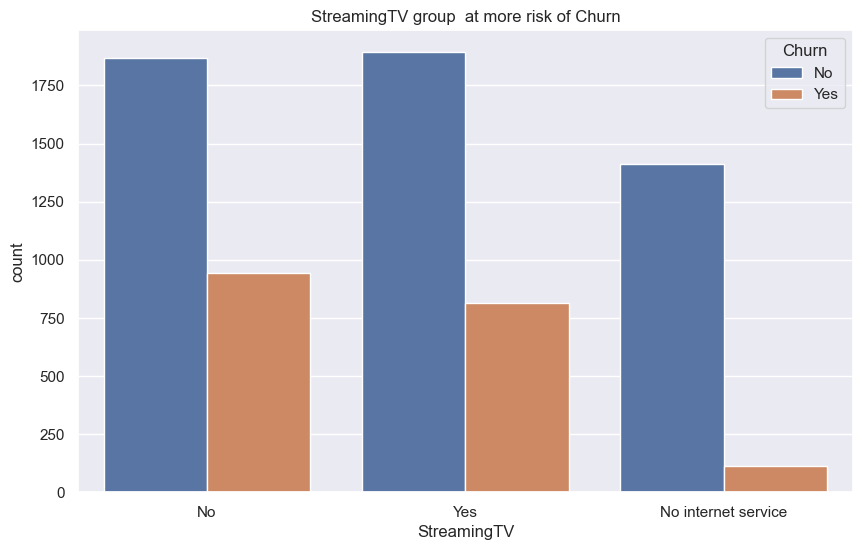

In [186]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['StreamingTV'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("StreamingTV group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()

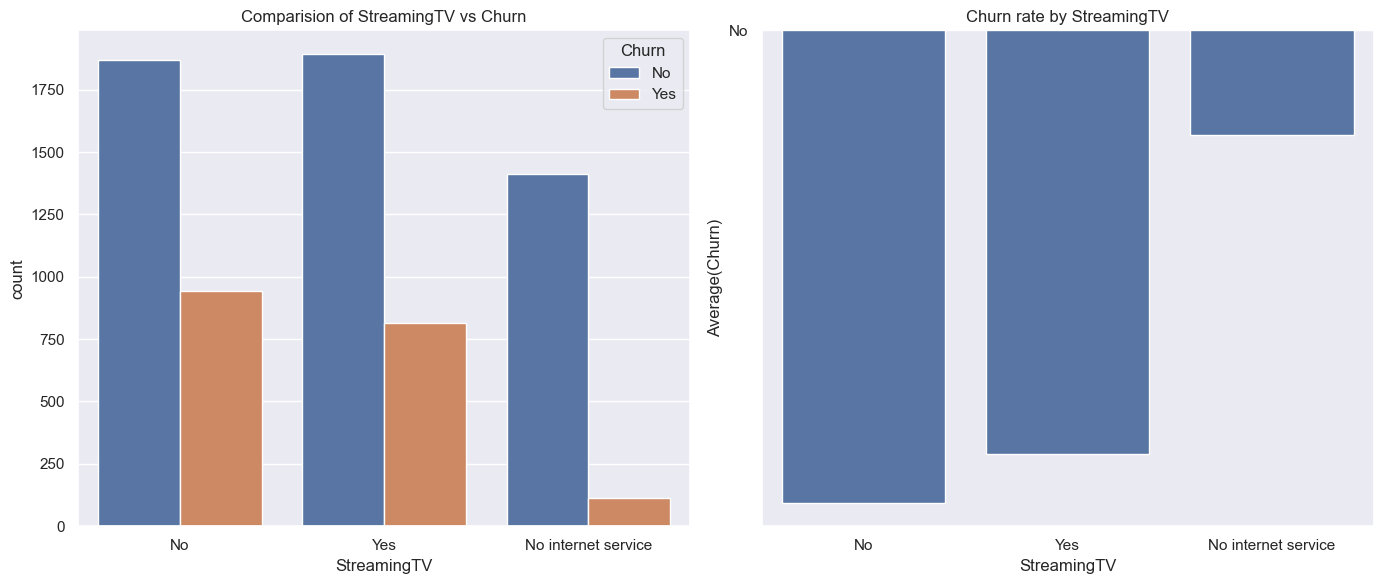

In [187]:
CategoricalVariables_targetPlots(data1,"StreamingTV")


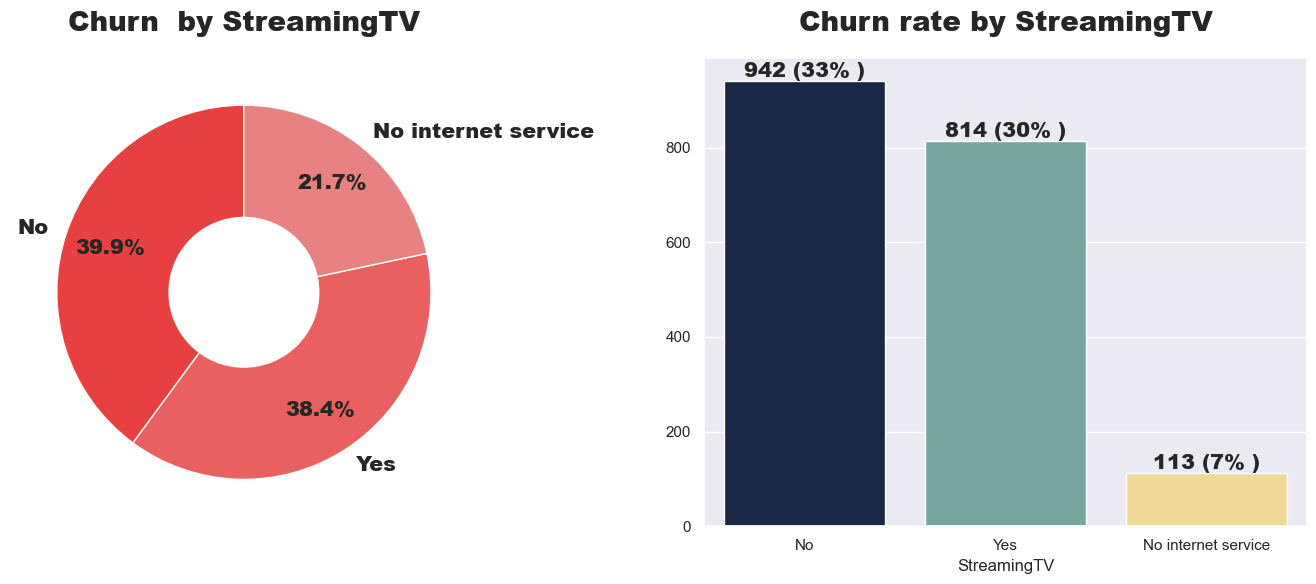

In [188]:
#Visualization to show Churn by StreamingTV.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["StreamingTV"].value_counts()
plt.title("Churn  by StreamingTV", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by StreamingTV.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["StreamingTV"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by StreamingTV",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


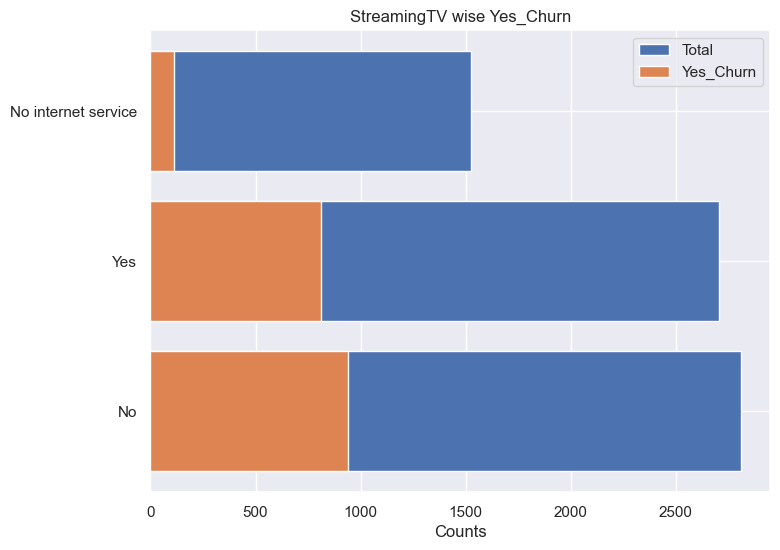

StreamingTV  Total_Count  % of Total  Yes_Churn  No_Churn  \
0                   No         2810   39.897771        942      1868   
2                  Yes         2707   21.666903        814      1893   
1  No internet service         1526   38.435326        113      1413   

   %Yes_Churn  %No_Churn  
0      33.523     66.477  
2      30.070     69.930  
1       7.405     92.595

In [190]:
Univariate_Analysis1("StreamingTV")


Churn          StreamingTV  count  count_norm
0    No                   No   1868    0.664769
1    No  No internet service   1413    0.925950
2    No                  Yes   1893    0.699298
3   Yes                   No    942    0.335231
4   Yes  No internet service    113    0.074050
5   Yes                  Yes    814    0.300702

<Axes: xlabel='StreamingTV'>

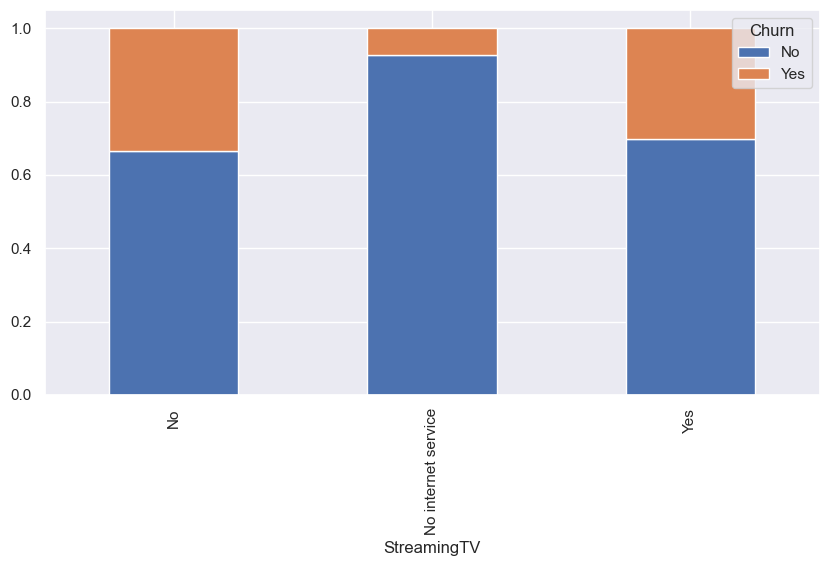

In [191]:
tmp = data1[["Churn", "StreamingTV"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "StreamingTV"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "StreamingTV==\""+row["StreamingTV"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="StreamingTV", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))



In [192]:
# Hypothesis testing on "Churn" column
stat, p_val, dof = chi_sqred_ind_test(data1, "StreamingTV", "Churn", 0.05)

Contigency table: 
 Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814
Statistic: 374.2039433109813
P-value: 5.528994485739183e-82
DOF: 2
probability=0.950, critical=5.991, stat=374.204
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing StreamingMovies

In [194]:
data1["StreamingMovies"].value_counts()


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'StreamingMovies ratio Proposanate')

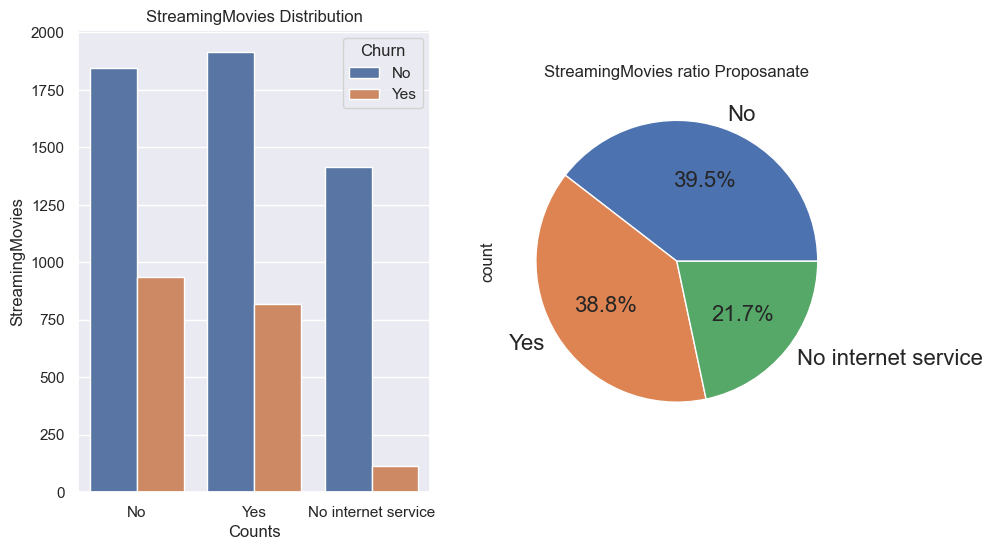

In [195]:
#  Distribution of "StreamingMovies"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="StreamingMovies", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('StreamingMovies')
plt.title('StreamingMovies Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['StreamingMovies'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('StreamingMovies ratio Proposanate')


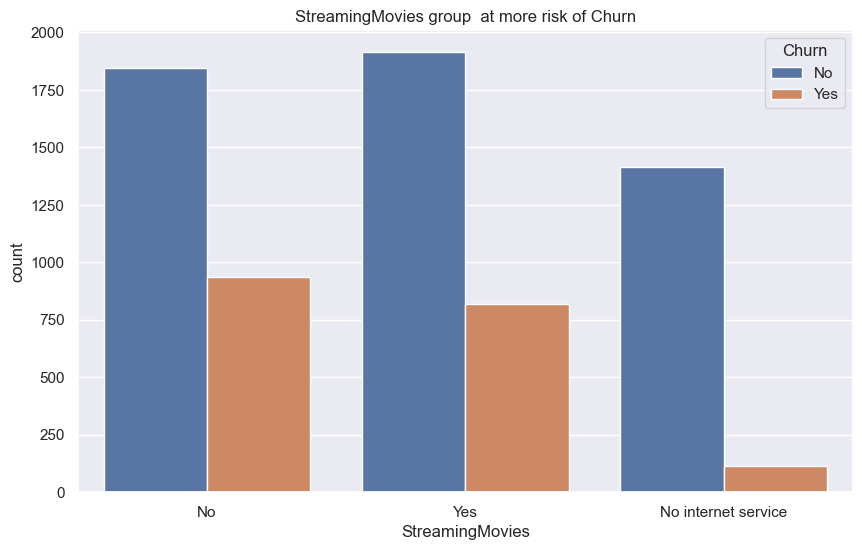

In [196]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['StreamingMovies'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("StreamingMovies group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()

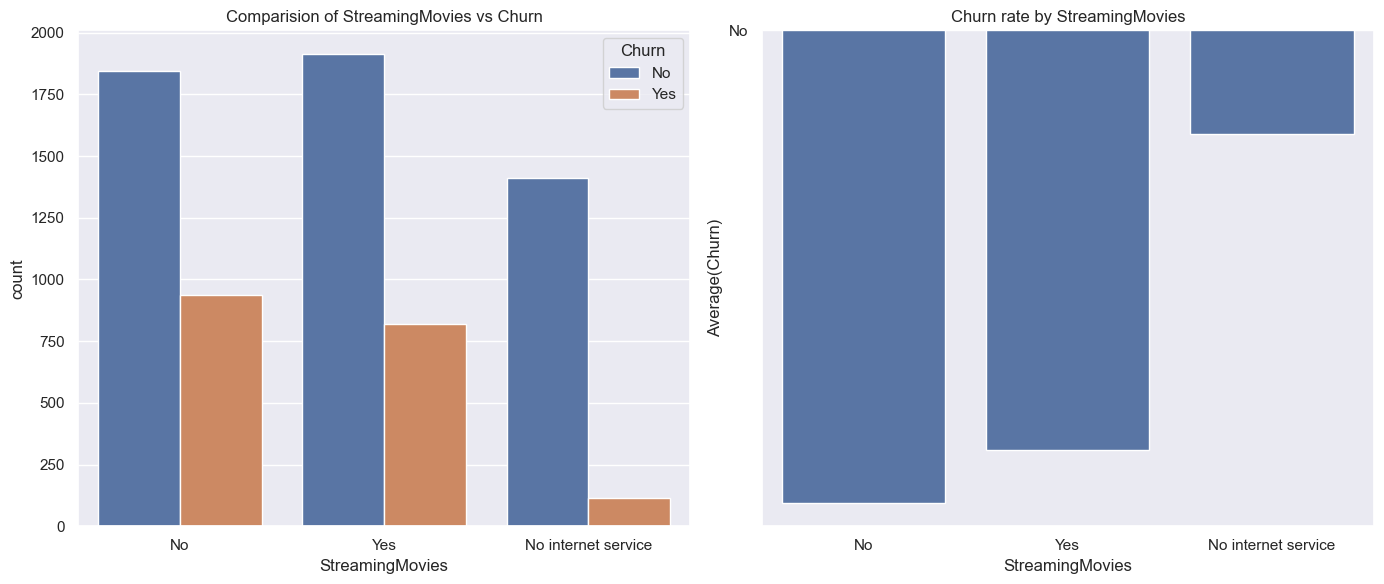

In [197]:
CategoricalVariables_targetPlots(data1,"StreamingMovies")


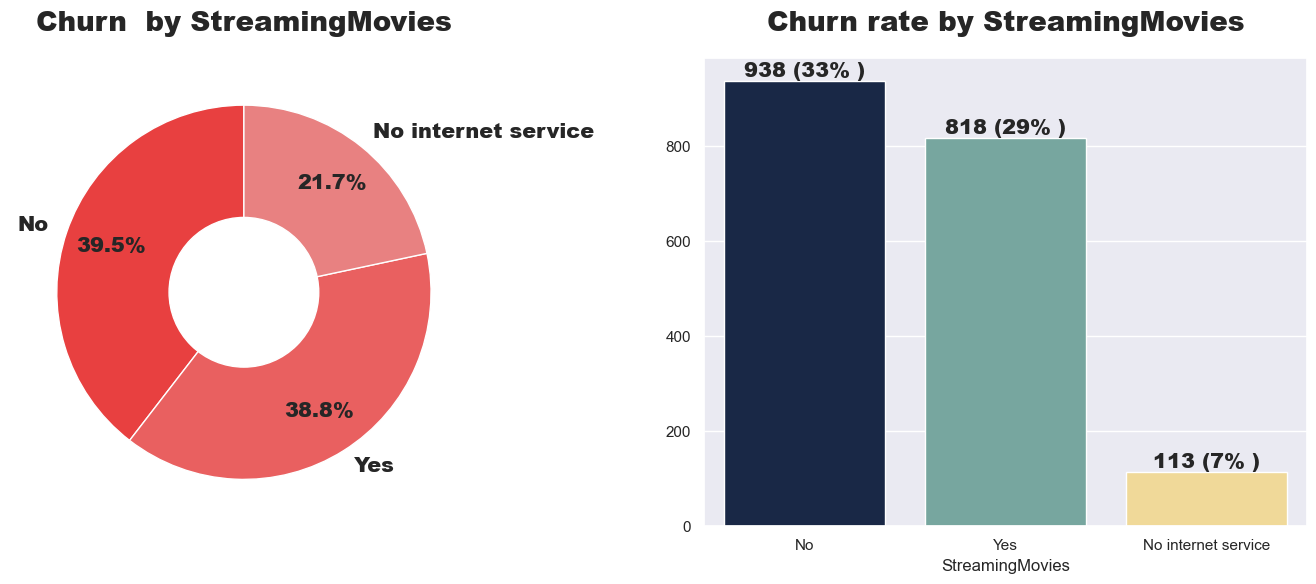

In [198]:
#Visualization to show Churn by StreamingMovies.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["StreamingMovies"].value_counts()
plt.title("Churn  by StreamingMovies", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by StreamingMovies.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["StreamingMovies"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by StreamingMovies",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

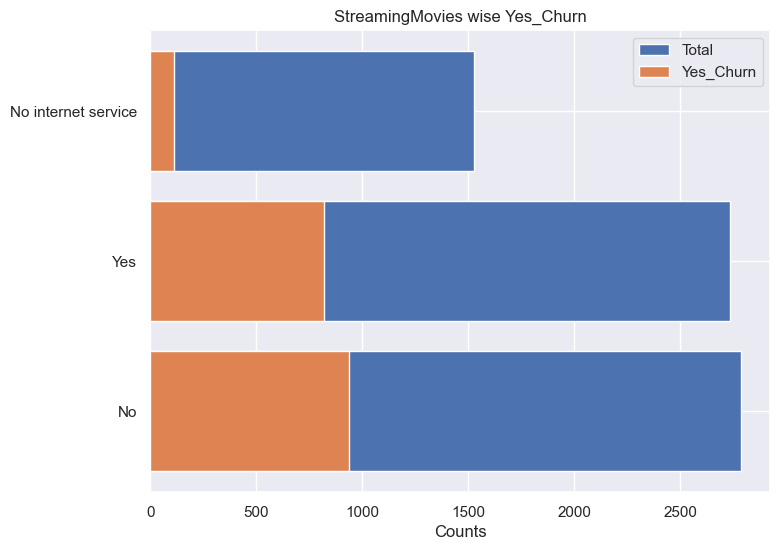

StreamingMovies  Total_Count  % of Total  Yes_Churn  No_Churn  \
0                   No         2785   39.542808        938      1847   
2                  Yes         2732   21.666903        818      1914   
1  No internet service         1526   38.790288        113      1413   

   %Yes_Churn  %No_Churn  
0      33.680     66.320  
2      29.941     70.059  
1       7.405     92.595

In [199]:
Univariate_Analysis1("StreamingMovies")


Churn      StreamingMovies  count  count_norm
0    No                   No   1847    0.663196
1    No  No internet service   1413    0.925950
2    No                  Yes   1914    0.700586
3   Yes                   No    938    0.336804
4   Yes  No internet service    113    0.074050
5   Yes                  Yes    818    0.299414

<Axes: xlabel='StreamingMovies'>

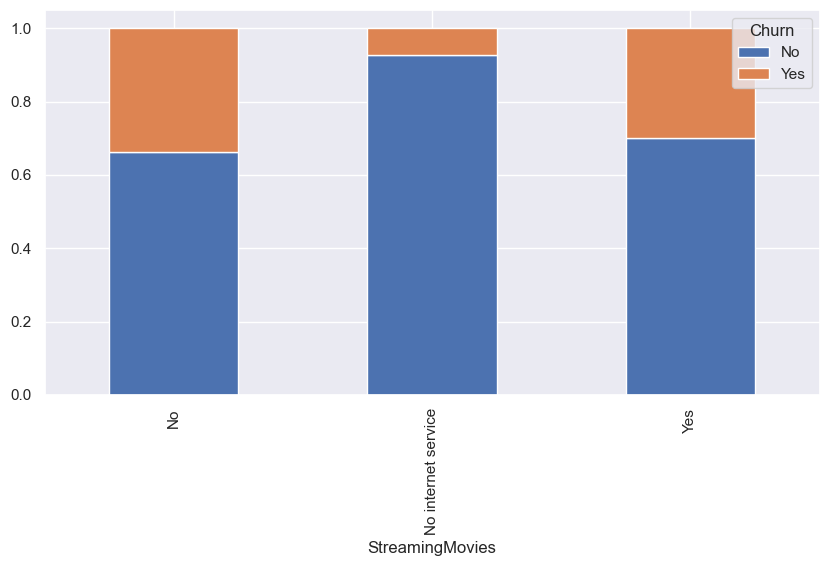

In [200]:
tmp = data1[["Churn", "StreamingMovies"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "StreamingMovies"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "StreamingMovies==\""+row["StreamingMovies"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="StreamingMovies", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))



In [201]:
# Hypothesis testing on "StreamingMovies" column
stat, p_val, dof = chi_sqred_ind_test(data1, "StreamingMovies", "Churn", 0.05)

Contigency table: 
 Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818
Statistic: 375.6614793452656
P-value: 2.667756755723681e-82
DOF: 2
probability=0.950, critical=5.991, stat=375.661
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing Contract


In [203]:
data1["Contract"].value_counts()


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'Contract ratio Proposanate')

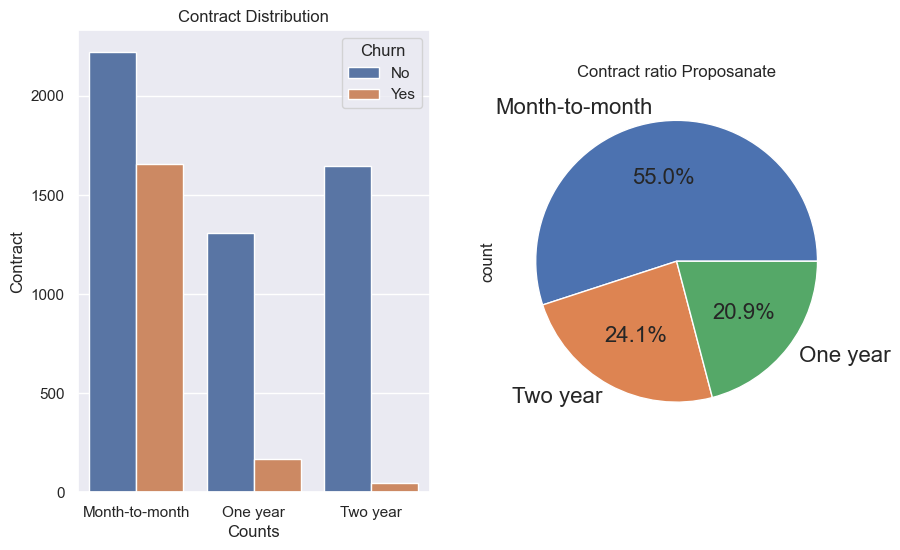

In [204]:
#  Distribution of "Contract"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="Contract", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('Contract')
plt.title('Contract Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['Contract'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('Contract ratio Proposanate')


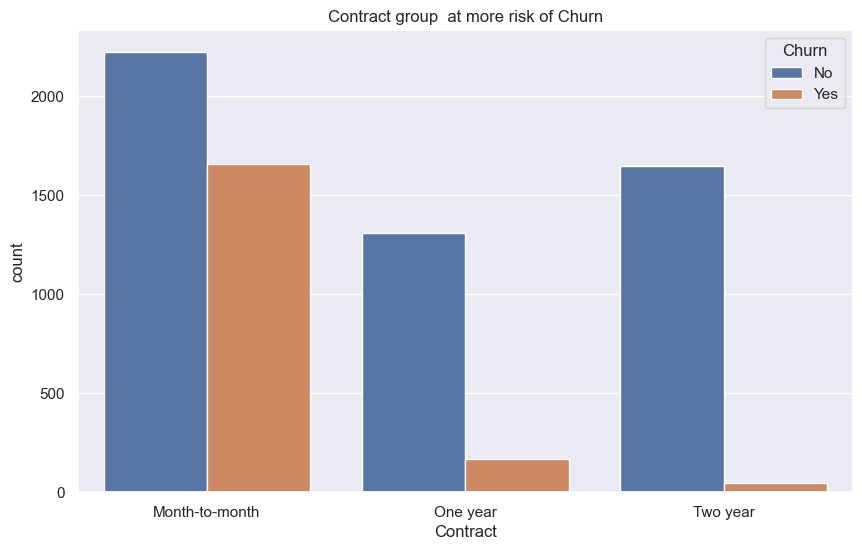

In [205]:

my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['Contract'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("Contract group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()


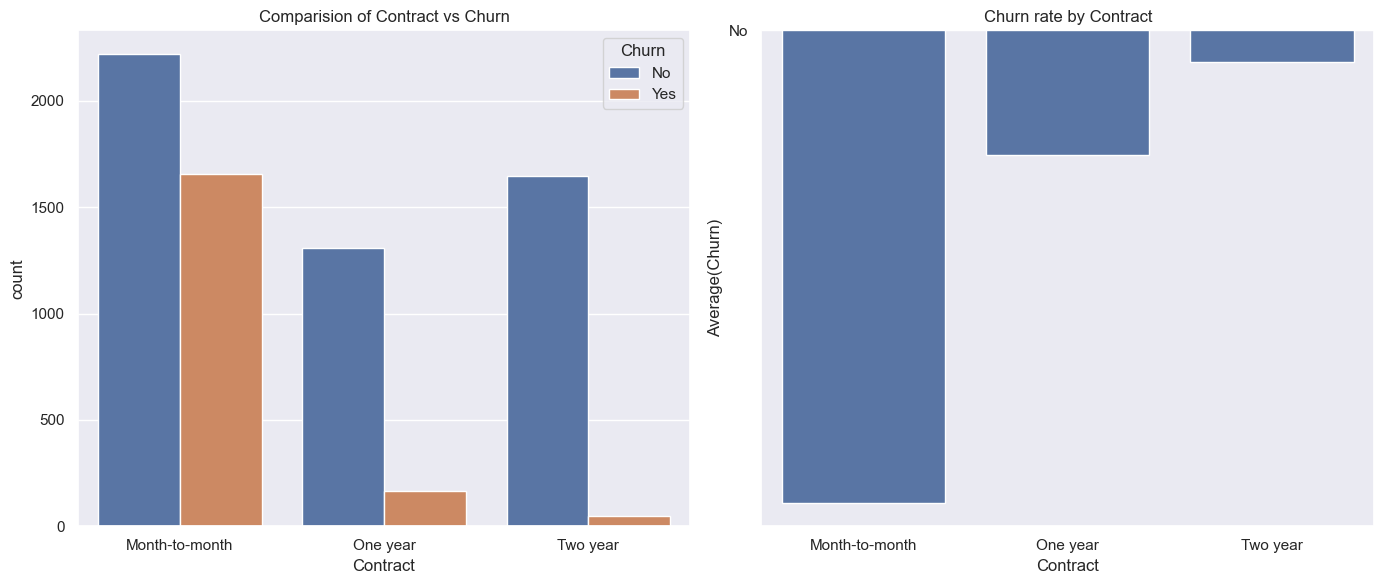

In [206]:
CategoricalVariables_targetPlots(data1,"Contract")


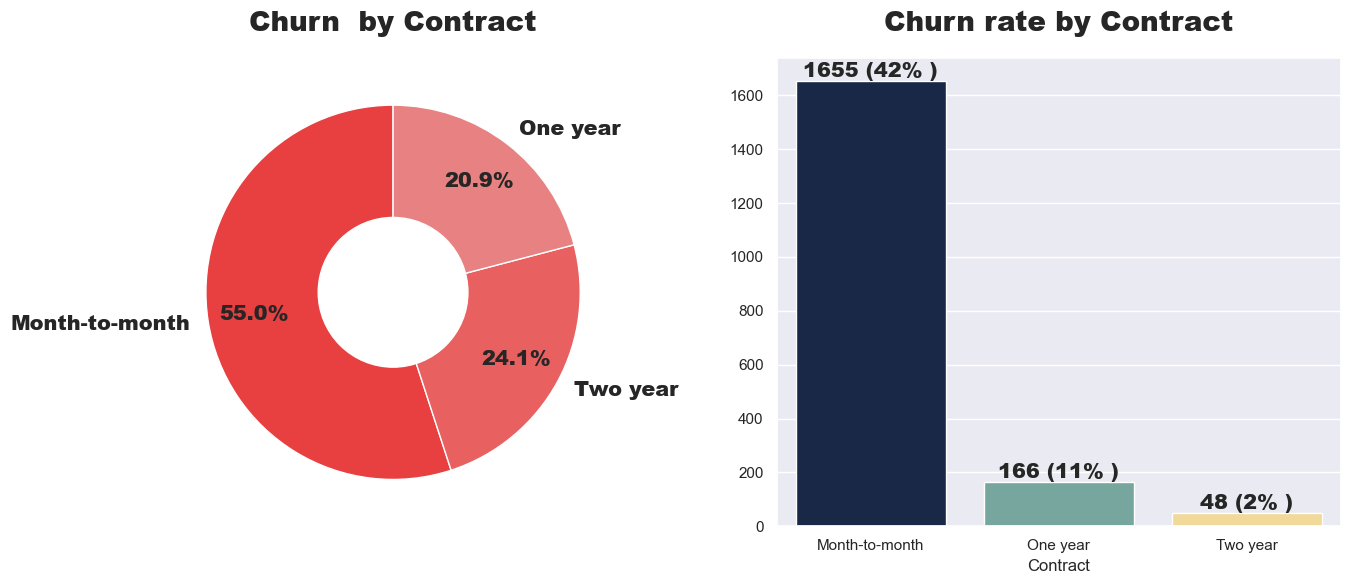

In [207]:
#Visualization to show Churn by Contract.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["Contract"].value_counts()
plt.title("Churn  by Contract", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by Contract.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["Contract"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by Contract",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

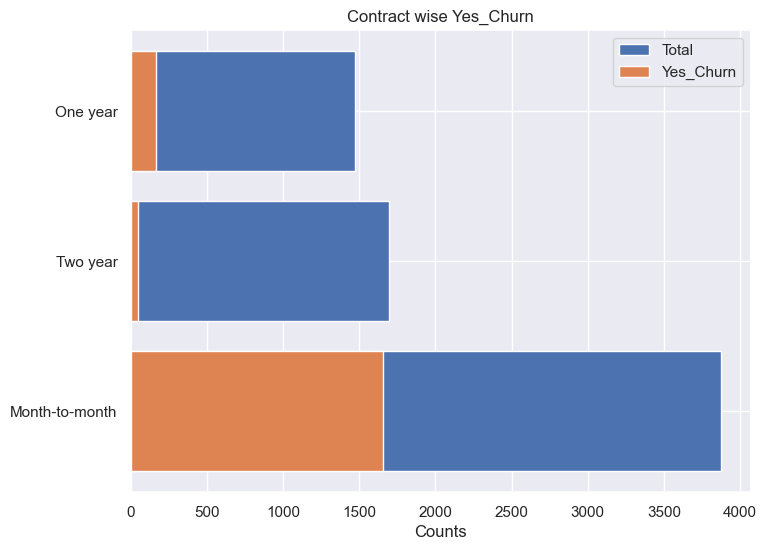

Contract  Total_Count  % of Total  Yes_Churn  No_Churn  %Yes_Churn  \
0  Month-to-month         3875   55.019168       1655      2220      42.710   
2        Two year         1695   20.914383         48      1647       2.832   
1        One year         1473   24.066449        166      1307      11.270   

   %No_Churn  
0     57.290  
2     97.168  
1     88.730

In [208]:
Univariate_Analysis1("Contract")


Churn        Contract  count  count_norm
0    No  Month-to-month   2220    0.572903
1    No        One year   1307    0.887305
2    No        Two year   1647    0.971681
3   Yes  Month-to-month   1655    0.427097
4   Yes        One year    166    0.112695
5   Yes        Two year     48    0.028319

<Axes: xlabel='Contract'>

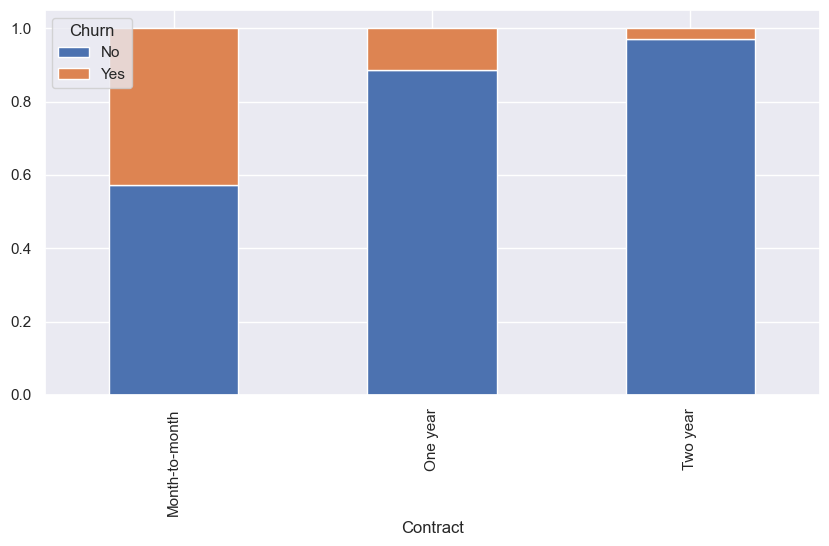

In [209]:
tmp = data1[["Churn", "Contract"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "Contract"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "Contract==\""+row["Contract"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="Contract", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))



In [210]:
# Hypothesis testing on "Contract" column
stat, p_val, dof = chi_sqred_ind_test(data1, "Contract", "Churn", 0.05)

Contigency table: 
 Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48
Statistic: 1184.5965720837926
P-value: 5.863038300673391e-258
DOF: 2
probability=0.950, critical=5.991, stat=1184.597
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing PaperlessBilling


In [212]:
data1["PaperlessBilling"].value_counts()


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'PaperlessBilling ratio Proposanate')

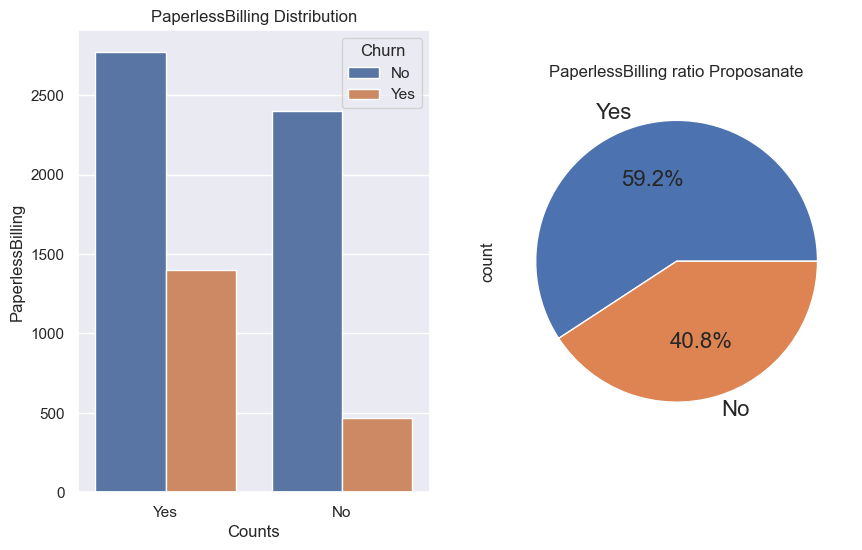

In [213]:
#  Distribution of "PaperlessBilling"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="PaperlessBilling", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('PaperlessBilling')
plt.title('PaperlessBilling Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['PaperlessBilling'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('PaperlessBilling ratio Proposanate')


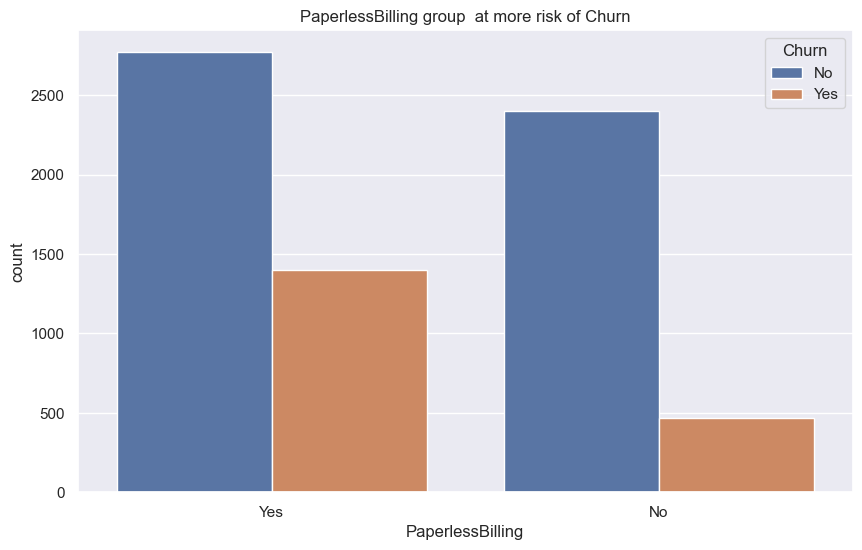

In [214]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['PaperlessBilling'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("PaperlessBilling group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()



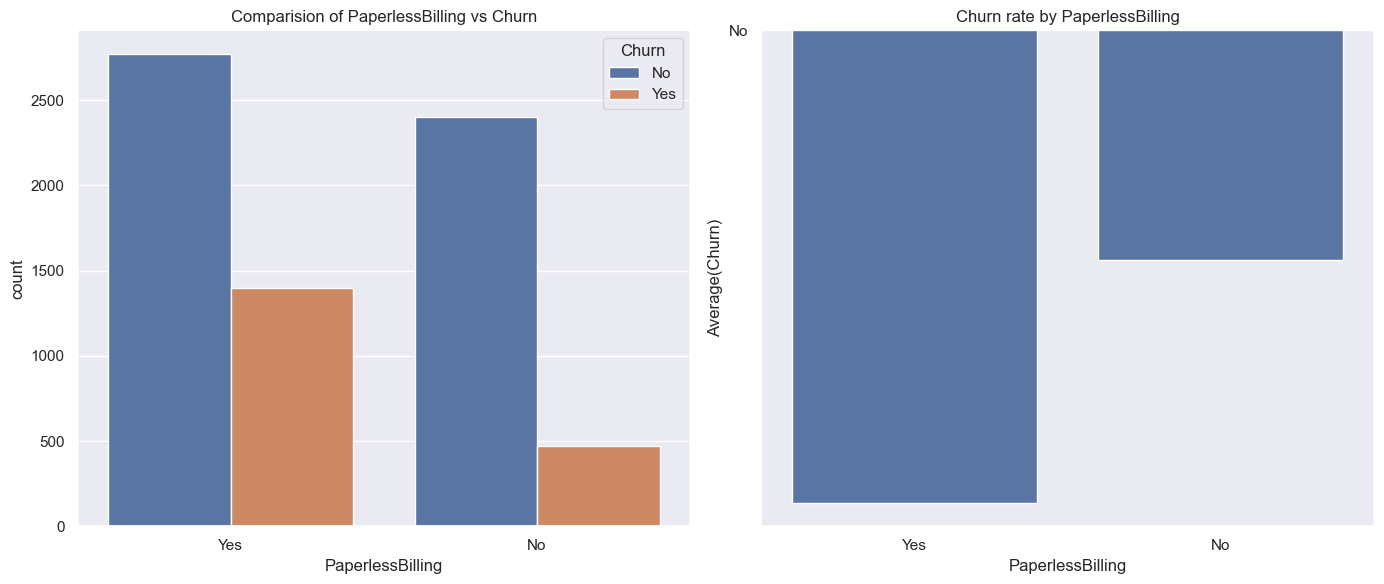

In [215]:
CategoricalVariables_targetPlots(data1,"PaperlessBilling")


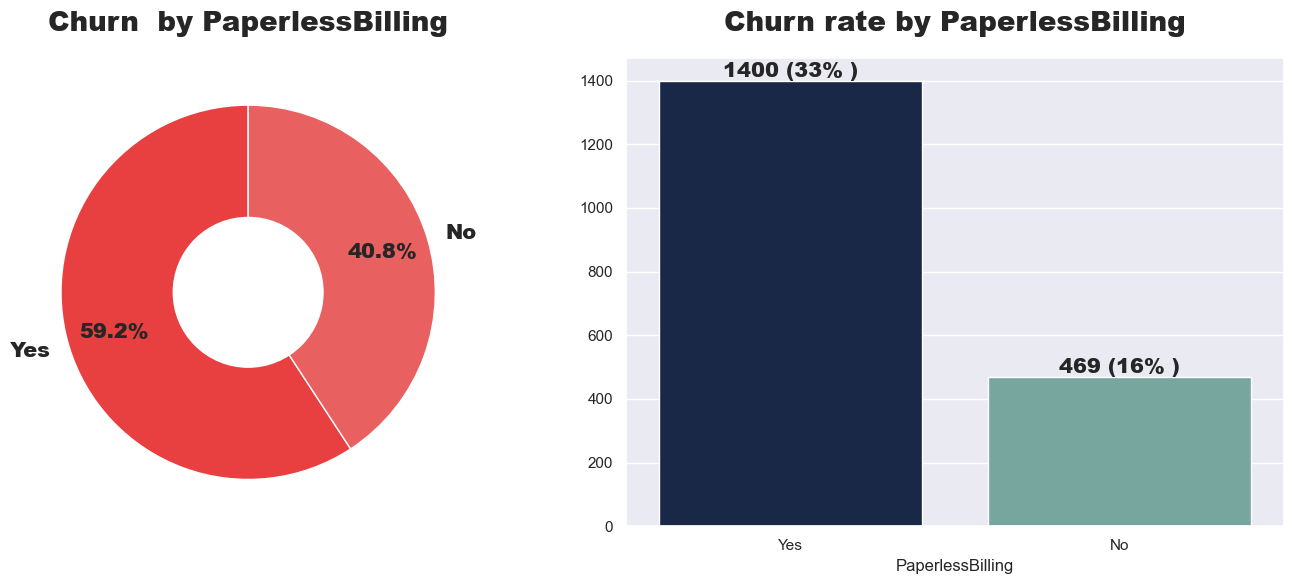

In [216]:
#Visualization to show Churn by PaperlessBilling.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["PaperlessBilling"].value_counts()
plt.title("Churn  by PaperlessBilling", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by PaperlessBilling.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["PaperlessBilling"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by PaperlessBilling",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

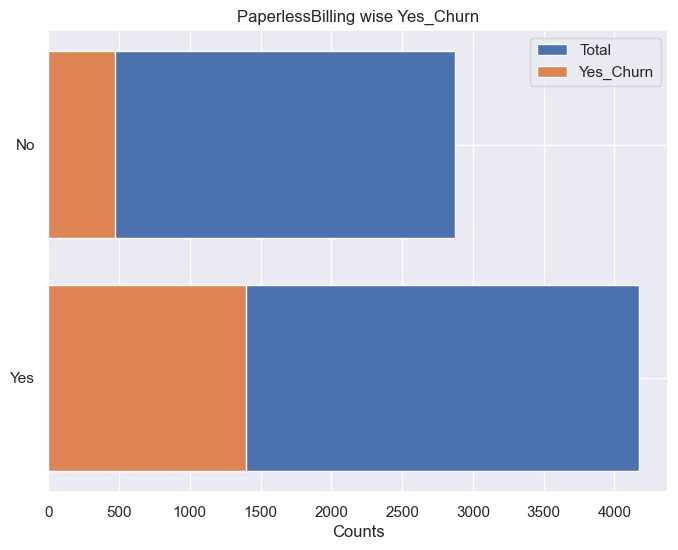

PaperlessBilling  Total_Count  % of Total  Yes_Churn  No_Churn  %Yes_Churn  \
1              Yes         4171   40.778078       1400      2771      33.565   
0               No         2872   59.221922        469      2403      16.330   

   %No_Churn  
1     66.435  
0     83.670

In [217]:
Univariate_Analysis1("PaperlessBilling")


Churn PaperlessBilling  count  count_norm
0    No               No   2403    0.836699
1    No              Yes   2771    0.664349
2   Yes               No    469    0.163301
3   Yes              Yes   1400    0.335651

<Axes: xlabel='PaperlessBilling'>

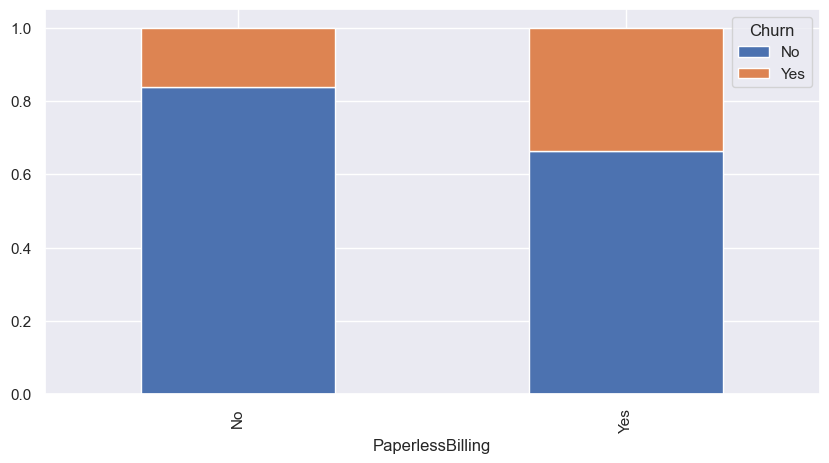

In [218]:
tmp = data1[["Churn", "PaperlessBilling"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "PaperlessBilling"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "PaperlessBilling==\""+row["PaperlessBilling"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="PaperlessBilling", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))



In [219]:
# Hypothesis testing on "PaperlessBilling" column
stat, p_val, dof = chi_sqred_ind_test(data1, "PaperlessBilling", "Churn", 0.05)

Contigency table: 
 Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400
Statistic: 258.27764906707307
P-value: 4.073354668665985e-58
DOF: 1
probability=0.950, critical=3.841, stat=258.278
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing PaymentMethod


In [221]:
data1["PaymentMethod"].value_counts()


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'PaymentMethod ratio Proposanate')

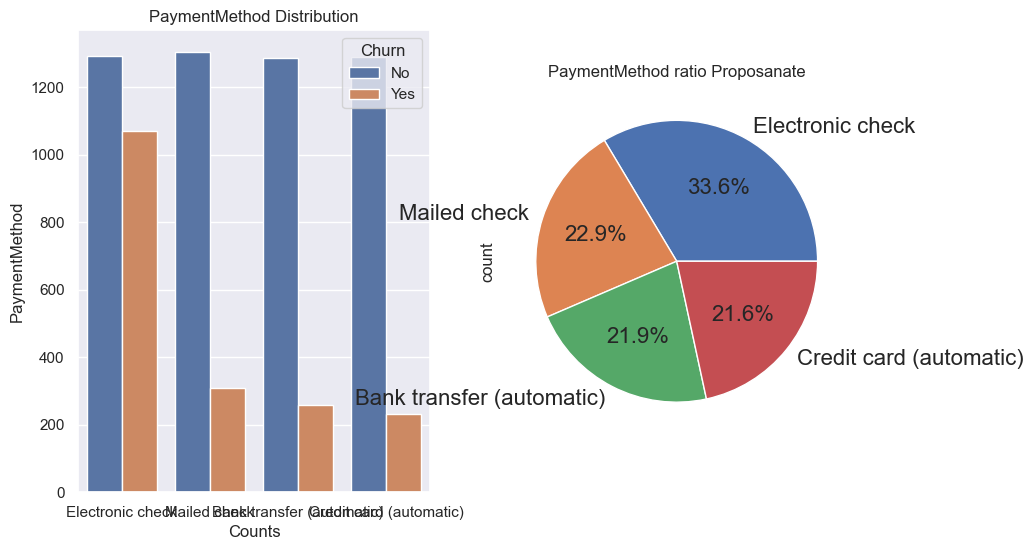

In [222]:
#  Distribution of "PaymentMethod"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="PaymentMethod", hue="Churn", data=data1)
plt.xlabel('Counts')
plt.ylabel('PaymentMethod')
plt.title('PaymentMethod Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['PaymentMethod'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('PaymentMethod ratio Proposanate')


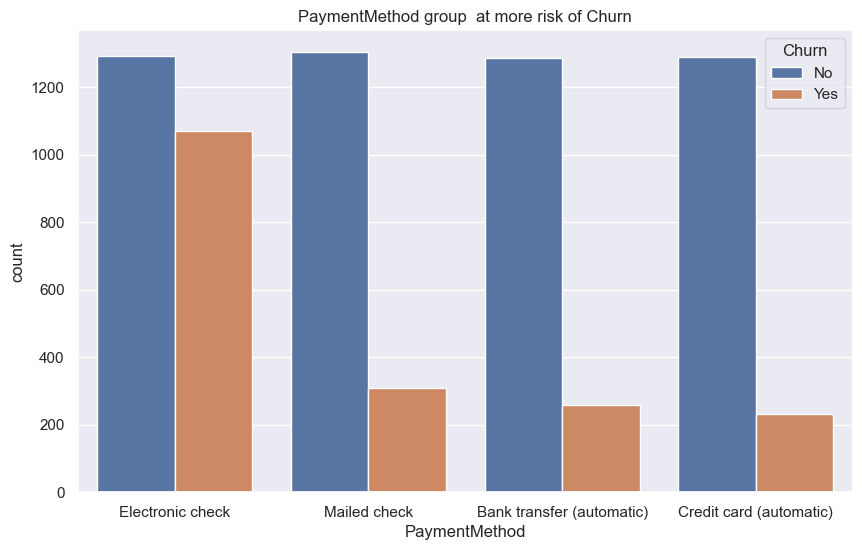

In [223]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['PaymentMethod'], hue = data1['Churn'], palette = sns.color_palette())
plt.title("PaymentMethod group  at more risk of Churn")
# plt.legend(['No Risk','At Risk'])
plt.show()


In [ ]:
CategoricalVariables_targetPlots(data1,"InternetService")


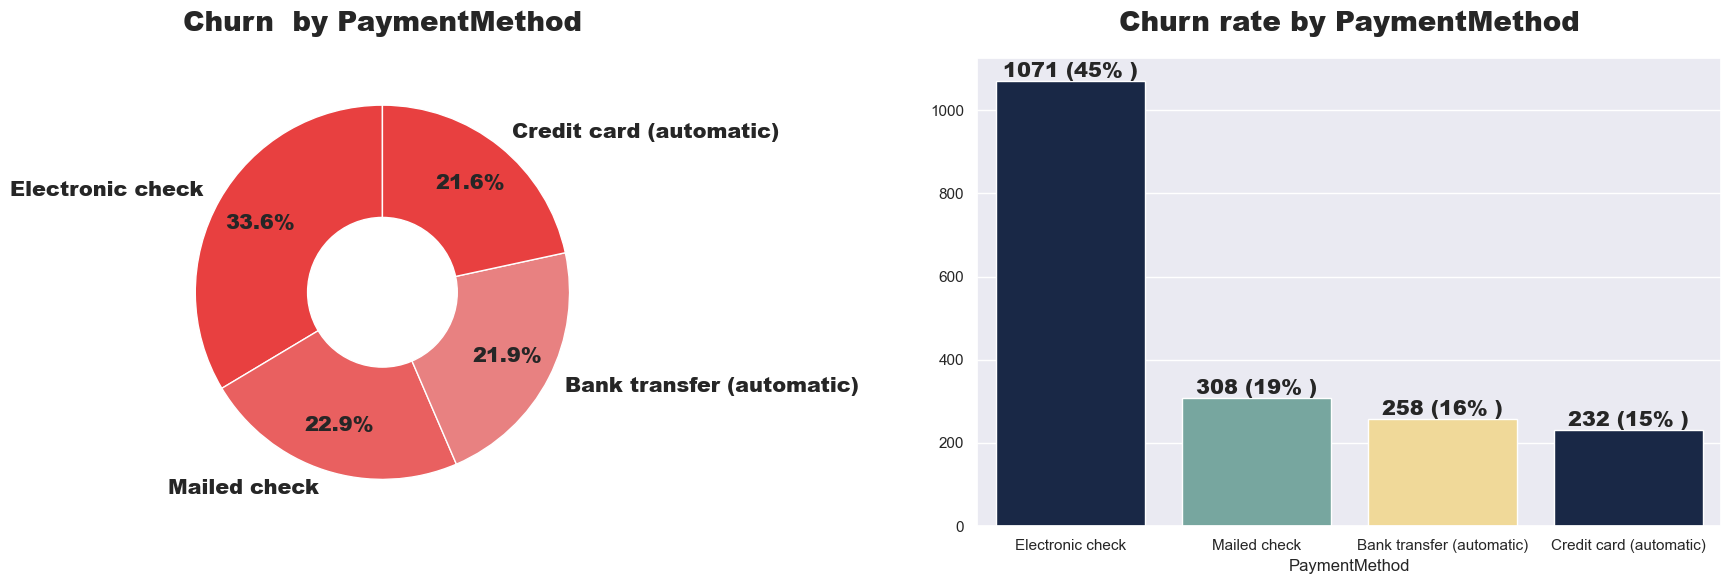

In [226]:
#Visualization to show Churn by PaymentMethod.
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
value_1 = data1["PaymentMethod"].value_counts()
plt.title("Churn  by PaymentMethod", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Churn Rate by PaymentMethod.
plt.subplot(1,2,2)
new_df = data1[data1["Churn"]=='Yes']
value_2 = new_df["PaymentMethod"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Churn rate by PaymentMethod",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

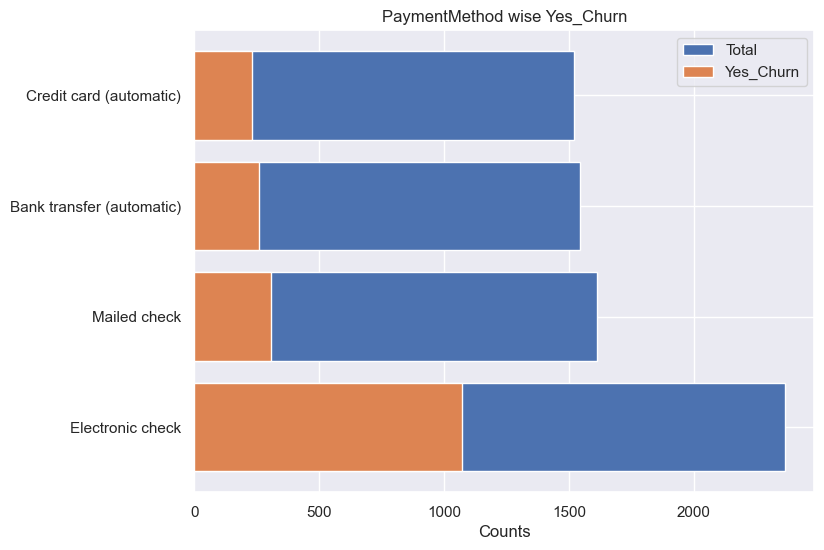

PaymentMethod  Total_Count  % of Total  Yes_Churn  No_Churn  \
2           Electronic check         2365   21.922476       1071      1294   
3               Mailed check         1612   21.610109        308      1304   
0  Bank transfer (automatic)         1544   33.579441        258      1286   
1    Credit card (automatic)         1522   22.887974        232      1290   

   %Yes_Churn  %No_Churn  
2      45.285     54.715  
3      19.107     80.893  
0      16.710     83.290  
1      15.243     84.757

In [225]:
Univariate_Analysis1("PaymentMethod")


Churn              PaymentMethod  count  count_norm
0    No  Bank transfer (automatic)   1286    0.832902
1    No    Credit card (automatic)   1290    0.847569
2    No           Electronic check   1294    0.547146
3    No               Mailed check   1304    0.808933
4   Yes  Bank transfer (automatic)    258    0.167098
5   Yes    Credit card (automatic)    232    0.152431
6   Yes           Electronic check   1071    0.452854
7   Yes               Mailed check    308    0.191067

<Axes: xlabel='PaymentMethod'>

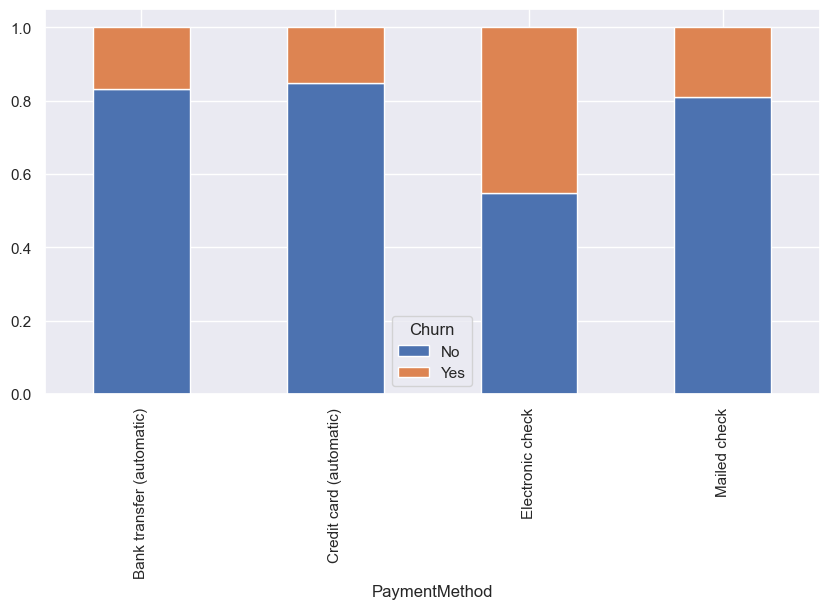

In [227]:
tmp = data1[["Churn", "PaymentMethod"]]
tmp["count"] = 1
tmp = tmp.groupby(["Churn", "PaymentMethod"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "PaymentMethod==\""+row["PaymentMethod"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="Churn", index="PaymentMethod", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))



In [228]:

# Hypothesis testing on "PaymentMethod" column
stat, p_val, dof = chi_sqred_ind_test(data1, "PaymentMethod", "Churn", 0.05)

Contigency table: 
 Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Statistic: 648.1423274814
P-value: 3.6823546520097993e-140
DOF: 3
probability=0.950, critical=7.815, stat=648.142
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Distribution of Data

In [232]:
# Separating the categorical and continous variable and storing them into different lists (excluding 'id')
categorical_variable=[]
continous_variable=[]

for i in data1.columns:
    if i == 'id':
        pass
    elif data1[i].nunique() <10:
        categorical_variable.append(i)
    elif data1[i].nunique() >= 10:
        continous_variable.append(i)

In [233]:
print(categorical_variable)
print("*"*50)
print(continous_variable)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
**************************************************
['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [235]:
data1.drop(["customerID", "id"], axis=1, inplace=True)

In [236]:
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: >

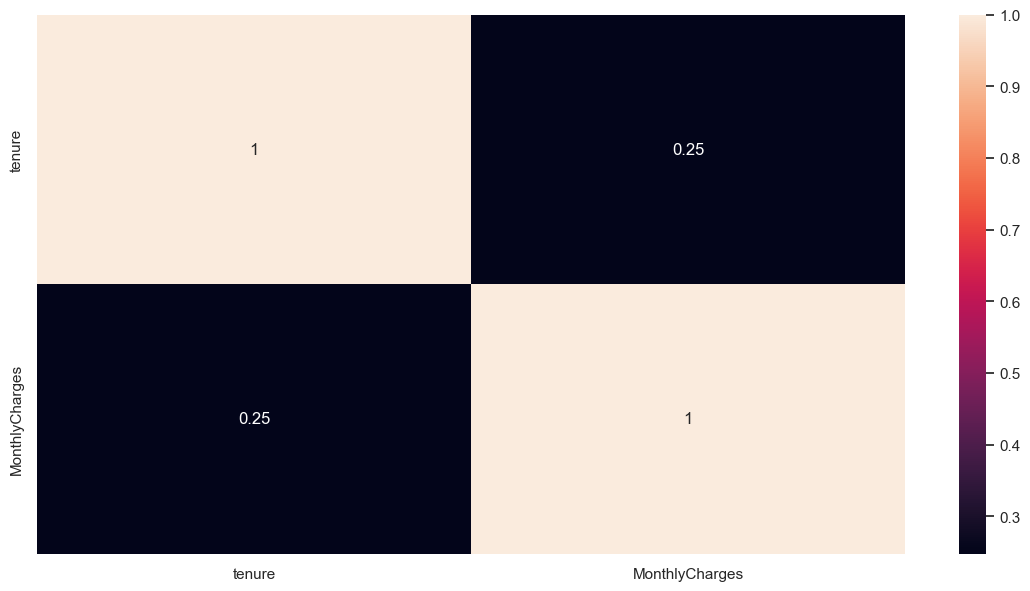

In [237]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,7))
correlation = data1.corr(numeric_only=True)
sns.heatmap(abs(correlation), annot=True)

<Axes: >

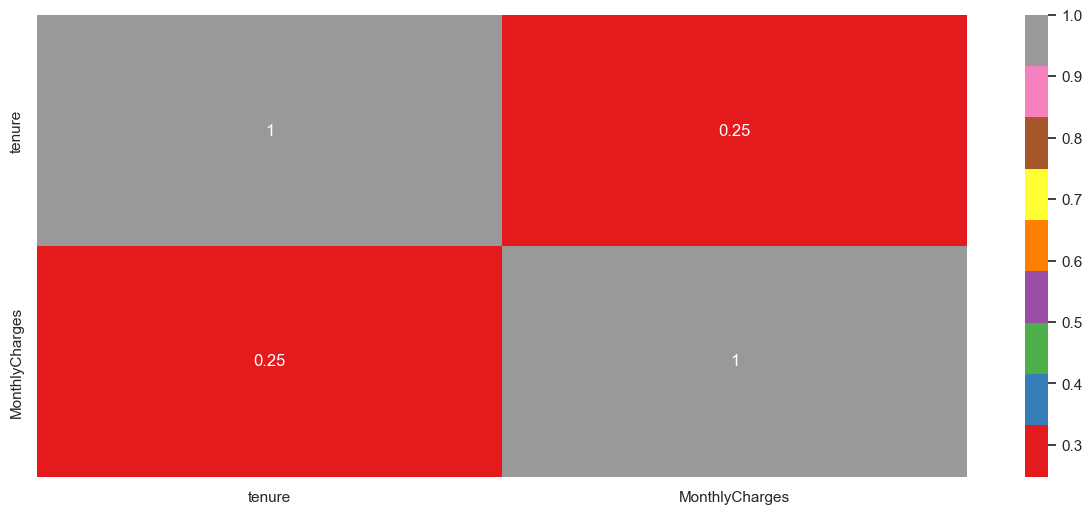

In [238]:
# Selecting our features wisely to avoid overfitting
# Correlation
plt.figure(figsize=(15,6))
sns.heatmap(data1.corr(numeric_only=True), annot=True, cmap=sns.color_palette("Set1"))

In [244]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [247]:
data1['TotalCharges'] = data1['TotalCharges'].replace(" ", np.nan)
data1 = data1[data1['TotalCharges'].notnull()]
data1 = data1.reset_index()[data1.columns]
data1['TotalCharges'] = data1['TotalCharges'].astype(float)

In [248]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# Hypothesis Test

## Perform t-test on Numerical Features

In [249]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']



t_score = {}
p_value = {}
Yes_mean = {}
Yes_std = {}
No_mean = {}
No_std = {}


for column in data1[numerical_columns]:
    statistics, p_val = stats.ttest_ind(data1[column][data1["Churn"]=="Yes"], 
                                     data1[column][data1["Churn"]==0], equal_var=True)
    print(f"t_score for {column} : {statistics}")
    print(f"p_value for {column} : {p_val}")
    
    Yes_mean[column] = data1[column][data1["Churn"]=="Yes"].mean()
    Yes_std[column] = data1[column][data1["Churn"]=="Yes"].std()
    No_mean[column] = data1[column][data1["Churn"]=="No"].mean()
    No_std[column] = data1[column][data1["Churn"]=="No"].std()
    t_score[column] = statistics
    p_value[column] = p_val


t_score for tenure : nan
p_value for tenure : nan
t_score for MonthlyCharges : nan
p_value for MonthlyCharges : nan
t_score for TotalCharges : nan
p_value for TotalCharges : nan


ValueError: cannot convert float NaN to integer

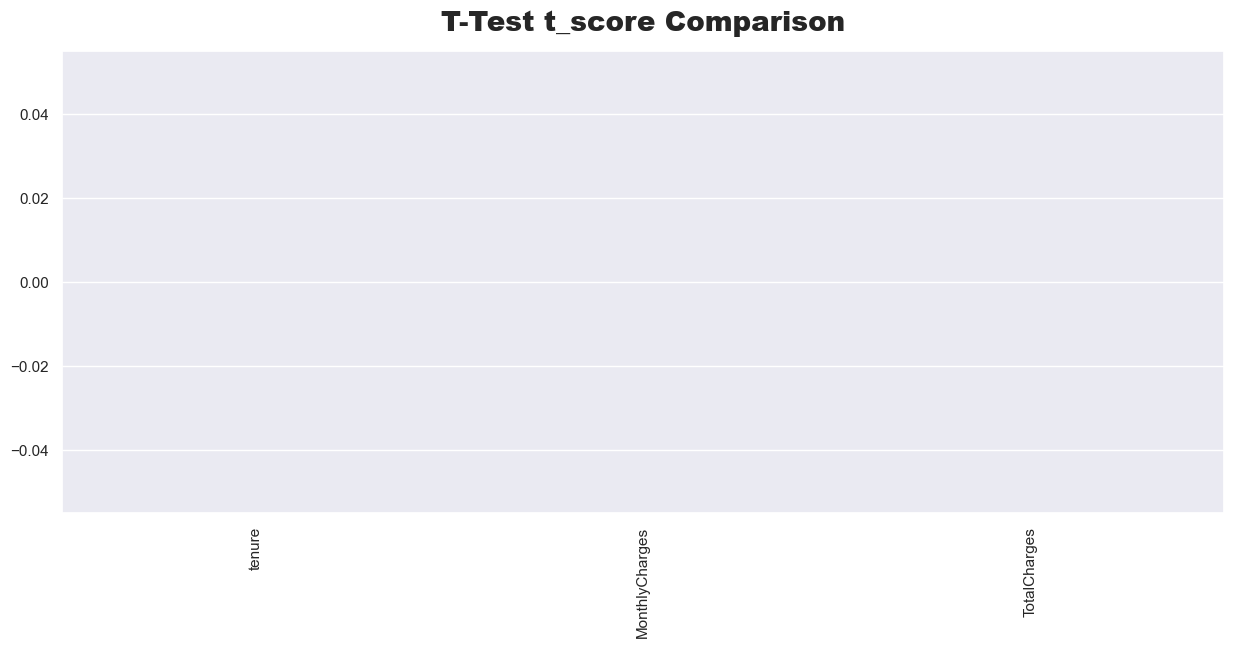

In [250]:
plt.figure(figsize=(15,6))
keys = list(t_score.keys())
values = list(t_score.values())

sns.barplot(x=keys, y=values)
plt.title("T-Test t_score Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

In [251]:
test_df = pd.DataFrame({"Features":keys,"T_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_value.values())]
test_df["Yes_mean"] = [format(i, '.4f') for i in list(Yes_mean.values())]
test_df["No_mean"] = [format(i, '.4f') for i in list(No_mean.values())]
test_df["Yes_std"] = [format(i, '.4f') for i in list(Yes_std.values())]
test_df["No_std"] = [format(i, '.4f') for i in list(No_std.values())]


test_df

Features  T_Score P_value   Yes_mean    No_mean    Yes_std     No_std
0          tenure      NaN     nan    17.9791    37.6500    19.5311    24.0769
1  MonthlyCharges      NaN     nan    74.4413    61.3074    24.6661    31.0946
2    TotalCharges      NaN     nan  1531.7961  2555.3441  1890.8230  2329.4570

## PERFORM CHI-SQUARE TEST ON CATEGORICAL FEATURES

In [252]:
data1.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [253]:
cat_cols = data1.select_dtypes(include="object").columns.tolist()
# cat_cols.remove("Accept(Y/N?)")
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [254]:
chi2_statistic = {}
p_values = {}
# dof = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(data1[col], data1['Churn'])
    chi2, p_value, dof, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value
#     dof[col] = dof

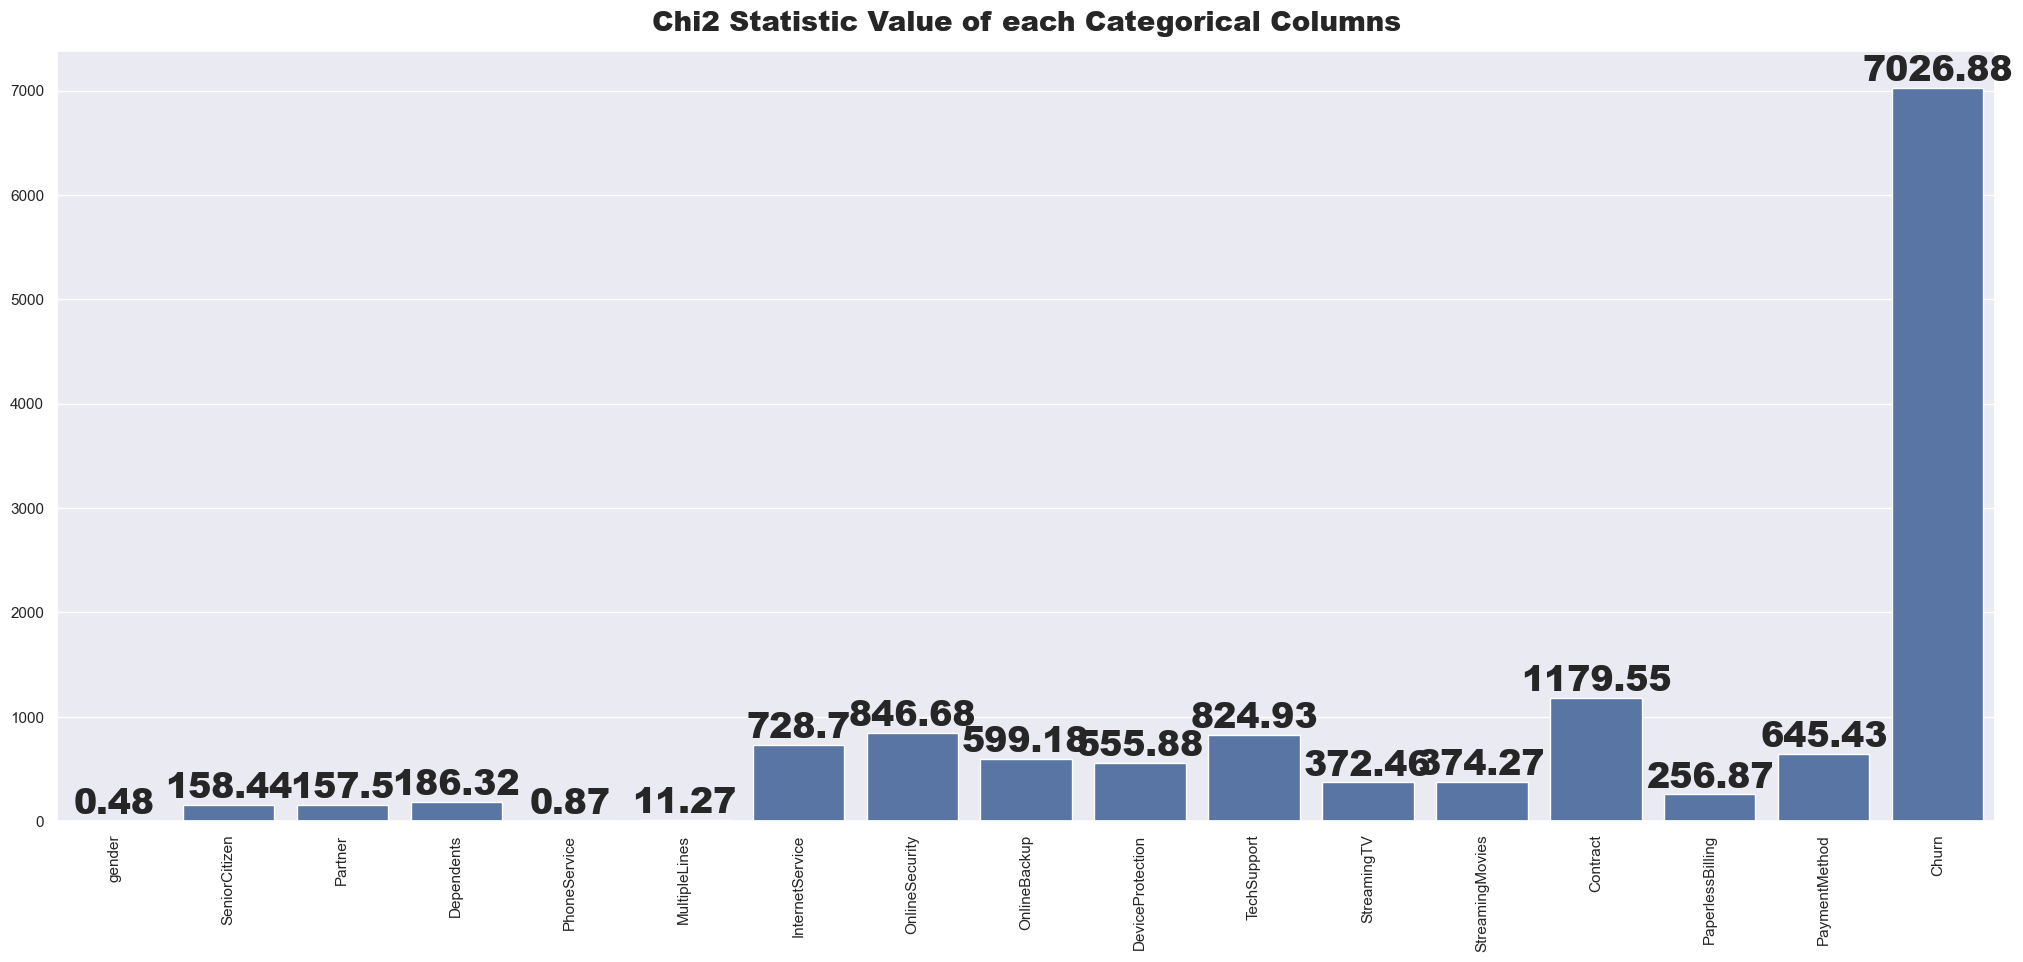

In [255]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(25, 10))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=25)

plt.show()


In [256]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
test_df

Features  Chi_2 Statistic                 P_value
0             gender         0.475455  0.49048847070655099412
1      SeniorCitizen       158.440816  0.00000000000000000000
2            Partner       157.503151  0.00000000000000000000
3         Dependents       186.321639  0.00000000000000000000
4       PhoneService         0.873733  0.34992398942431923725
5      MultipleLines        11.271541  0.00356792739998114047
6    InternetService       728.695614  0.00000000000000000000
7     OnlineSecurity       846.677389  0.00000000000000000000
8       OnlineBackup       599.175185  0.00000000000000000000
9   DeviceProtection       555.880327  0.00000000000000000000
10       TechSupport       824.925564  0.00000000000000000000
11       StreamingTV       372.456502  0.00000000000000000000
12   StreamingMovies       374.268432  0.00000000000000000000
13          Contract      1179.545829  0.00000000000000000000
14  PaperlessBilling       256.874908  0.00000000000000000000
15     PaymentMethod       645.429900  0.00000000000000000000
16             Churn      7026.876495  0.00000000000000000000

In [257]:
data1.shape

(7032, 20)

In [258]:
data1.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## Checking Feature Importance

In [264]:
data1.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [265]:
data1.drop(["gender", "PhoneService"], axis=1, inplace=True)
data1.head()

SeniorCitizen Partner Dependents  tenure     MultipleLines InternetService  \
0            No     Yes         No       1  No phone service             DSL   
1            No      No         No      34                No             DSL   
2            No      No         No       2                No             DSL   
3            No      No         No      45  No phone service             DSL   
4            No      No         No       2                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes

### Feature_importance in XGBClassifier

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)

# Print the feature importances
feature_importances = model.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)


In [ ]:
importances = model.feature_importances_
res = pd.Series(importances, index=x.columns).sort_values()
res.plot.barh(figsize=(8, 6), title='Feature importance')

In [269]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# Pre-Processing

## a) Class Distribution

In [5]:
Y_value_counts = data.groupby('Churn')['Churn'].count()
print('The number of costumers that are prone to the Churn is ',Y_value_counts[1],',',round(Y_value_counts[1]/data.shape[0]*100,3),'%')
print('The number of costumers that are not prone the Churn is ',Y_value_counts[0],',',round(Y_value_counts[0]/data.shape[0]*100,3),'%')

The number of costumers that are prone to the Churn is  1869 , 26.537 %
The number of costumers that are not prone the Churn is  5174 , 73.463 %


* Dataset is Imbalanced, so need to balance it.

## b) Duplicate Values Treatment

In [6]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the data : {data.duplicated().sum()}")
print("*"*100)
dups = data.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data[dups]

The total number of duplicated observations in the data : 0
****************************************************************************************************
No of duplicate rows = 0


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [7]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {data.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


## c) Dropping Columns

In [8]:
# Missing values
print("Is there any missing value present or not ?", data.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = data.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = data.isnull().sum()/len(data)*100
print(missing_percentage.sort_values(ascending=False))

Is there any missing value present or not ? False
**************************************************************************
Number of missing values
-------------------------------------
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.

In [9]:
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Empty DataFrame
Columns: [missing_count, missing_percentage]
Index: []

* Column id will be dropped as it gives nothing for modelling purposes.

In [10]:
data.corr(numeric_only=True)

SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000

In [11]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# Dropping unwanted columns
data = data.drop(["customerID", "gender", "PhoneService"], axis=1)
print('data:',data.shape)
print('-'*50)
print(data.columns.values)

data: (7043, 18)
--------------------------------------------------
['SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'MultipleLines'
 'InternetService' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'Contract'
 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges' 'TotalCharges'
 'Churn']


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   object 


In [14]:
data["TotalCharges"].value_counts()

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
20.15       6
20.25       6
19.45       6
20.3        5
20.45       5
19.85       4
69.9        4
20.4        4
70.6        4
19.2        4
69.65       4
44          4
44.4        4
20.5        4
49.9        4
74.7        4
19.3        4
19.95       4
19.5        4
75.3        4
50.15       4
20.35       4
69.6        4
19.4        4
69.95       4
19.25       3
70.45       3
1284.2      3
69.25       3
74.3        3
20.9        3
220.45      3
20.55       3
69.1        3
20.1        3
305.55      3
50.6        3
74.6        3
20          3
45.85       3
44.75       3
70.15       3
75.35       3
19.1        3
74.9        3
86.05       3
79.55       3
74.35       3
35.9        3
24.4        3
45.7        3
2317.1      3
383.65      3
50.75       3
25.25       3
55.7        3
45.1        3
84.5        3
85          3
50.45       3
80.55       3
70.3        3
24.8   

In [15]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)
data = data[data['TotalCharges'].notnull()]
data = data.reset_index()[data.columns]
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   MultipleLines     7032 non-null   object 
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          7032 non-null   object 
 13  PaperlessBilling  7032 non-null   object 
 14  PaymentMethod     7032 non-null   object 
 15  MonthlyCharges    7032 non-null   float64
 16  TotalCharges      7032 non-null   float64


In [17]:
data["TotalCharges"].value_counts()


TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
19.55       7
45.30       7
19.45       6
20.25       6
20.15       6
20.45       5
20.30       5
70.60       4
74.70       4
69.90       4
19.30       4
69.60       4
19.40       4
19.20       4
19.95       4
19.85       4
20.50       4
20.40       4
44.40       4
44.00       4
69.95       4
75.30       4
50.15       4
49.90       4
20.35       4
69.65       4
19.50       4
45.85       3
69.10       3
220.45      3
74.60       3
20.90       3
1284.20     3
2317.10     3
74.30       3
69.25       3
20.55       3
19.25       3
50.60       3
44.75       3
75.35       3
79.55       3
19.10       3
20.00       3
35.90       3
74.35       3
86.05       3
74.90       3
70.15       3
24.40       3
20.10       3
70.45       3
305.55      3
45.70       3
50.45       3
85.00       3
84.50       3
55.70       3
25.25       3
85.50       3
50.75       3
69.55       3
45.10       3
70.10       3
24.80       3
470.20 

## d ) Splitting The dataset into Independent and Dependent variables

In [18]:
x = data.drop(["Churn"], axis=1)
y = data["Churn"]

In [19]:
print(x.shape)
print(y.shape)

(7032, 17)
(7032,)


In [20]:
x.head()

SeniorCitizen Partner Dependents  tenure     MultipleLines InternetService  \
0              0     Yes         No       1  No phone service             DSL   
1              0      No         No      34                No             DSL   
2              0      No         No       2                No             DSL   
3              0      No         No      45  No phone service             DSL   
4              0      No         No       2                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges  TotalCharges  
0           29.85         29.85  
1           56.95       1889.50  
2           53.85        108.15  
3           42.30       1840.75  
4           70.70        151.65

## e) Splitting The Dataset into Train and Test

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=101)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5274, 17) (5274,)
(1758, 17) (1758,)


In [22]:
print("Class Distribution on data :")
print(data["Churn"].value_counts()/data.shape[0]*100)
print("*******************************************")
print(f"Class Distribution on y_train : \n{y_train.value_counts()/y_train.shape[0]*100}")
print("*******************************************")
print(f"Class Distribution on y_test : \n{y_test.value_counts()/y_test.shape[0]*100}")

Class Distribution on data :
Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64
*******************************************
Class Distribution on y_train : 
Churn
No     73.416761
Yes    26.583239
Name: count, dtype: float64
*******************************************
Class Distribution on y_test : 
Churn
No     73.435722
Yes    26.564278
Name: count, dtype: float64


## f) Missing Value Impution

In [23]:
# Checking missing values in data
# Missing values
print("Is there any missing value present or not ?", data.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = data.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = data.isnull().sum()/len(data)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for i in categorical_features:
    print(f"{i} : {data1[i].unique()}")
    print(data1[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
for i in numerical_features:
    print(f"{i} : {data1[i].unique()}")
    print(f"Mean : {data1[i].mean()}")
    print(f"Median : {data1[i].median()}")
    print(f"Standard Deviation : {data1[i].std()}")
    Q1 = data1[i].quantile(0.25)
    Q3 = data1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = data1[i][((data1[i]<(Q1-1.5*IQR)) | (data1[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {data1[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {data1[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? False
**************************************************************************
Number of missing values
-------------------------------------
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
SeniorCitizen       0.0
Partner             0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
DeviceProtection

NameError: name 'data1' is not defined

In [ ]:
# Checking missing values in x_train
# Missing values
print("Is there any missing value present or not ?", x_train.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_train.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_train.isnull().sum()/len(x_train)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_train.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")


In [ ]:
# Checking missing values in x_test
# Missing values
print("Is there any missing value present or not ?", x_test.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_test.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_test.isnull().sum()/len(x_test)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_test.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")


In [ ]:
for i in x_train.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(x_train[i].tolist()))
    print()

In [ ]:
for i in x_test.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(x_test[i].tolist()))
    print()

## g) Data Encoding

In [24]:
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(drop_last=True)
x_train = ohe_enc.fit_transform(x_train)
x_test = ohe_enc.transform(x_test)
# x_train_enc.head()

In [25]:
x_train.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Partner_Yes  \
1317              0      60           65.85       3928.30            1   
5995              0      67           84.80       5598.30            1   
1824              0       8           74.85        572.45            0   
4677              0      46          108.90       4854.30            1   
5644              0       7           79.00        522.95            0   

      Dependents_Yes  MultipleLines_No  MultipleLines_Yes  \
1317               1                 1                  0   
5995               1                 1                  0   
1824               0                 0                  1   
4677               0                 0                  1   
5644               0                 1                  0   

      InternetService_DSL  InternetService_Fiber optic  OnlineSecurity_Yes  \
1317                    1                            0                   1   
5995                    0                            1                   1   
1824                    0                            1                   0   
4677                    0                            1                   0   
5644                    0                            1                   0   

      OnlineSecurity_No  OnlineBackup_Yes  OnlineBackup_No  \
1317                  0                 1                0   
5995                  0                 1                0   
1824                  1                 0                1   
4677                  1                 1                0   
5644                  1                 0                1   

      DeviceProtection_Yes  DeviceProtection_No  TechSupport_Yes  \
1317                     1                    0                1   
5995                     1                    0                0   
1824                     0                    1                0   
4677                     1                    0                1   
5644                     0                    1                0   

      TechSupport_No  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
1317               0               1                0                   1   
5995               1               1                0                   1   
1824               1               1                0                   1   
4677               0               0                1                   0   
5644               1               0                1                   1   

      StreamingMovies_Yes  Contract_One year  Contract_Month-to-month  \
1317                    0                  1                        0   
5995                    0                  1                        0   
1824                    0                  0                        1   
4677                    1                  0                        0   
5644                    0                  0                        1   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
1317                     1                                        1   
5995                     0                                        1   
1824                     1                                        0   
4677                     1                                        0   
5644                     1                                        0   

      PaymentMethod_Electronic check  PaymentMethod_Credit card (automatic)  
1317                               0                                      0  
5995                               0                                      0  
1824                               1                                      0  
4677                               0                                      1  
5644                               1                                      0

In [26]:
x_test.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Partner_Yes  \
5993              0       6           82.85        460.25            1   
2976              0      67           20.50       1430.95            0   
6972              0      23           83.20       2032.30            0   
3069              0      35           59.45       2136.90            1   
904               0       4           56.40        234.85            0   

      Dependents_Yes  MultipleLines_No  MultipleLines_Yes  \
5993               0                 0                  1   
2976               0                 1                  0   
6972               0                 1                  0   
3069               1                 0                  1   
904                0                 1                  0   

      InternetService_DSL  InternetService_Fiber optic  OnlineSecurity_Yes  \
5993                    0                            1                   0   
2976                    0                            0                   0   
6972                    0                            1                   0   
3069                    1                            0                   1   
904                     1                            0                   0   

      OnlineSecurity_No  OnlineBackup_Yes  OnlineBackup_No  \
5993                  1                 0                1   
2976                  0                 0                0   
6972                  1                 1                0   
3069                  0                 1                0   
904                   1                 0                1   

      DeviceProtection_Yes  DeviceProtection_No  TechSupport_Yes  \
5993                     0                    1                0   
2976                     0                    0                0   
6972                     1                    0                1   
3069                     0                    1                0   
904                      0                    1                0   

      TechSupport_No  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
5993               1               0                1                   1   
2976               0               0                0                   0   
6972               0               1                0                   1   
3069               1               1                0                   1   
904                1               0                1                   1   

      StreamingMovies_Yes  Contract_One year  Contract_Month-to-month  \
5993                    0                  0                        1   
2976                    0                  0                        0   
6972                    0                  0                        1   
3069                    0                  0                        1   
904                     0                  0                        1   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
5993                     1                                        0   
2976                     0                                        1   
6972                     0                                        1   
3069                     1                                        0   
904                      1                                        0   

      PaymentMethod_Electronic check  PaymentMethod_Credit card (automatic)  
5993                               1                                      0  
2976                               0                                      0  
6972                               0                                      0  
3069                               0                                      1  
904                                1                                      0

In [27]:
y_train.value_counts()

Churn
No     3872
Yes    1402
Name: count, dtype: int64

In [28]:
y_test.value_counts()

Churn
No     1291
Yes     467
Name: count, dtype: int64

In [29]:
y_train = y_train.replace({'Yes':1, "No":0})
y_test = y_test.replace({'Yes':1, "No":0})


In [30]:
print(y_train.value_counts())
print("*"*50)
y_test.value_counts()

Churn
0    3872
1    1402
Name: count, dtype: int64
**************************************************


Churn
0    1291
1     467
Name: count, dtype: int64

## i) Data Scaling

In [31]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
x_train[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(x_train[["tenure", "MonthlyCharges", "TotalCharges"]])
x_test[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.transform(x_test[["tenure", "MonthlyCharges", "TotalCharges"]])

In [32]:
x_train.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Partner_Yes  \
1317              0  1.128470        0.029179      0.724680            1   
5995              0  1.413656        0.659201      1.460259            1   
1824              0 -0.990056        0.328398     -0.753458            0   
4677              0  0.558098        1.460442      1.132552            1   
5644              0 -1.030797        0.466371     -0.775261            0   

      Dependents_Yes  MultipleLines_No  MultipleLines_Yes  \
1317               1                 1                  0   
5995               1                 1                  0   
1824               0                 0                  1   
4677               0                 0                  1   
5644               0                 1                  0   

      InternetService_DSL  InternetService_Fiber optic  OnlineSecurity_Yes  \
1317                    1                            0                   1   
5995                    0                            1                   1   
1824                    0                            1                   0   
4677                    0                            1                   0   
5644                    0                            1                   0   

      OnlineSecurity_No  OnlineBackup_Yes  OnlineBackup_No  \
1317                  0                 1                0   
5995                  0                 1                0   
1824                  1                 0                1   
4677                  1                 1                0   
5644                  1                 0                1   

      DeviceProtection_Yes  DeviceProtection_No  TechSupport_Yes  \
1317                     1                    0                1   
5995                     1                    0                0   
1824                     0                    1                0   
4677                     1                    0                1   
5644                     0                    1                0   

      TechSupport_No  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
1317               0               1                0                   1   
5995               1               1                0                   1   
1824               1               1                0                   1   
4677               0               0                1                   0   
5644               1               0                1                   1   

      StreamingMovies_Yes  Contract_One year  Contract_Month-to-month  \
1317                    0                  1                        0   
5995                    0                  1                        0   
1824                    0                  0                        1   
4677                    1                  0                        0   
5644                    0                  0                        1   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
1317                     1                                        1   
5995                     0                                        1   
1824                     1                                        0   
4677                     1                                        0   
5644                     1                                        0   

      PaymentMethod_Electronic check  PaymentMethod_Credit card (automatic)  
1317                               0                                      0  
5995                               0                                      0  
1824                               1                                      0  
4677                               0                                      1  
5644                               1                                      0

In [33]:
x_test.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Partner_Yes  \
5993              0 -1.071538        0.594370     -0.802879            1   
2976              0  1.413656       -1.478552     -0.375318            0   
6972              0 -0.378943        0.606006     -0.110444            0   
3069              0  0.109948       -0.183599     -0.064371            1   
904               0 -1.153020       -0.285001     -0.902160            0   

      Dependents_Yes  MultipleLines_No  MultipleLines_Yes  \
5993               0                 0                  1   
2976               0                 1                  0   
6972               0                 1                  0   
3069               1                 0                  1   
904                0                 1                  0   

      InternetService_DSL  InternetService_Fiber optic  OnlineSecurity_Yes  \
5993                    0                            1                   0   
2976                    0                            0                   0   
6972                    0                            1                   0   
3069                    1                            0                   1   
904                     1                            0                   0   

      OnlineSecurity_No  OnlineBackup_Yes  OnlineBackup_No  \
5993                  1                 0                1   
2976                  0                 0                0   
6972                  1                 1                0   
3069                  0                 1                0   
904                   1                 0                1   

      DeviceProtection_Yes  DeviceProtection_No  TechSupport_Yes  \
5993                     0                    1                0   
2976                     0                    0                0   
6972                     1                    0                1   
3069                     0                    1                0   
904                      0                    1                0   

      TechSupport_No  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
5993               1               0                1                   1   
2976               0               0                0                   0   
6972               0               1                0                   1   
3069               1               1                0                   1   
904                1               0                1                   1   

      StreamingMovies_Yes  Contract_One year  Contract_Month-to-month  \
5993                    0                  0                        1   
2976                    0                  0                        0   
6972                    0                  0                        1   
3069                    0                  0                        1   
904                     0                  0                        1   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
5993                     1                                        0   
2976                     0                                        1   
6972                     0                                        1   
3069                     1                                        0   
904                      1                                        0   

      PaymentMethod_Electronic check  PaymentMethod_Credit card (automatic)  
5993                               1                                      0  
2976                               0                                      0  
6972                               0                                      0  
3069                               0                                      1  
904                                1                                      0

In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 1317 to 4584
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5274 non-null   int64  
 1   tenure                                   5274 non-null   float64
 2   MonthlyCharges                           5274 non-null   float64
 3   TotalCharges                             5274 non-null   float64
 4   Partner_Yes                              5274 non-null   int32  
 5   Dependents_Yes                           5274 non-null   int32  
 6   MultipleLines_No                         5274 non-null   int32  
 7   MultipleLines_Yes                        5274 non-null   int32  
 8   InternetService_DSL                      5274 non-null   int32  
 9   InternetService_Fiber optic              5274 non-null   int32  
 10  OnlineSecurity_Yes                       5274 non-

In [35]:
x_train.shape

(5274, 28)

## j) Handling Imbalanced Dataset

In [36]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())
     

Distribution of classes of dependent variable in train :
Churn
0    3872
1    1402
Name: count, dtype: int64
Distribution of classes of dependent variable in test :
Churn
0    1291
1     467
Name: count, dtype: int64


##### Balancing by SMOTE

In [37]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the training data 
smote_train = SMOTE(sampling_strategy='minority', random_state=0)
x_train, y_train = smote_train.fit_resample(x_train, y_train)



# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_train,'After'], [y_test, 'After']]:
    print(label+' Handling Class Imbalace:')
    print(col.value_counts(), "\n")

Before Handling Class Imbalace:
Churn
No     5163
Yes    1869
Name: count, dtype: int64 

After Handling Class Imbalace:
Churn
0    3872
1    3872
Name: count, dtype: int64 

After Handling Class Imbalace:
Churn
0    1291
1     467
Name: count, dtype: int64 



In [38]:
y_train.value_counts()

Churn
0    3872
1    3872
Name: count, dtype: int64

# ML Model Implementation

In [39]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):
    
    '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

    # Fitting the model
    model.fit(x_train,y_train)

    # Finding best parameters
    try:
        print(f"The best parameters are: {model.best_params_}")
    except:
        pass

    # Plotting Evaluation Metrics for train and test dataset
    for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):
        
        # Getting required metrics
        pred = model.predict(x)
        pred_proba = model.predict_proba(x)[:,1]
        report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
        fpr, tpr, thresholds = roc_curve(act, pred_proba)

        # Classification report
        plt.figure(figsize=(18,3))
        plt.subplot(1,3,1)
        sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
        plt.title(f'{label} Classification Report')

        # Confusion Matrix
        plt.subplot(1,3,2)
        matrix= confusion_matrix(y_true=act, y_pred=pred)
        sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
        plt.title(f'{label} Confusion Matrix')
        plt.xlabel('Predicted labels')
        plt.ylabel('Actual labels')
    
        # AUC_ROC Curve
        plt.subplot(1,3,3)
        plt.plot([0,1],[0,1],'k--')
        plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
        plt.legend(loc=4)
        plt.title(f'{label} AUC_ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.tight_layout()
        

    plt.show()

    return model

## Using Smote

## 1) ML Model - 1 Logistic Regression

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [40]:
y_pred_test = []
for i in range(len(y_test)):
    r = np.random.random()
    if r<0.5:
        y_pred_test.append(0)
    else:
        y_pred_test.append(1)

print("log_loss on Test Data using Random Model is",log_loss(y_test,y_pred_test))
print("roc_auc_score on Test Data using Random Model is",roc_auc_score(y_test,y_pred_test))

log_loss on Test Data using Random Model is 17.939816106642493
roc_auc_score on Test Data using Random Model is 0.5135081116674987


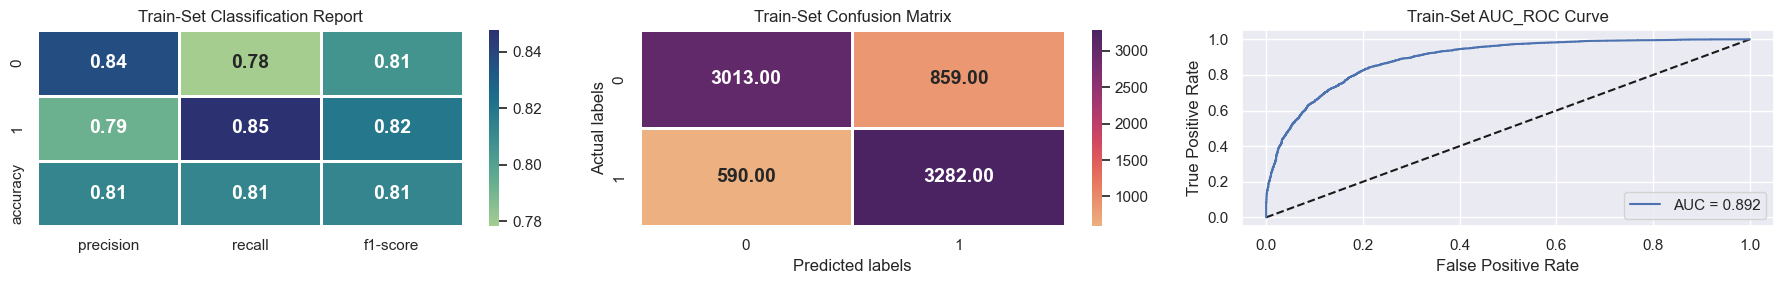

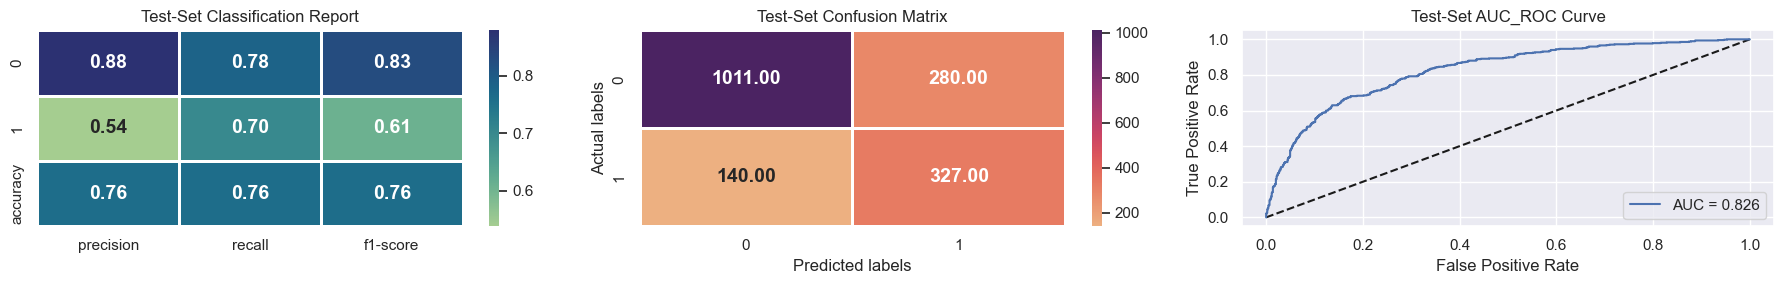

LogisticRegression(random_state=0)

In [47]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier_smote = LogisticRegression(fit_intercept=True, penalty='l2',random_state=0)
analyse_model(logistic_classifier_smote, x_train, x_test, y_train, y_test)

The best parameters are: {'solver': 'liblinear', 'penalty': 'l1', 'n_jobs': -1, 'multi_class': 'auto', 'max_iter': 4951, 'fit_intercept': False, 'dual': False, 'C': 500}


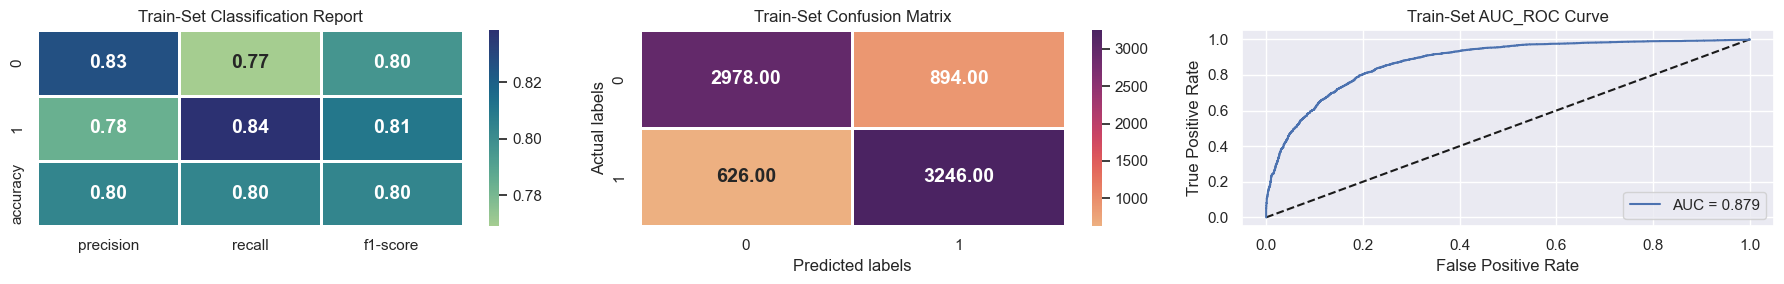

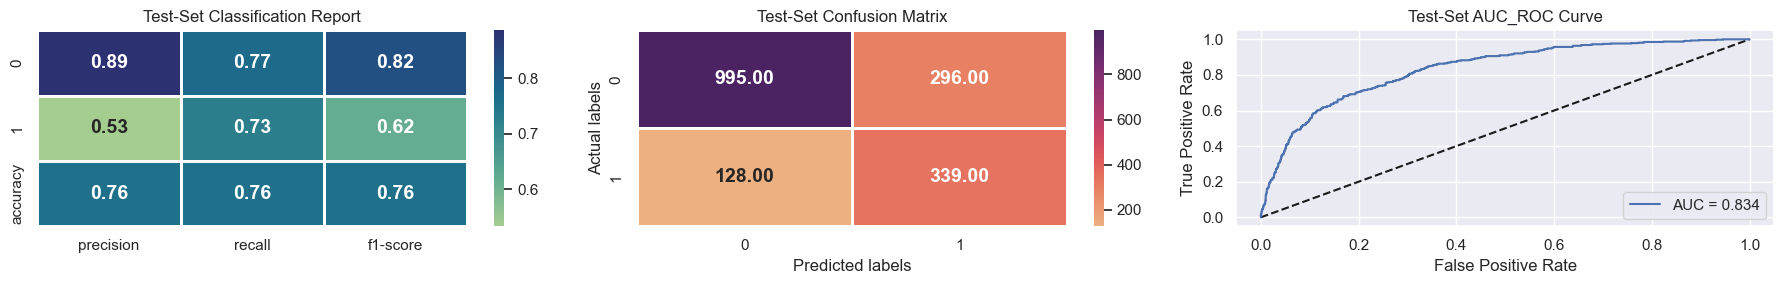

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 500],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1, 11, 21, 31, 41, 51, 61,
                                                     71, 81, 91, 101, 111, 121,
                                                     131, 141, 151, 161, 171,
                                                     181, 191, 201, 211, 221,
                                                     231, 241, 251, 261, 271,
                                                     281, 291, ...],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [-1],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='precision')

In [327]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {'C':[0.01, 0.1, 1, 10, 100, 500],
             "penalty" : ["l1", "l2", "elasticnet", None],
             "dual" : [True, False],
             "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
             "max_iter" : [i for i in range(1,5000,10)],
             "fit_intercept" : [True, False],
             "multi_class" : ["auto", "ovr", "multinomial"], "n_jobs" : [-1]}

# Fitting LogisticRegression Model with GridSearchCV
LR_grid_classifier_smote = RandomizedSearchCV(logistic_classifier_smote, parameters,  scoring = 'precision', cv=5)

# Analysing the model
analyse_model(LR_grid_classifier_smote, x_train, x_test, y_train, y_test)

The best parameters are: {'solver': 'saga', 'penalty': 'l2', 'n_jobs': -1, 'multi_class': 'auto', 'max_iter': 651, 'fit_intercept': True, 'dual': False, 'C': 500}


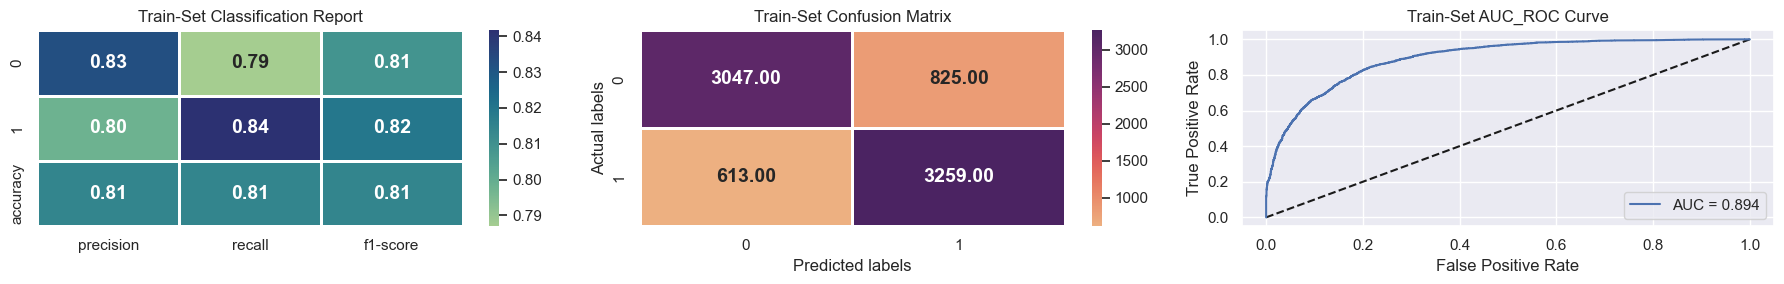

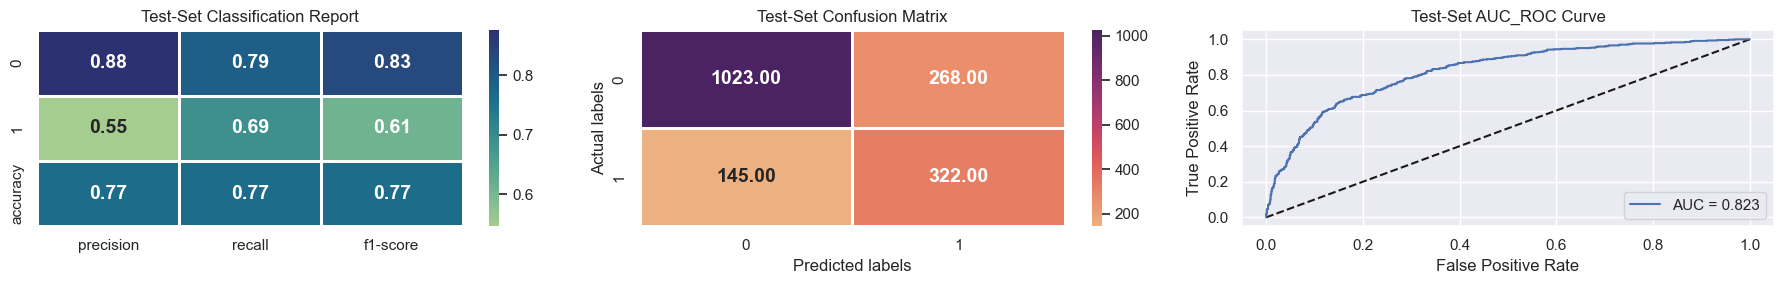

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 500],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1, 11, 21, 31, 41, 51, 61,
                                                     71, 81, 91, 101, 111, 121,
                                                     131, 141, 151, 161, 171,
                                                     181, 191, 201, 211, 221,
                                                     231, 241, 251, 261, 271,
                                                     281, 291, ...],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [-1],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   refit='precision', scoring=['recall', 'precision'])

In [328]:

# Defining parameters
parameters = {'C':[0.01, 0.1, 1, 10, 100, 500],
             "penalty" : ["l1", "l2", "elasticnet", None],
             "dual" : [True, False],
             "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
             "max_iter" : [i for i in range(1,5000,10)],
             "fit_intercept" : [True, False],
             "multi_class" : ["auto", "ovr", "multinomial"], "n_jobs" : [-1]}

# Fitting LogisticRegression Model with GridSearchCV
LR_grid_classifier_smote = RandomizedSearchCV(logistic_classifier_smote, parameters, refit='precision', scoring = ['recall', 'precision'], cv=5)

# Analysing the model
analyse_model(LR_grid_classifier_smote, x_train, x_test, y_train, y_test)

In [ ]:
{'solver': 'saga', 'penalty': 'l2', 'n_jobs': -1, 'multi_class': 'auto', 'max_iter': 651, 'fit_intercept': True, 'dual': False, 'C': 500}

Confusion matrix (train)
[[3047  825]
 [ 613 3259]]
********************************************************************
Confusion matrix (test)
[[1023  268]
 [ 145  322]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3872
           1       0.80      0.84      0.82      3872

    accuracy                           0.81      7744
   macro avg       0.82      0.81      0.81      7744
weighted avg       0.82      0.81      0.81      7744

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1291
           1       0.55      0.69      0.61       467

    accuracy                           0.77      1758
   macro avg       0.71      0.74      0.72      1758
weighted avg       0.79      0

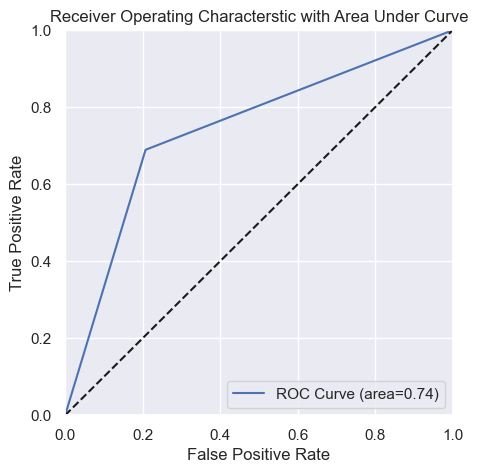

In [45]:
from sklearn.linear_model import LogisticRegression
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


LR_grid_classifier_smote = LogisticRegression(solver='saga', penalty='l2', n_jobs=-1, multi_class='auto', max_iter=651, fit_intercept=True, dual=False, C=500)
LR_grid_classifier_smote.fit(x_train, y_train)

# Predict Result
y_predict_train = LR_grid_classifier_smote.predict(x_train)
y_predict_test = LR_grid_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(LR_grid_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

## ML Model - 3 Decision Treee

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

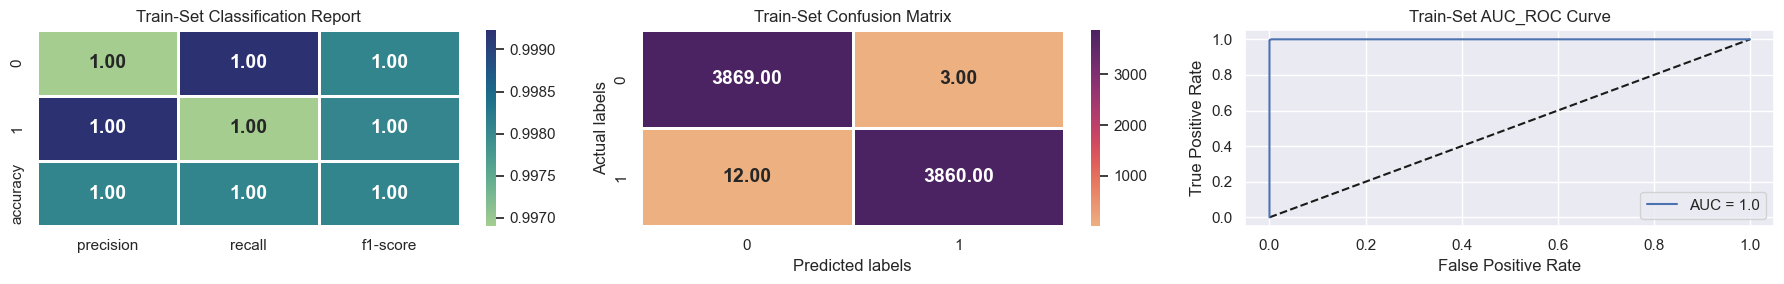

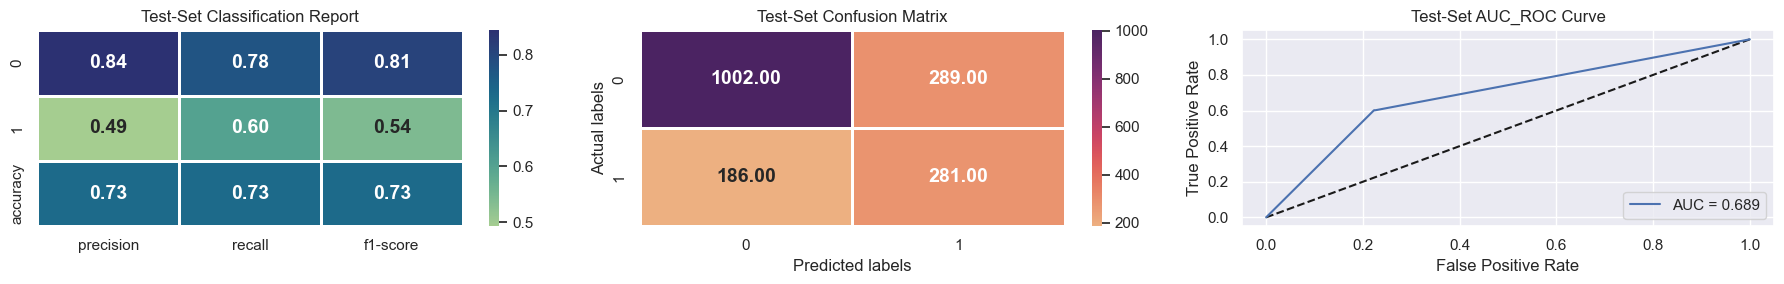

DecisionTreeClassifier(random_state=0)

In [48]:
# Importing RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Fitting RandomForestClassifier Model
DT_classifier_smote = DecisionTreeClassifier(random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(DT_classifier_smote, x_train, x_test, y_train, y_test)

The best parameters are: {'splitter': 'best', 'random_state': 101, 'min_samples_split': 141, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 113, 'criterion': 'gini'}


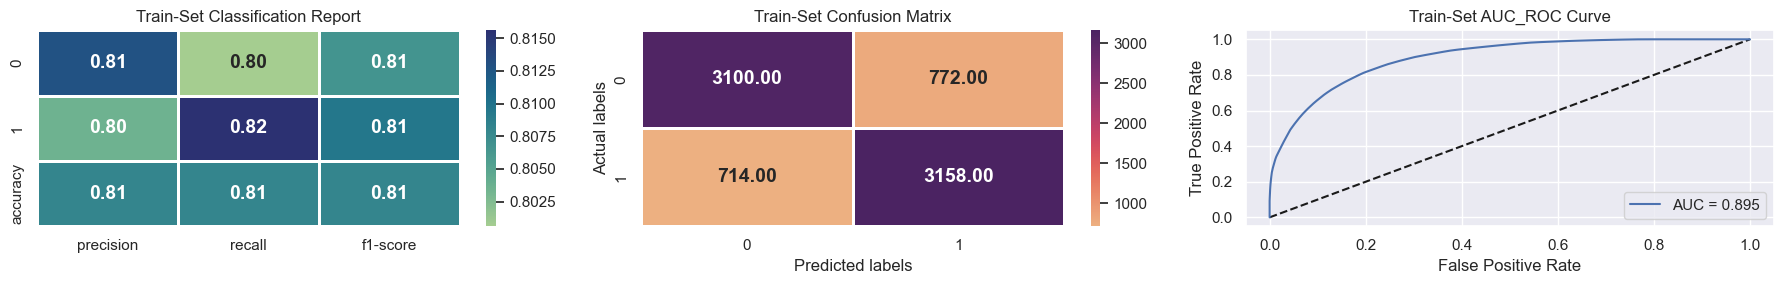

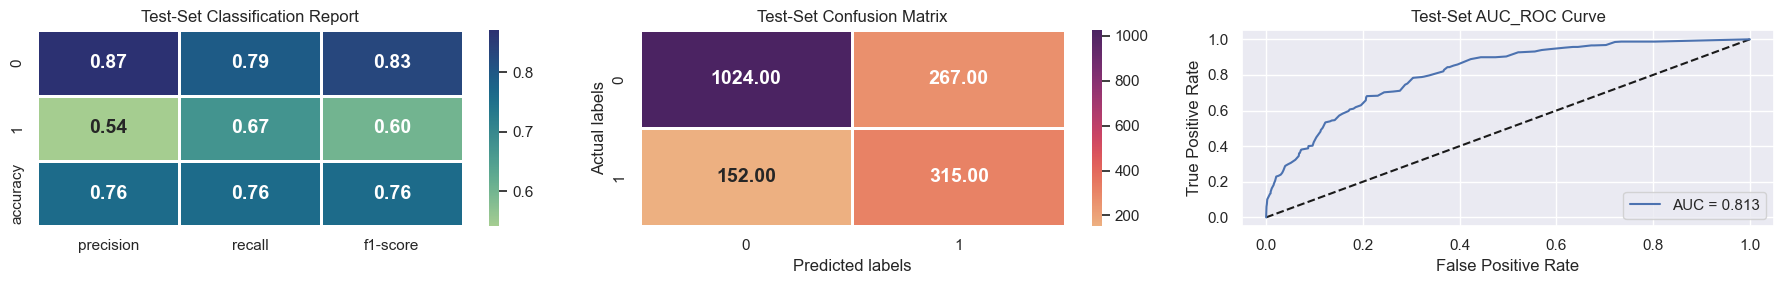

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49, 51,
                                                      53, 55, 57, 59, ...],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 11, 21, 31, 41,
                                                              51, 61, 71, 81,
                                                              91, 101, 111, 121,
                                                              131, 141, 151,
                                                              161, 171, 181,
                                                              191, 201, 211,
                                                              221, 231, 241,
                                                              251, 261, 271,
                                                              281, 291, ...],
                                        'random_state': [101],
                                        'splitter': ['best', 'random']},
                   random_state=101, refit='precision',
                   scoring=['recall', 'precision'])

In [52]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {"criterion":["gini", "entropy", "log_loss"],
             "splitter":["best", "random"],
             "max_depth":[i for i in range(1,150,2)],
             "min_samples_split":[i for i in range(1,500,10)],
             "min_samples_leaf":[i for i in range(1,10)],
#              "min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              "random_state":[101],
             "max_features":["sqrt", "log2", None]}
#              "max_leaf_nodes":[i for i in range(1,500)]
#              "min_impurity_decrease":[],
#              "class_weight":[],
#              "ccp_alpha":[],
#              "monotonic_cst":[]}

# Fitting LogisticRegression Model with GridSearchCV
DT_grid_classifier_smote = RandomizedSearchCV(DT_classifier_smote, parameters,refit="precision", scoring = ['recall','precision'], cv=5, random_state=101)

# Analysing the model
analyse_model(DT_grid_classifier_smote, x_train, x_test, y_train, y_test)


Confusion matrix (train)
[[3100  772]
 [ 714 3158]]
********************************************************************
Confusion matrix (test)
[[1024  267]
 [ 152  315]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3872
           1       0.80      0.82      0.81      3872

    accuracy                           0.81      7744
   macro avg       0.81      0.81      0.81      7744
weighted avg       0.81      0.81      0.81      7744

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1291
           1       0.54      0.67      0.60       467

    accuracy                           0.76      1758
   macro avg       0.71      0.73      0.72      1758
weighted avg       0.78      0

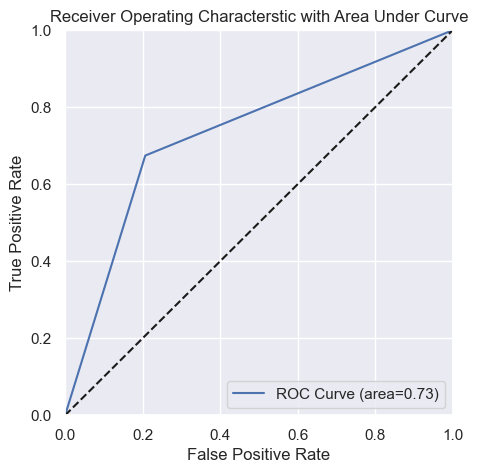

In [53]:

# Predict Result
y_predict_train = DT_grid_classifier_smote.predict(x_train)
y_predict_test = DT_grid_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(DT_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

## ML Model - 4 BaggingClassifier

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

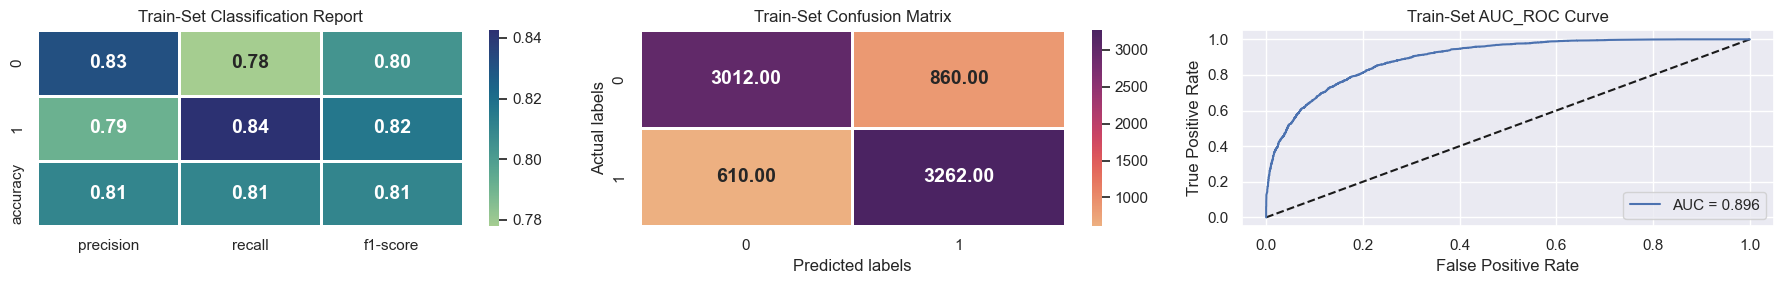

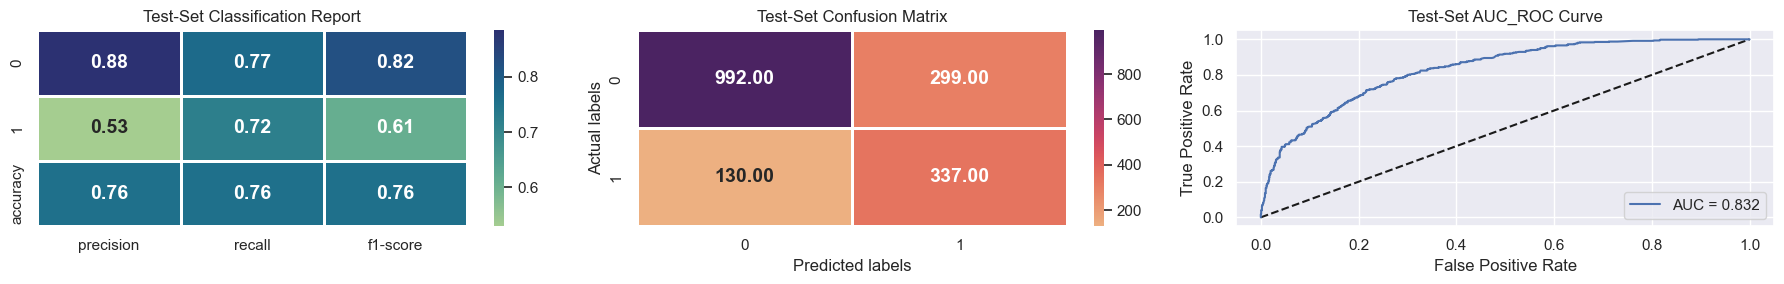

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=113,
                                                   min_samples_leaf=2,
                                                   min_samples_split=141,
                                                   random_state=101),
                  n_jobs=-1, oob_score=True, random_state=0)

In [46]:
# Importing RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Fitting RandomForestClassifier Model
BG_classifier_smote = BaggingClassifier(DecisionTreeClassifier(splitter='best', random_state=101, min_samples_split=141, min_samples_leaf=2, max_features=None, max_depth=113, criterion='gini'), n_jobs=-1,oob_score=True, random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(BG_classifier_smote, x_train, x_test, y_train, y_test)

The best parameters are: {'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'n_estimators': 20, 'bootstrap': True}


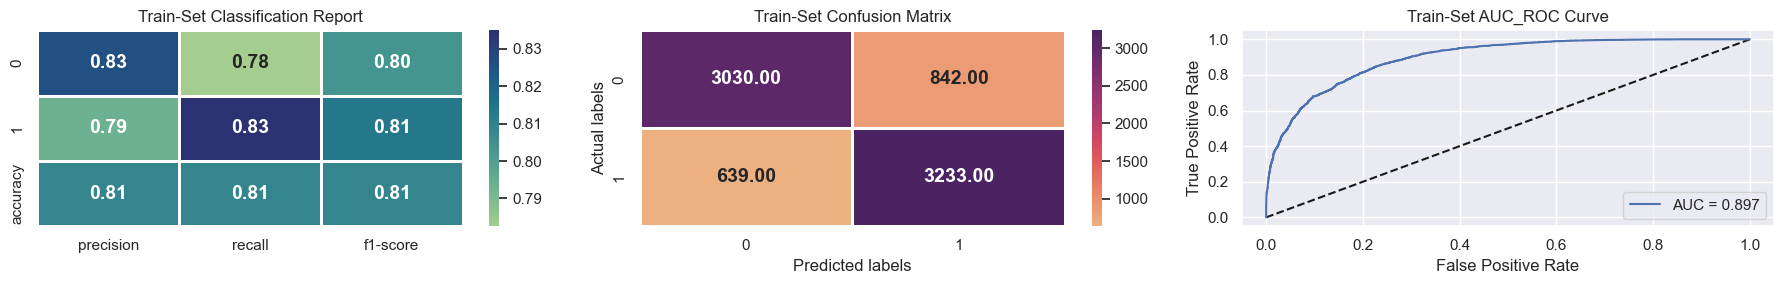

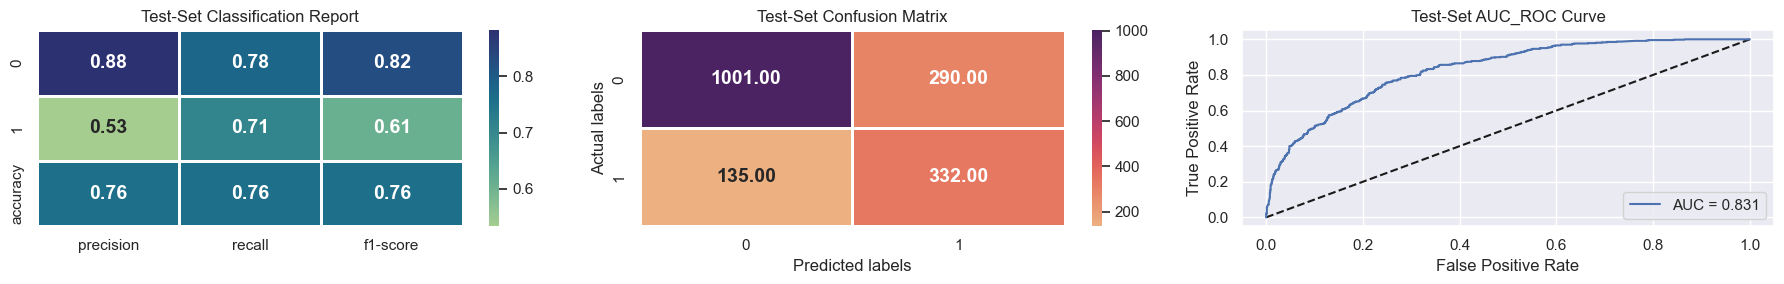

RandomizedSearchCV(cv=5,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=113,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=141,
                                                                                random_state=101),
                                               n_jobs=-1, oob_score=True,
                                               random_state=0),
                   param_distributions={'bootstrap': [True],
                                        'n_estimators': [20, 50, 100, 200, 300,
                                                         400, 500, 600, 700,
                                                         800, 900, 1000],
                                        'n_jobs': [-1], 'oob_score': [True],
                                        'warm_start': [True, False]},
                   random_state=101, refit='precision',
                   scoring=['recall', 'precision'])

In [47]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {"n_estimators":[20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              "bootstrap":[True], "oob_score":[True], "warm_start":[True, False], "n_jobs":[-1]}

# Fitting LogisticRegression Model with GridSearchCV
BGH_grid_classifier_smote = RandomizedSearchCV(BG_classifier_smote, parameters, refit="precision", scoring = ['recall', 'precision'], cv=5, random_state=101)

# Analysing the model
analyse_model(BGH_grid_classifier_smote, x_train, x_test, y_train, y_test)


Confusion matrix (train)
[[3030  842]
 [ 639 3233]]
********************************************************************
Confusion matrix (test)
[[1001  290]
 [ 135  332]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      3872
           1       0.79      0.83      0.81      3872

    accuracy                           0.81      7744
   macro avg       0.81      0.81      0.81      7744
weighted avg       0.81      0.81      0.81      7744

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1291
           1       0.53      0.71      0.61       467

    accuracy                           0.76      1758
   macro avg       0.71      0.74      0.72      1758
weighted avg       0.79      0

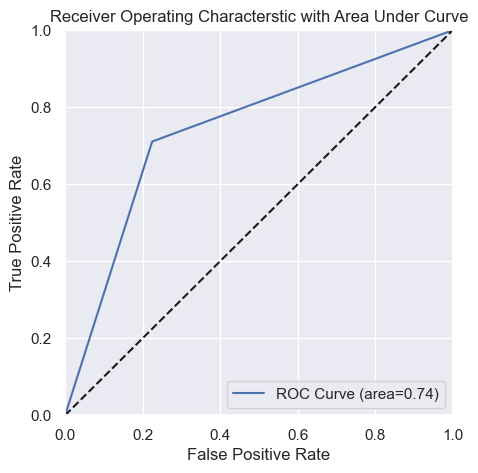

In [48]:
# Predict Result
y_predict_train = BGH_grid_classifier_smote.predict(x_train)
y_predict_test = BGH_grid_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(BGH_grid_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

## ML Model - 5 Random Forest

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

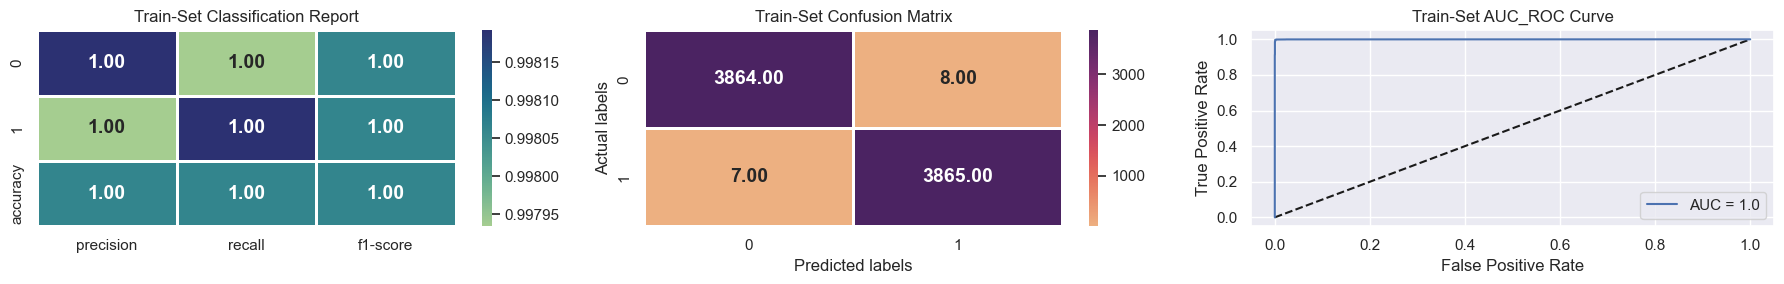

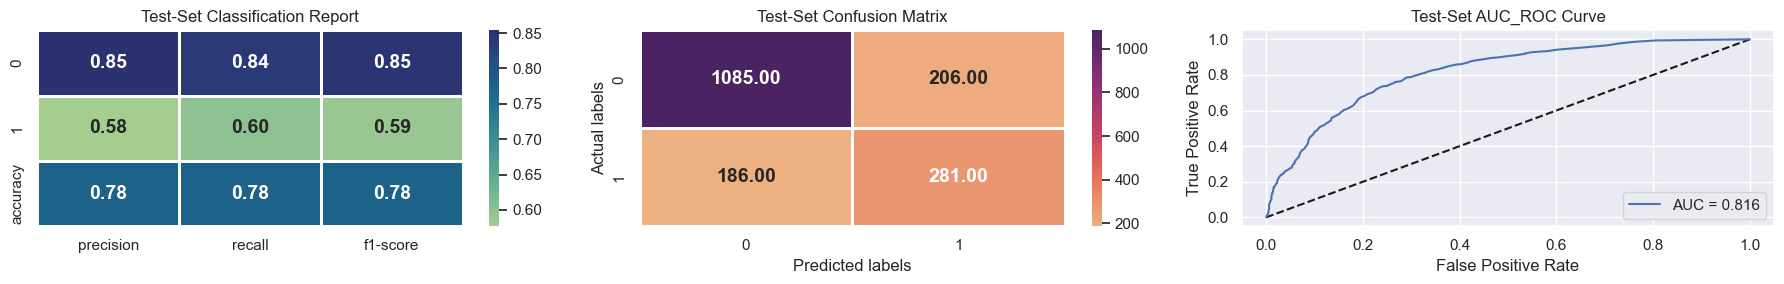

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=0)

In [50]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier_smote = RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier_smote, x_train, x_test, y_train, y_test)

The best parameters are: {'oob_score': True, 'n_jobs': -1, 'n_estimators': 340, 'min_samples_split': 231, 'min_samples_leaf': 281, 'max_features': None, 'max_depth': 1, 'criterion': 'gini'}


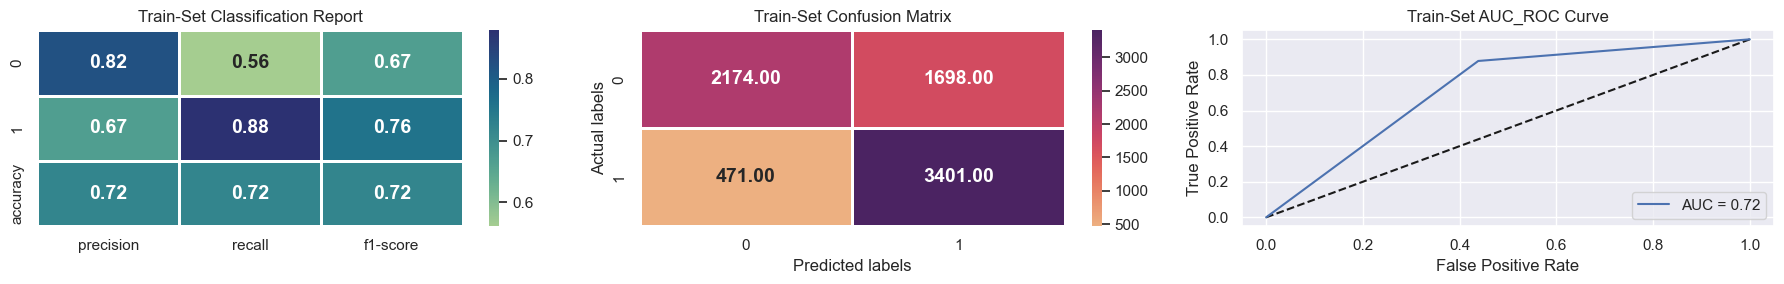

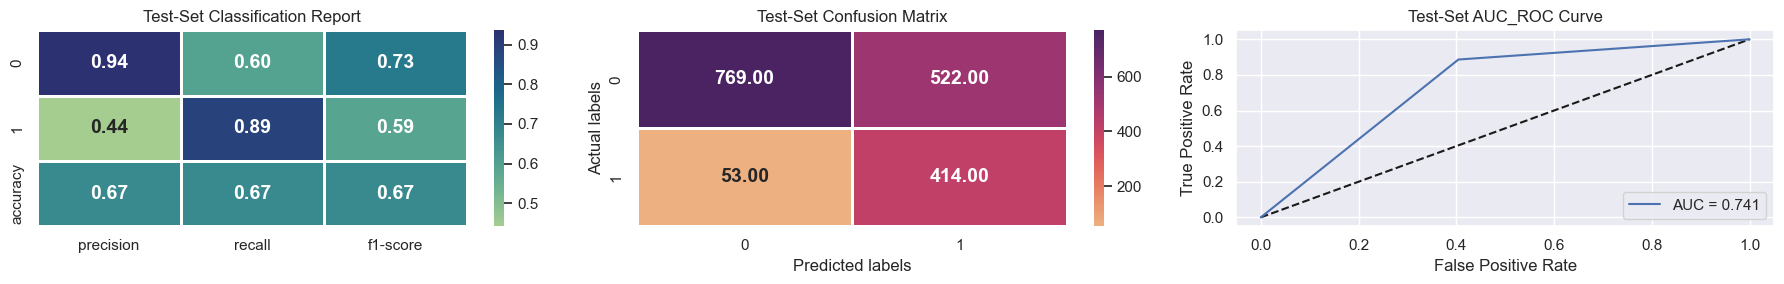

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 11, 21, 31, 41],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 11, 21, 31, 41,
                                                             51, 61, 71, 81, 91,
                                                             101, 111, 121, 131,
                                                             141, 151, 161, 171,
                                                             181, 191, 201, 211,
                                                             221, 231, 241, 251,
                                                             261, 271, 281, 291, ...],
                                        'min_samples_split': [1, 11, 21, 31, 41,
                                                              51, 61, 71, 81,
                                                              91, 101, 111, 121,
                                                              131, 141, 151,
                                                              161, 171, 181,
                                                              191, 201, 211,
                                                              221, 231, 241,
                                                              251, 261, 271,
                                                              281, 291, ...],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 240, 250,
                                                         260, 270, 280, 290,
                                                         300, 310, 320, 330,
                                                         340, 350, 360, 370,
                                                         380, 390, ...],
                                        'n_jobs': [-1], 'oob_score': [True]},
                   scoring='recall')

In [51]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {'n_estimators':[i for i in range(100,500,10)],
             'criterion':["gini", "entropy"],
              'max_depth':[i for i in range(1,50,10)],
              'min_samples_split':[i for i in range(1,500,10)],
              'min_samples_leaf':[i for i in range(1,500,10)],
             'max_features':["sqrt", "log2", None],
             'oob_score':[True],
             'n_jobs':[-1]}

# Fitting LogisticRegression Model with GridSearchCV
RF_grid_classifier_smote = RandomizedSearchCV(RF_classifier_smote, parameters,  scoring='recall', cv=5)

# Analysing the model
analyse_model(RF_grid_classifier_smote, x_train, x_test, y_train, y_test)


Confusion matrix (train)
[[2174 1698]
 [ 471 3401]]
********************************************************************
Confusion matrix (test)
[[769 522]
 [ 53 414]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.82      0.56      0.67      3872
           1       0.67      0.88      0.76      3872

    accuracy                           0.72      7744
   macro avg       0.74      0.72      0.71      7744
weighted avg       0.74      0.72      0.71      7744

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.94      0.60      0.73      1291
           1       0.44      0.89      0.59       467

    accuracy                           0.67      1758
   macro avg       0.69      0.74      0.66      1758
weighted avg       0.80      0.67 

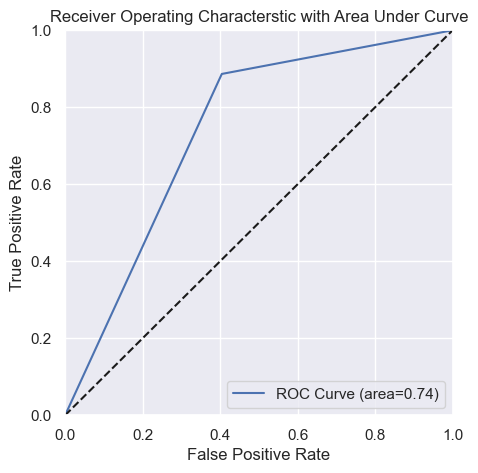

In [54]:
# Predict Result
y_predict_train = RF_grid_classifier_smote.predict(x_train)
y_predict_test = RF_grid_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(RF_grid_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

## ML Model - 6 AdaBoost

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

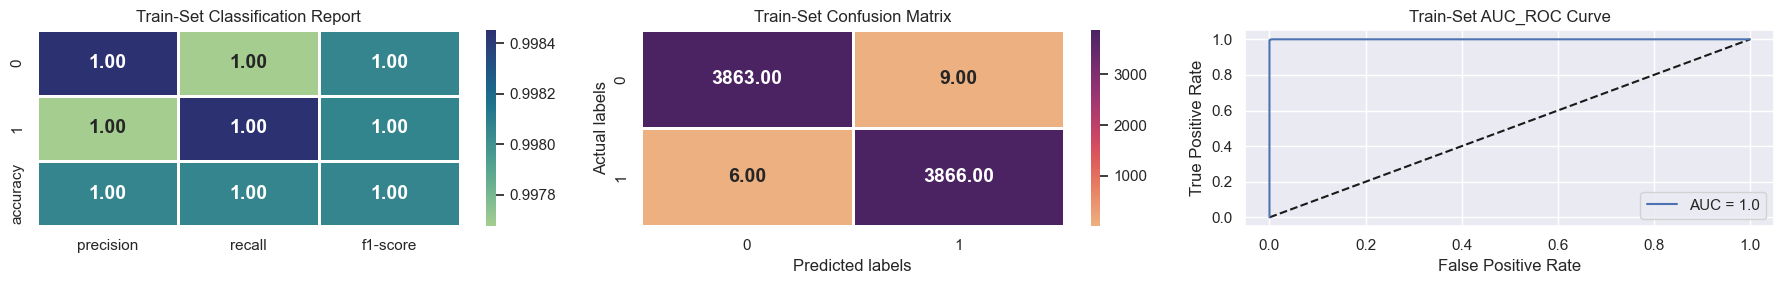

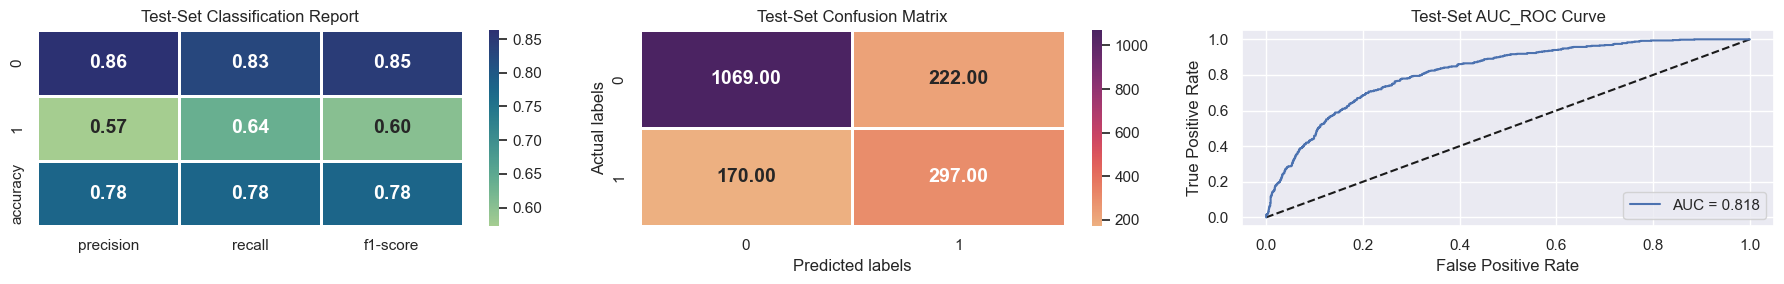

AdaBoostClassifier(estimator=RandomForestClassifier(oob_score=True),
                   learning_rate=1, random_state=101)

In [55]:
# Importing AdaBoostClassifier (recall)
from sklearn.ensemble import AdaBoostClassifier

# Fitting AdaBoostClassifier Model
adboost_classifier_smote = AdaBoostClassifier(RandomForestClassifier(oob_score=True),learning_rate=1,algorithm="SAMME.R", random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(adboost_classifier_smote, x_train, x_test, y_train, y_test)

Confusion matrix (train)
[[3863    9]
 [   6 3866]]
********************************************************************
Confusion matrix (test)
[[1069  222]
 [ 170  297]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3872
           1       1.00      1.00      1.00      3872

    accuracy                           1.00      7744
   macro avg       1.00      1.00      1.00      7744
weighted avg       1.00      1.00      1.00      7744

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1291
           1       0.57      0.64      0.60       467

    accuracy                           0.78      1758
   macro avg       0.72      0.73      0.72      1758
weighted avg       0.79      0

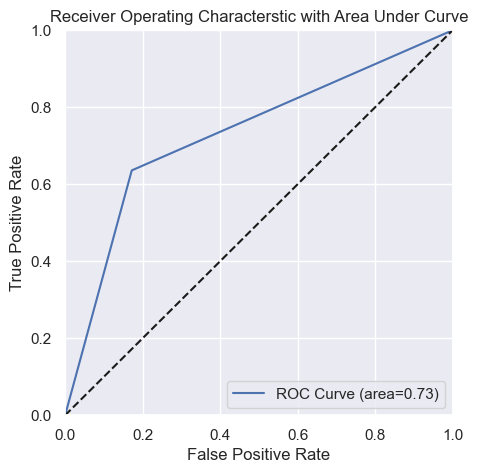

In [57]:
# Predict Result
y_predict_train = adboost_classifier_smote.predict(x_train)
y_predict_test = adboost_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(adboost_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

## ML Model - 7  Gradient Boosting Decision Tree (GBDT)

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

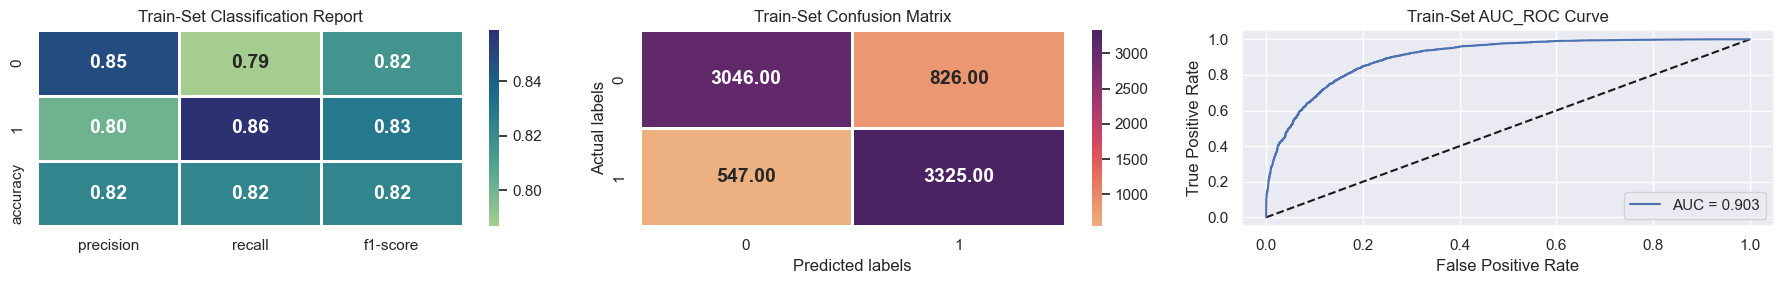

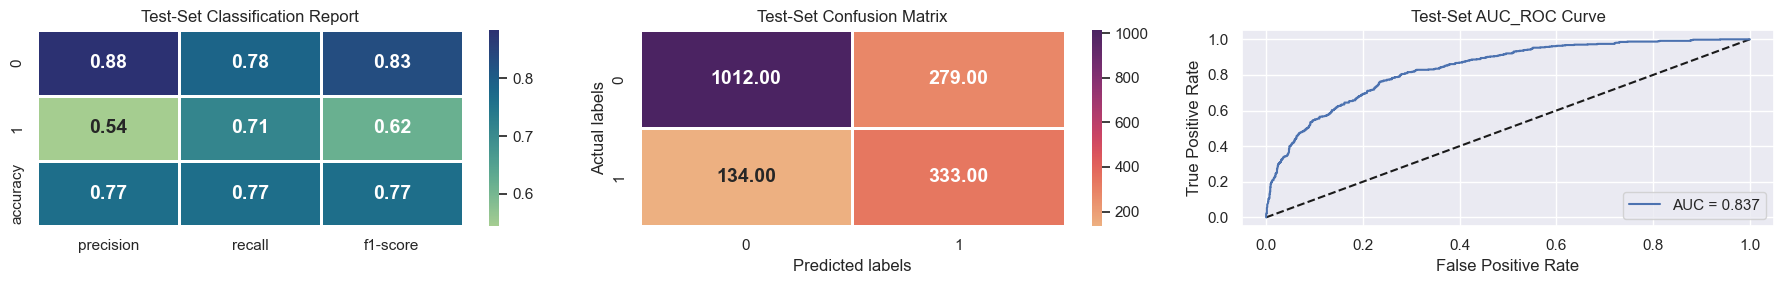

GradientBoostingClassifier(random_state=101)

In [58]:
# Importing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Fitting AdaBoostClassifier Model
gbdt_classifier_smote = GradientBoostingClassifier(random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(gbdt_classifier_smote, x_train, x_test, y_train, y_test)

Confusion matrix (train)
[[3046  826]
 [ 547 3325]]
********************************************************************
Confusion matrix (test)
[[1012  279]
 [ 134  333]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3872
           1       0.80      0.86      0.83      3872

    accuracy                           0.82      7744
   macro avg       0.82      0.82      0.82      7744
weighted avg       0.82      0.82      0.82      7744

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1291
           1       0.54      0.71      0.62       467

    accuracy                           0.77      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.79      0

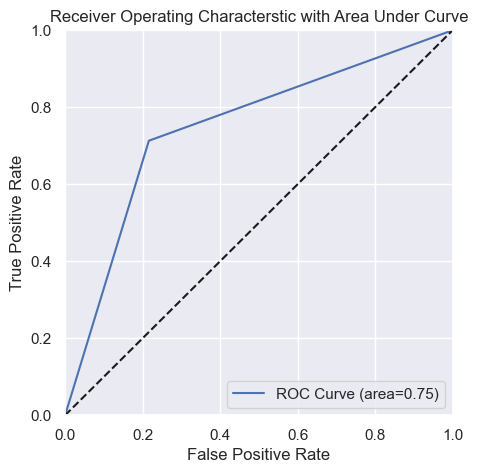

In [59]:
# Predict Result
y_predict_train = gbdt_classifier_smote.predict(x_train)
y_predict_test = gbdt_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(gbdt_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
Precision = [0.79, 0.78, 0.80, 0.79, 0.79] 
Recall = [0.77, 0.76, 0.67, 0.78, 0.77]
F1_Score= [0.77, 0.77, 0.69, 0.78, 0.77]
Accuracy = [0.77, 0.76, 0.67, 0.78, 0.77]
AUC = [0.823, 0.813, 0.741, 0.730, 0.75]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

## ML Model - 8 XGboost

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

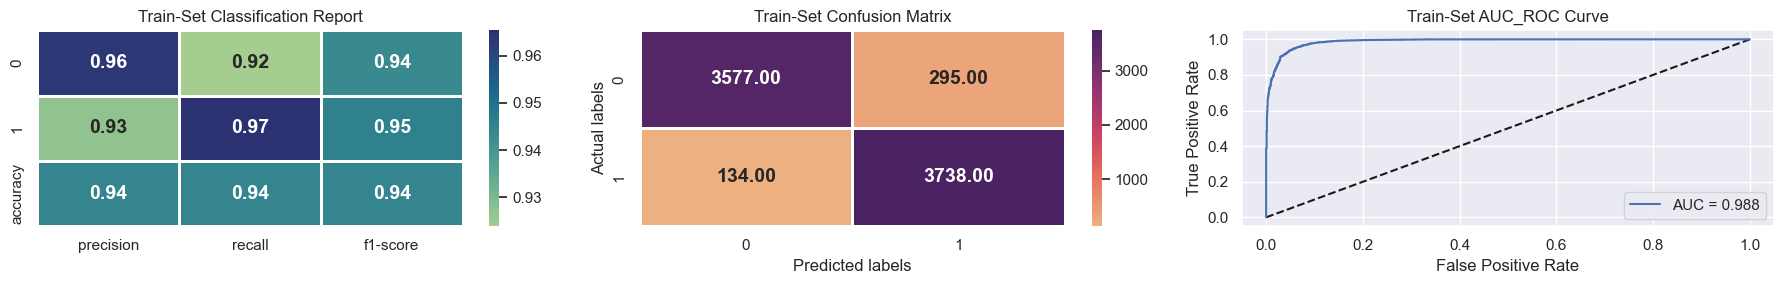

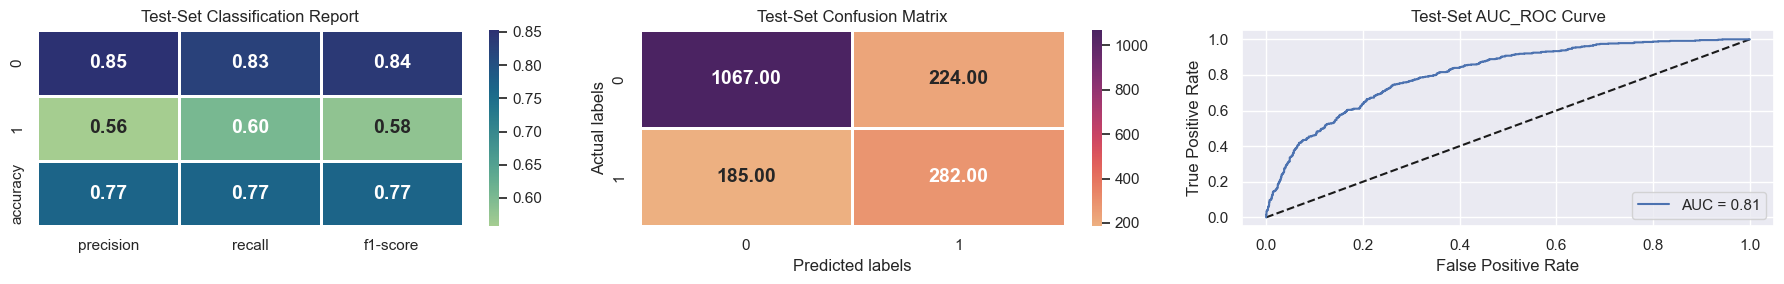

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier_smote = XGBClassifier()

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier_smote, x_train.to_numpy(), x_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy())
     


Confusion matrix (train)
[[3577  295]
 [ 134 3738]]
********************************************************************
Confusion matrix (test)
[[1067  224]
 [ 185  282]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3872
           1       0.93      0.97      0.95      3872

    accuracy                           0.94      7744
   macro avg       0.95      0.94      0.94      7744
weighted avg       0.95      0.94      0.94      7744

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1291
           1       0.56      0.60      0.58       467

    accuracy                           0.77      1758
   macro avg       0.70      0.72      0.71      1758
weighted avg       0.77      0

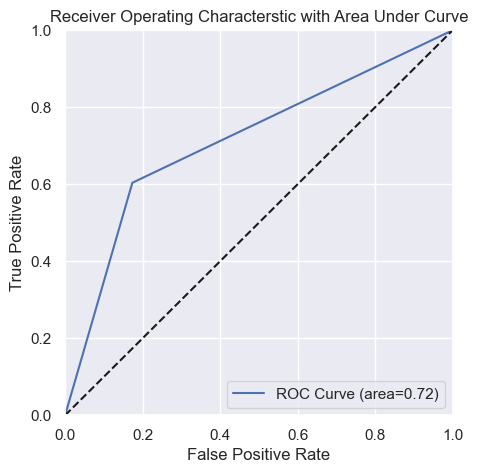

In [62]:
# Predict Result
y_predict_train = XGB_classifier_smote.predict(x_train.to_numpy())
y_predict_test = XGB_classifier_smote.predict(x_test.to_numpy())


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(XGB_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
Precision = [0.79, 0.78, 0.80, 0.79, 0.79, 0.77] 
Recall = [0.77, 0.76, 0.67, 0.78, 0.77, 0.77]
F1_Score= [0.77, 0.77, 0.69, 0.78, 0.77, 0.77]
Accuracy = [0.77, 0.76, 0.67, 0.78, 0.77, 0.77]
AUC = [0.823, 0.813, 0.741, 0.730, 0.75, 0.72]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

## ML Model - 9 SVC

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

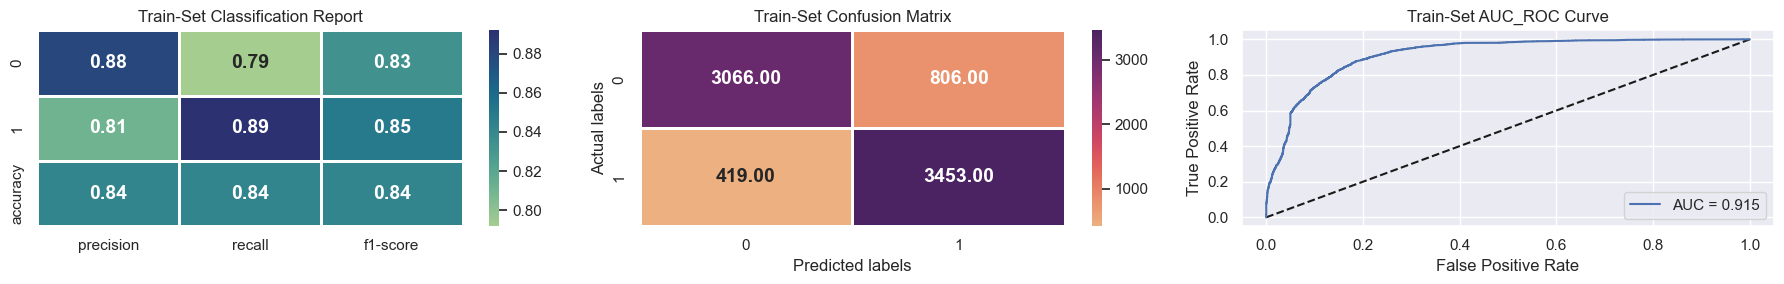

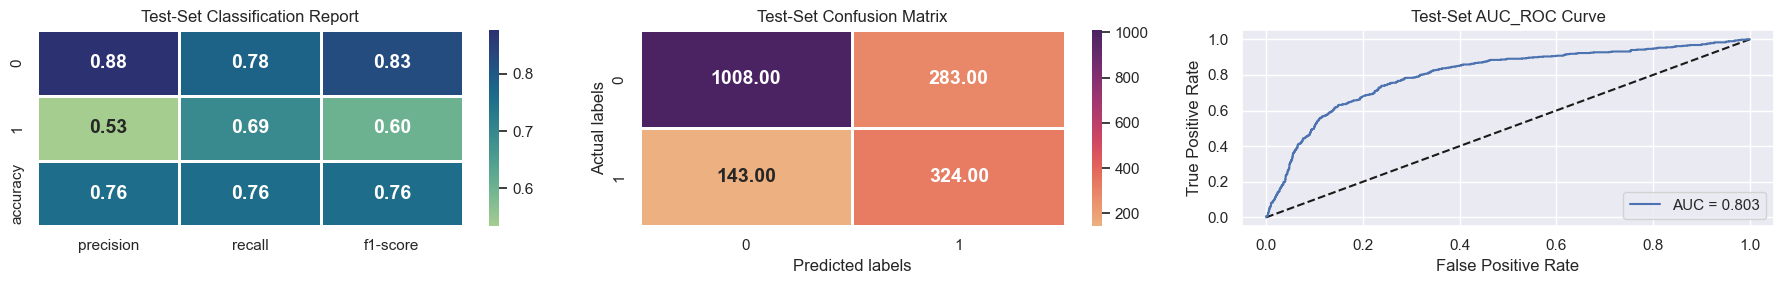

SVC(probability=True, random_state=0)

In [63]:
# Importing SVC
from sklearn.svm import SVC

# Fitting SVC Model
SVC_classifier_smote = SVC(probability= True,random_state=0)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(SVC_classifier_smote, x_train, x_test, y_train, y_test)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]The best parameters are: {'verbose': False, 'shrinking': True, 'probability': True, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'decision_function_shape': 'ovr', 'break_ties': True, 'C': 50}


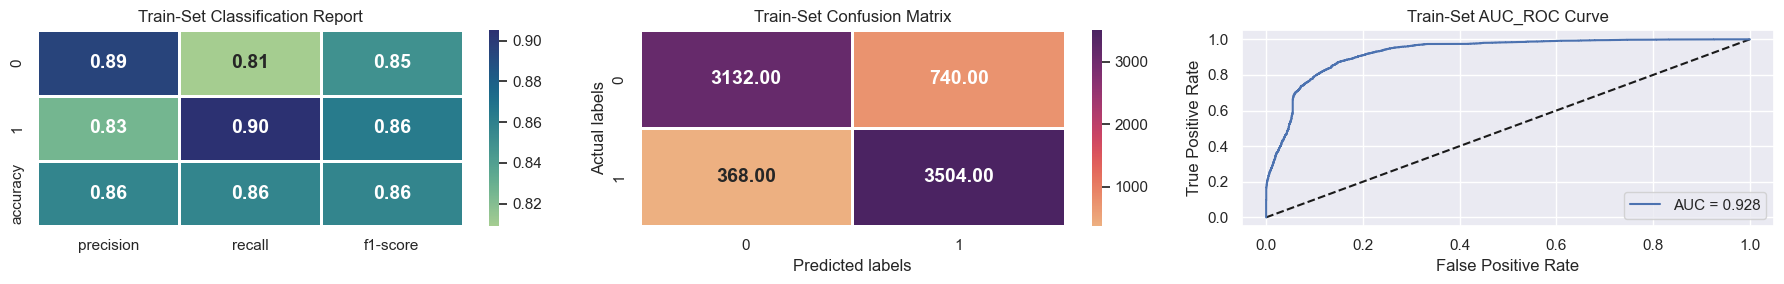

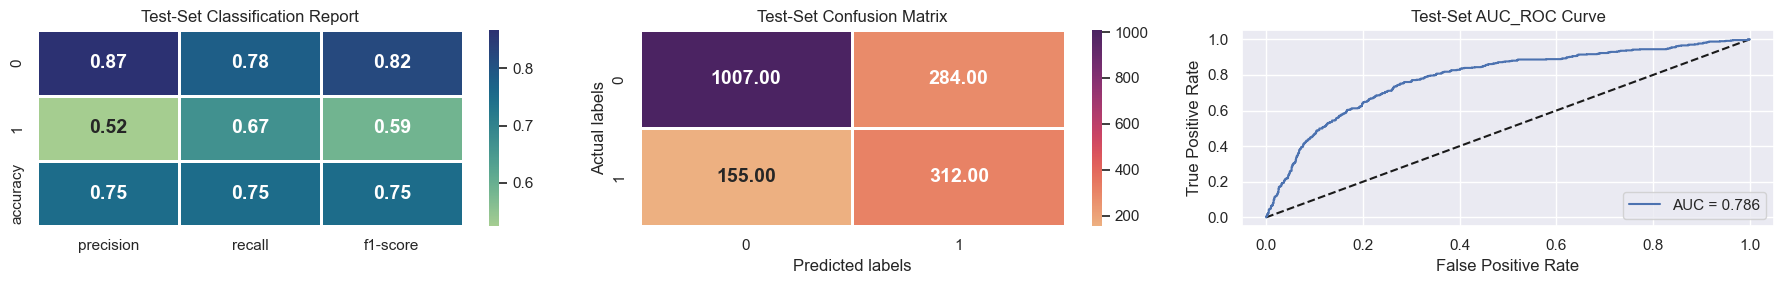

RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
                   param_distributions={'C': [0.01, 0.1, 0.5, 1, 5, 10, 20, 25,
                                              40, 50, 100],
                                        'break_ties': [True, False],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [1, 2, 3, 4, 6],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'probability': [True, False],
                                        'shrinking': [True, False],
                                        'verbose': [True, False]},
                   scoring='recall')

In [64]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {"C":[0.01,0.1,0.5,1,5,10,20,25,40,50,100],
             "kernel":['linear','poly', 'rbf', 'sigmoid'],
             "degree":[1,2,3,4,6], "gamma":['scale', 'auto'],
             "shrinking":[True, False], "probability":[True, False],
             "verbose":[True, False], "decision_function_shape":['ovo', 'ovr'],
             "break_ties":[True, False]}

# Fitting LogisticRegression Model with GridSearchCV
SVC_grid_classifier_smote = RandomizedSearchCV(SVC_classifier_smote, parameters, scoring="recall", cv=5)

# Analysing the model
analyse_model(SVC_grid_classifier_smote, x_train, x_test, y_train, y_test)


Confusion matrix (train)
[[3132  740]
 [ 368 3504]]
********************************************************************
Confusion matrix (test)
[[1007  284]
 [ 155  312]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3872
           1       0.83      0.90      0.86      3872

    accuracy                           0.86      7744
   macro avg       0.86      0.86      0.86      7744
weighted avg       0.86      0.86      0.86      7744

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1291
           1       0.52      0.67      0.59       467

    accuracy                           0.75      1758
   macro avg       0.70      0.72      0.70      1758
weighted avg       0.78      0

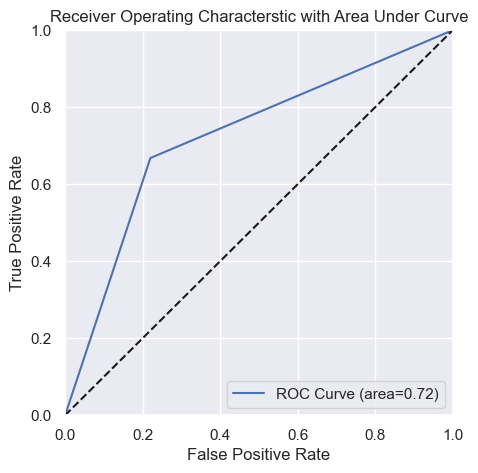

In [65]:
# Predict Result
y_predict_train = SVC_grid_classifier_smote.predict(x_train)
y_predict_test = SVC_grid_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(SVC_grid_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [66]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
Precision = [0.79, 0.78, 0.80, 0.79, 0.79, 0.77, 0.78] 
Recall = [0.77, 0.76, 0.67, 0.78, 0.77, 0.77, 0.75]
F1_Score= [0.77, 0.77, 0.69, 0.78, 0.77, 0.77, 0.76]
Accuracy = [0.77, 0.76, 0.67, 0.78, 0.77, 0.77, 0.75]
AUC = [0.823, 0.813, 0.741, 0.730, 0.75, 0.72, 0.72]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

Models  Precision  Recall  F1_Score  Accuracy    AUC
0  Logistic_regression       0.79    0.77      0.77      0.77  0.823
1        Decision_tree       0.78    0.76      0.77      0.76  0.813
2        Random_forest       0.80    0.67      0.69      0.67  0.741
3             AdaBoost       0.79    0.78      0.78      0.78  0.730
4     GradientBoosting       0.79    0.77      0.77      0.77  0.750
5              XGboost       0.77    0.77      0.77      0.77  0.720
6                  SVM       0.78    0.75      0.76      0.75  0.720